In [78]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [79]:
#Load the data from the tenant and building raw data
tenant_df = pd.read_csv(r"../Data Analysis/BPS_Economic_Tenant_Analysis.csv")
building_df = pd.read_csv(r"../Data Analysis/BPS_Economic_Property_Analysis.csv")
financial_df = pd.read_csv(r"../Data Analysis/BPS_Economic_Property_Analysis.csv")

building_financial_df = building_df[['Address','Star Rating','ComStock Property Type','Total Operating Expenses','Utilities','Taxes Per SF','Rent/SF/Yr','Direct Services','Identified as disadvantaged','Lease Term (Years)']]
building_financial_df.drop_duplicates(subset = 'Address', inplace = True)
building_financial_df.to_csv('building_financial_data.csv')

tenant_star_rating_1_2_df = tenant_df[tenant_df['Star Rating'] == 1 | 2]
disadvantaged_tenant_df = tenant_df[tenant_df['Identified as disadvantaged'] == True]
non_disadvantaged_tenant_df = tenant_df[tenant_df['Identified as disadvantaged'] != True]
disadvantaged_1_2_star_tenant_df = tenant_star_rating_1_2_df[tenant_star_rating_1_2_df["Identified as disadvantaged"] ==True]
non_disadvantaged_1_2_star_tenant_df = tenant_star_rating_1_2_df[tenant_star_rating_1_2_df["Identified as disadvantaged"] !=True]
building_1_2_star_df = building_df[building_df['Star Rating'] == 1 | 2]

disadvantaged_building_df = building_df[building_df['Identified as disadvantaged'] == True]
non_disadvantaged_building_df = building_df[building_df['Identified as disadvantaged'] != True]
disadvantaged_1_2_star_building_df = building_1_2_star_df[building_1_2_star_df['Identified as disadvantaged'] == True]
non_disadvantaged_1_2_star_building_df = building_1_2_star_df[building_1_2_star_df['Identified as disadvantaged'] != True]

C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_6684\3227695776.py:3: DtypeWarning:

Columns (21,43,50,87,89,90) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_6684\3227695776.py:4: DtypeWarning:

Columns (21,43,50,87,89,90) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_6684\3227695776.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
building_dropped_df = building_df.drop_duplicates(subset = 'Address')
property_type_counts = building_dropped_df['ComStock Property Type'].value_counts()
non_disadvantaged_building_dropped_df = non_disadvantaged_building_df.drop_duplicates(subset = 'Address')
disadvantaged_building_dropped_df = disadvantaged_building_df.drop_duplicates(subset = 'Address')
building_property_type_df = building_dropped_df[['Address','ComStock Property Type']]
building_property_type_disad_df = disadvantaged_building_dropped_df[['Address','ComStock Property Type']]
building_property_type_non_disad_df = non_disadvantaged_building_dropped_df[['Address','ComStock Property Type']]

merged_property_chart_df = pd.merge(building_property_type_df,building_property_type_disad_df, how = 'left', on = 'Address')
merged_property_count_df = pd.merge(merged_property_chart_df,building_property_type_non_disad_df, how = 'left', on = 'Address')
merged_property_count_df.drop_duplicates(subset = 'Address', inplace  = True)

# Get counts of property types in each column
property_counts = merged_property_count_df['ComStock Property Type_x'].value_counts()
property_disad_counts = merged_property_count_df['ComStock Property Type_y'].value_counts()
property_non_disad_counts = merged_property_count_df['ComStock Property Type'].value_counts()
# Combine counts into a single DataFrame
counts_df = pd.DataFrame({'ComStock Property Type_x': property_counts, 'ComStock Property Type_y': property_disad_counts, 'ComStock Property Type': property_non_disad_counts})

import pandas as pd
import plotly.graph_objects as go

# Assuming you have the dataframes and necessary data loaded

# Your existing code for data preparation...

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts_df.index,
    y=counts_df['ComStock Property Type_x'],
    name='Property Counts',
    text=counts_df['ComStock Property Type_x'],
    textposition='outside',
))

fig.add_trace(go.Bar(
    x=counts_df.index,
    y=counts_df['ComStock Property Type_y'],
    name='Property Counts in Disadvantaged Communities',
    text=counts_df['ComStock Property Type_y'],
    textposition='outside',
))

fig.add_trace(go.Bar(
    x=counts_df.index,
    y=counts_df['ComStock Property Type'],
    name='Property Counts in Non-Disadvantaged Communities',
    text=counts_df['ComStock Property Type'],
    textposition='outside',
))

# Update layout
fig.update_layout(
    barmode='group',
    title='Count of Property Types',
    title_x=0.5,
    xaxis=dict(title='Property Type'),
    yaxis=dict(title='Count'),
    legend=dict(
        title='Property Type',
        x=0.0,
        y=1.0,
        xanchor='left',
        yanchor='top'
    ),
    width=800,
    height=500
)

bold_property_types = ['Office', 'Strip Mall', 'Outpatient', 'Hospital', 'Large Hotel']

# Specify which x-axis labels to make bold
tickvals = np.arange(len(counts_df.index))
ticktext = [f"<b>{val}</b>" if val in bold_property_types else val for val in counts_df.index]

# Update x-axis properties
fig.update_xaxes(
    tickmode='array',
    tickvals=tickvals,
    ticktext=ticktext,
)
# Add note
note_text = "*Bolded labels are priority property types based on survey results"
fig.add_annotation(
    text=note_text,
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=10),
)

# Show the plot
fig.show()


In [81]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Assuming you have the dataframes and necessary data loaded

# Your existing code for data preparation...

# Filter data for properties greater than 50,000 sq-ft
building_property_type_df_over_50000 = building_dropped_df[building_dropped_df['Total Area SF'] > 50000][['Address','ComStock Property Type']]
building_property_type_disad_df_over_50000 = disadvantaged_building_dropped_df[disadvantaged_building_dropped_df['Total Area SF'] > 50000][['Address','ComStock Property Type']]
building_property_type_non_disad_df_over_50000 = non_disadvantaged_building_dropped_df[non_disadvantaged_building_dropped_df['Total Area SF'] > 50000][['Address','ComStock Property Type']]

merged_property_chart_df_over_50000 = pd.merge(building_property_type_df_over_50000, building_property_type_disad_df_over_50000, how='left', on='Address')
merged_property_count_df_over_50000 = pd.merge(merged_property_chart_df_over_50000, building_property_type_non_disad_df_over_50000, how='left', on='Address')
merged_property_count_df_over_50000.drop_duplicates(subset='Address', inplace=True)

# Get counts of property types in each column
property_counts_over_50000 = merged_property_count_df_over_50000['ComStock Property Type_x'].value_counts()
property_disad_counts_over_50000 = merged_property_count_df_over_50000['ComStock Property Type_y'].value_counts()
property_non_disad_counts_over_50000 = merged_property_count_df_over_50000['ComStock Property Type'].value_counts()

# Combine counts into a single DataFrame
counts_df_over_50000 = pd.DataFrame({
    'ComStock Property Type_x': property_counts_over_50000,
    'ComStock Property Type_y': property_disad_counts_over_50000,
    'ComStock Property Type': property_non_disad_counts_over_50000
})

# Create a bar chart using Plotly for properties over 50,000 sq-ft
fig_over_50000 = go.Figure()

fig_over_50000.add_trace(go.Bar(
    x=counts_df_over_50000.index,
    y=counts_df_over_50000['ComStock Property Type_x'],
    name='Property Counts',
    text=counts_df_over_50000['ComStock Property Type_x'],
    textposition='outside',
))

fig_over_50000.add_trace(go.Bar(
    x=counts_df_over_50000.index,
    y=counts_df_over_50000['ComStock Property Type_y'],
    name='Property Counts in Disadvantaged Communities',
    text=counts_df_over_50000['ComStock Property Type_y'],
    textposition='outside',
))

fig_over_50000.add_trace(go.Bar(
    x=counts_df_over_50000.index,
    y=counts_df_over_50000['ComStock Property Type'],
    name='Property Counts in Non-Disadvantaged Communities',
    text=counts_df_over_50000['ComStock Property Type'],
    textposition='outside',
))

# Update layout for properties over 50,000 sq-ft
fig_over_50000.update_layout(
    barmode='group',
    title='Count of Property Types (Properties > 50,000 sq-ft)',
    title_x=0.5,
    xaxis=dict(title='Property Type'),
    yaxis=dict(title='Count'),
    legend=dict(
        title='Property Type',
        x=1.0,
        y=1.0,
        xanchor='right',
        yanchor='top'
    ),
    width=800,
    height=500
)

# Specify which x-axis labels to make bold for properties over 50,000 sq-ft
tickvals_over_50000 = np.arange(len(counts_df_over_50000.index))
ticktext_over_50000 = [f"<b>{val}</b>" if val in bold_property_types else val for val in counts_df_over_50000.index]

# Update x-axis properties for properties over 50,000 sq-ft
fig_over_50000.update_xaxes(
    tickmode='array',
    tickvals=tickvals_over_50000,
    ticktext=ticktext_over_50000,
)

# Add note for properties over 50,000 sq-ft
note_text_over_50000 = "*Bolded labels are priority property types based on survey results (Properties > 50,000 sq-ft)"
fig_over_50000.add_annotation(
    text=note_text_over_50000,
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=10),
)

# Show the plot for properties over 50,000 sq-ft
fig_over_50000.show()


In [82]:
building_dropped_df = building_df.drop_duplicates(subset='Address')
property_type_counts = building_dropped_df['ComStock Property Type'].value_counts()
non_disadvantaged_building_dropped_df = non_disadvantaged_building_df.drop_duplicates(subset='Address')
disadvantaged_building_dropped_df = disadvantaged_building_df.drop_duplicates(subset='Address')
building_property_type_df = building_dropped_df[['Address', 'ComStock Property Type', 'Star Rating']]
building_property_type_disad_df = disadvantaged_building_dropped_df[['Address', 'ComStock Property Type', 'Star Rating']]
building_property_type_non_disad_df = non_disadvantaged_building_dropped_df[['Address', 'ComStock Property Type', 'Star Rating']]

merged_property_chart_df = pd.merge(building_property_type_df, building_property_type_disad_df, how='left', on='Address')
merged_property_count_df = pd.merge(merged_property_chart_df, building_property_type_non_disad_df, how='left', on='Address')
merged_property_count_df.drop_duplicates(subset='Address', inplace=True)

# Function to reindex and fill missing values with zeros
def fill_missing_values(df):
    index_levels = df.index.levels
    full_index = pd.MultiIndex.from_product(index_levels, names=df.index.names)
    return df.reindex(full_index, fill_value=0)

import plotly.graph_objects as go
import pandas as pd

# ... (previous code)

# Filter out 'MultiFamily' property type
merged_property_count_df_filtered = merged_property_count_df[merged_property_count_df['ComStock Property Type_x'] != 'Multi-Family']
property_disad_counts_filtered = fill_missing_values(merged_property_count_df_filtered.dropna(subset=['ComStock Property Type_y']).groupby(['ComStock Property Type_y', 'Star Rating_y']).size())
property_non_disad_counts_filtered = fill_missing_values(merged_property_count_df_filtered.dropna(subset=['ComStock Property Type']).groupby(['ComStock Property Type', 'Star Rating']).size())

fig = go.Figure()

fig.add_bar(
    y=[property_disad_counts_filtered.index.droplevel(level=1), property_disad_counts_filtered.index.droplevel(level=0)],
    x=property_disad_counts_filtered,
    name='Buildings in DAC',
    orientation='h',
    text=property_disad_counts_filtered,
    textposition='outside',
)

fig.add_bar(
    y=[property_non_disad_counts_filtered.index.droplevel(level=1), property_non_disad_counts_filtered.index.droplevel(level=0)],
    x=property_non_disad_counts_filtered,
    text=property_non_disad_counts_filtered,
    textposition='outside',
    name='Buildings in Non-DAC',
    orientation='h'
)

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Count'),
    yaxis=dict(title='Property Type and Star Rating'),
    title='Count of Property Types in Aurora (excluding MultiFamily)',
    title_x=0.5,
    legend=dict(
        x=1.0,
        y=1.0,
        xanchor='right',
        yanchor='top'
    ),
    height=1600,
    width=800
)

# Show the plot
fig.show()




# fig.add_trace(go.Bar(
#     x=counts_df.index,
#     y=counts_df['ComStock Property Type_y'],
#     name='Property Counts in Disadvantaged Communities',
#     text=counts_df['ComStock Property Type_y'],
#     textposition='outside',
# ))

In [83]:
building_dropped_df = building_df.drop_duplicates(subset='Address')
property_type_counts = building_dropped_df['ComStock Property Type'].value_counts()
non_disadvantaged_building_dropped_df = non_disadvantaged_building_df.drop_duplicates(subset='Address')
disadvantaged_building_dropped_df = disadvantaged_building_df.drop_duplicates(subset='Address')
building_property_type_df = building_dropped_df[['Address', 'ComStock Property Type', 'Star Rating']]
building_property_type_disad_df = disadvantaged_building_dropped_df[['Address', 'ComStock Property Type', 'Star Rating']]
building_property_type_non_disad_df = non_disadvantaged_building_dropped_df[['Address', 'ComStock Property Type', 'Star Rating']]

merged_property_chart_df = pd.merge(building_property_type_df, building_property_type_disad_df, how='left', on='Address')
merged_property_count_df = pd.merge(merged_property_chart_df, building_property_type_non_disad_df, how='left', on='Address')
merged_property_count_df.drop_duplicates(subset='Address', inplace=True)

# Function to reindex and fill missing values with zeros
def fill_missing_values(df):
    index_levels = df.index.levels
    full_index = pd.MultiIndex.from_product(index_levels, names=df.index.names)
    return df.reindex(full_index, fill_value=0)

# Get counts of property types in each column
property_counts = fill_missing_values(merged_property_count_df.groupby(['ComStock Property Type_x', 'Star Rating_x']).size())
property_disad_counts = fill_missing_values(merged_property_count_df.dropna(subset=['ComStock Property Type_y']).groupby(['ComStock Property Type_y', 'Star Rating_y']).size())
property_non_disad_counts = fill_missing_values(merged_property_count_df.dropna(subset = ['ComStock Property Type']).groupby(['ComStock Property Type', 'Star Rating']).size())


import plotly.graph_objects as go
import pandas as pd


fig = go.Figure()
fig.add_bar(y = [property_disad_counts.index.droplevel(level = 1),property_disad_counts.index.droplevel(level = 0)] , 
            x = property_disad_counts,
            name = 'Buildings in DAC',
            orientation = 'h')
fig.add_bar(y = [property_non_disad_counts.index.droplevel(level = 1),property_non_disad_counts.index.droplevel(level = 0)] , 
            x = property_non_disad_counts,
            name = 'Buildings in Non-DAC',
            orientation = 'h')
fig.update_layout(barmode = 'relative',
                  width = 800,
                  height = 1000)

# fig.add_trace(go.Bar(
#     x=counts_df.index,
#     y=counts_df['ComStock Property Type_y'],
#     name='Property Counts in Disadvantaged Communities',
#     text=counts_df['ComStock Property Type_y'],
#     textposition='outside',
# ))

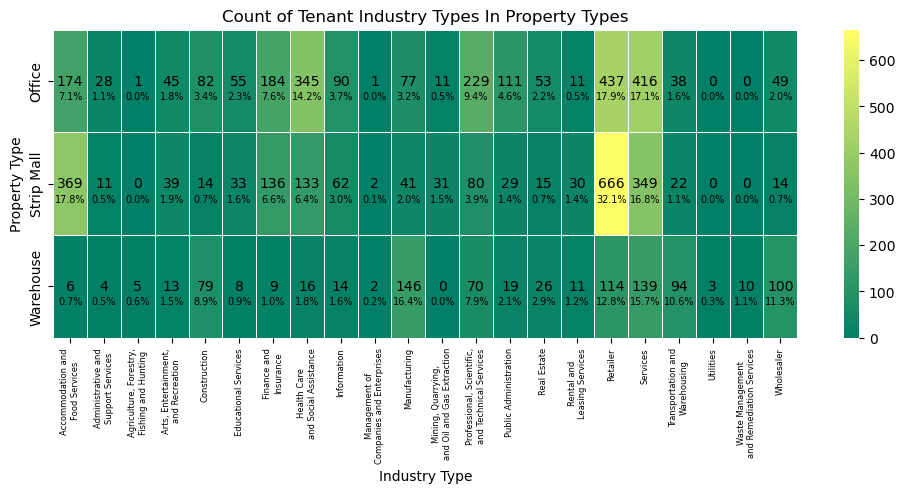

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'industry_count_by_prop_type' as your DataFrame
# If not, replace it with your actual grouped data
property_types_to_remove = ['Hospital', 'Multi-Family', 'Large Hotel', 'Outpatient']
filtered_tenant_df = tenant_df[~tenant_df['ComStock Property Type'].isin(property_types_to_remove)]
industry_count_by_prop_type = filtered_tenant_df.groupby(['ComStock Property Type', 'Industry']).size().unstack().fillna(0)


# Calculate the percentage of tenant types per property types
percentage_data = industry_count_by_prop_type.div(industry_count_by_prop_type.sum(axis=1), axis=0) * 100

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the heatmap
heatmap = sns.heatmap(industry_count_by_prop_type,
                      annot=True,
                      cmap='summer',
                      fmt='g',
                      linewidths=.5,
                      annot_kws = {'color': 'black'})

# Set the title and labels
plt.title('Count of Tenant Industry Types In Property Types')
plt.xlabel('Industry Type')
plt.ylabel('Property Type')

# Custom function to replace the space after the second word with a newline character
def replace_space_after_second_word(label):
    words = label.split(' ', 2)  # Split into three parts using space as separator
    if len(words) > 2:
        return f"{words[0]} {words[1]}\n{words[2]}"
    else:
        return label

# Break x-axis labels into two lines after the second word
labels = [replace_space_after_second_word(label) for label in industry_count_by_prop_type.columns]
heatmap.set_xticklabels(labels, rotation=90, ha='center')

# Add percentage annotations under each count
for i in range(len(industry_count_by_prop_type.index)):
    for j in range(len(industry_count_by_prop_type.columns)):
        percentage = percentage_data.iloc[i, j]
        heatmap.text(j + 0.5, i + 0.65, f'{percentage:.1f}%', ha='center', va='center', fontsize=7)
        
# Adjust the font size of x-axis labels
plt.xticks(fontsize=6)

# Show the plot
plt.show()


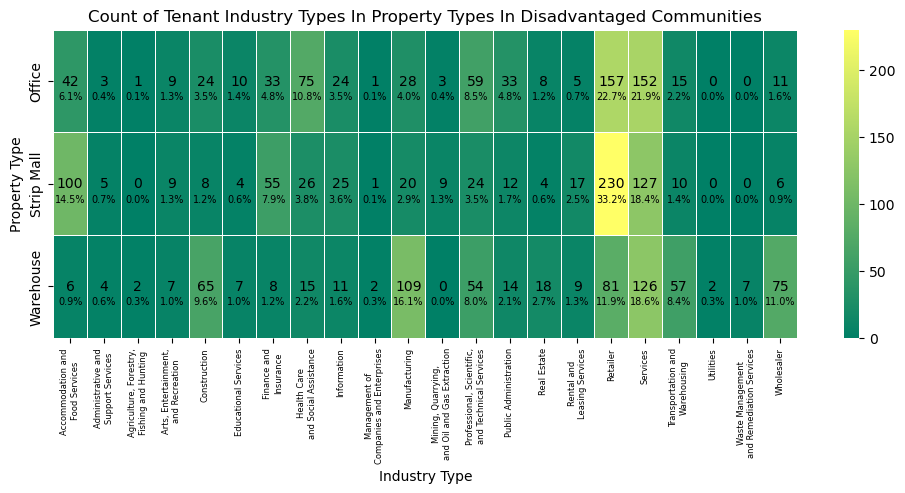

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'industry_count_by_prop_type' as your DataFrame
# If not, replace it with your actual grouped data
property_types_to_remove = ['Hospital', 'Multi-Family', 'Large Hotel', 'Outpatient']
filtered_tenant_df = disadvantaged_tenant_df[~disadvantaged_tenant_df['ComStock Property Type'].isin(property_types_to_remove)]
industry_count_by_prop_type = filtered_tenant_df.groupby(['ComStock Property Type', 'Industry']).size().unstack().fillna(0)


# Calculate the percentage of tenant types per property types
percentage_data = industry_count_by_prop_type.div(industry_count_by_prop_type.sum(axis=1), axis=0) * 100

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the heatmap
heatmap = sns.heatmap(industry_count_by_prop_type,
                      annot=True,
                      cmap='summer',
                      fmt='g',
                      linewidths=.5,
                      annot_kws = {'color': 'black'})

# Set the title and labels
plt.title('Count of Tenant Industry Types In Property Types In Disadvantaged Communities')
plt.xlabel('Industry Type')
plt.ylabel('Property Type')

# Custom function to replace the space after the second word with a newline character
def replace_space_after_second_word(label):
    words = label.split(' ', 2)  # Split into three parts using space as separator
    if len(words) > 2:
        return f"{words[0]} {words[1]}\n{words[2]}"
    else:
        return label

# Break x-axis labels into two lines after the second word
labels = [replace_space_after_second_word(label) for label in industry_count_by_prop_type.columns]
heatmap.set_xticklabels(labels, rotation=90, ha='center')

# Add percentage annotations under each count
for i in range(len(industry_count_by_prop_type.index)):
    for j in range(len(industry_count_by_prop_type.columns)):
        percentage = percentage_data.iloc[i, j]
        heatmap.text(j + 0.5, i + 0.65, f'{percentage:.1f}%', ha='center', va='center', fontsize=7)
        
# Adjust the font size of x-axis labels
plt.xticks(fontsize=6)

# Show the plot
plt.show()


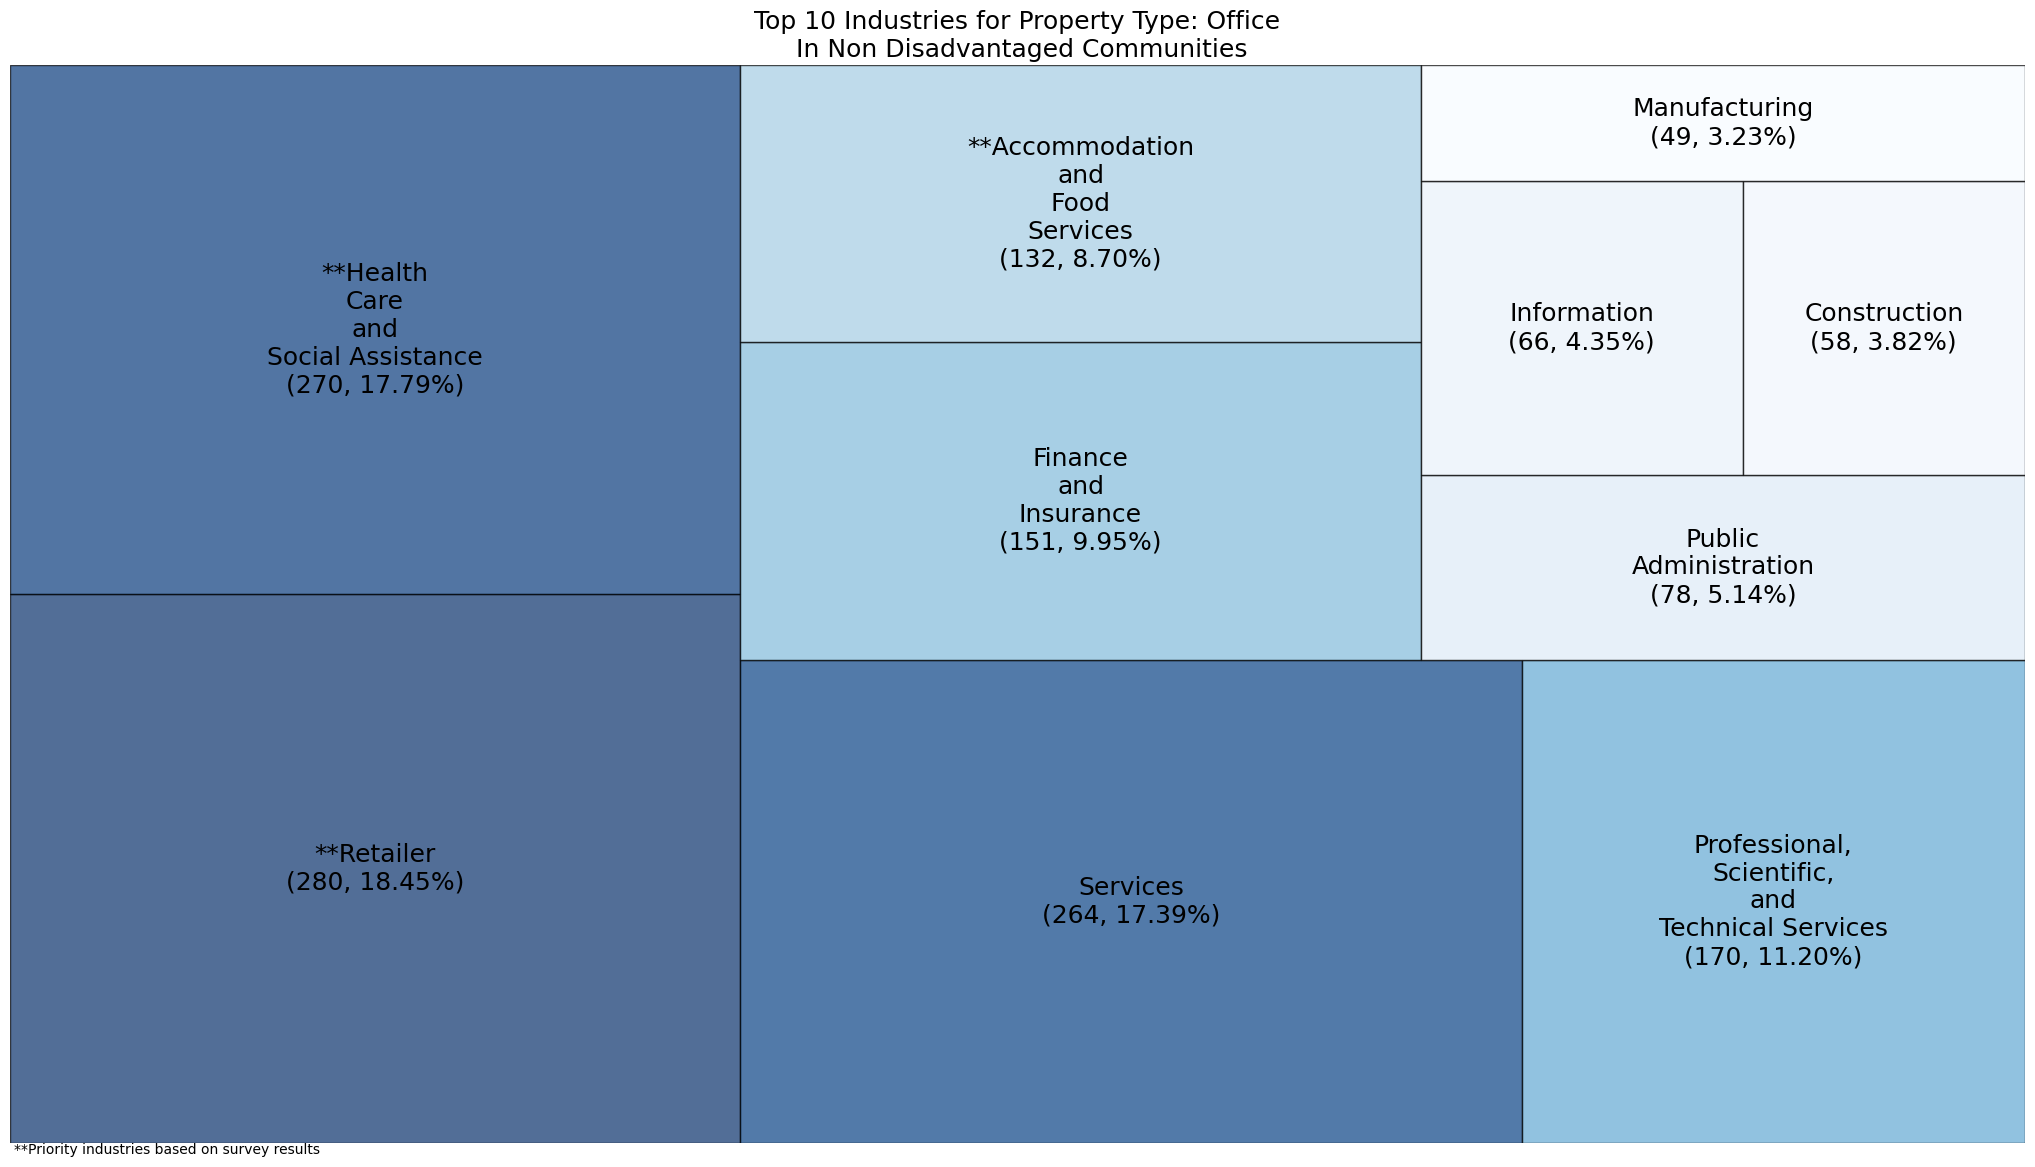

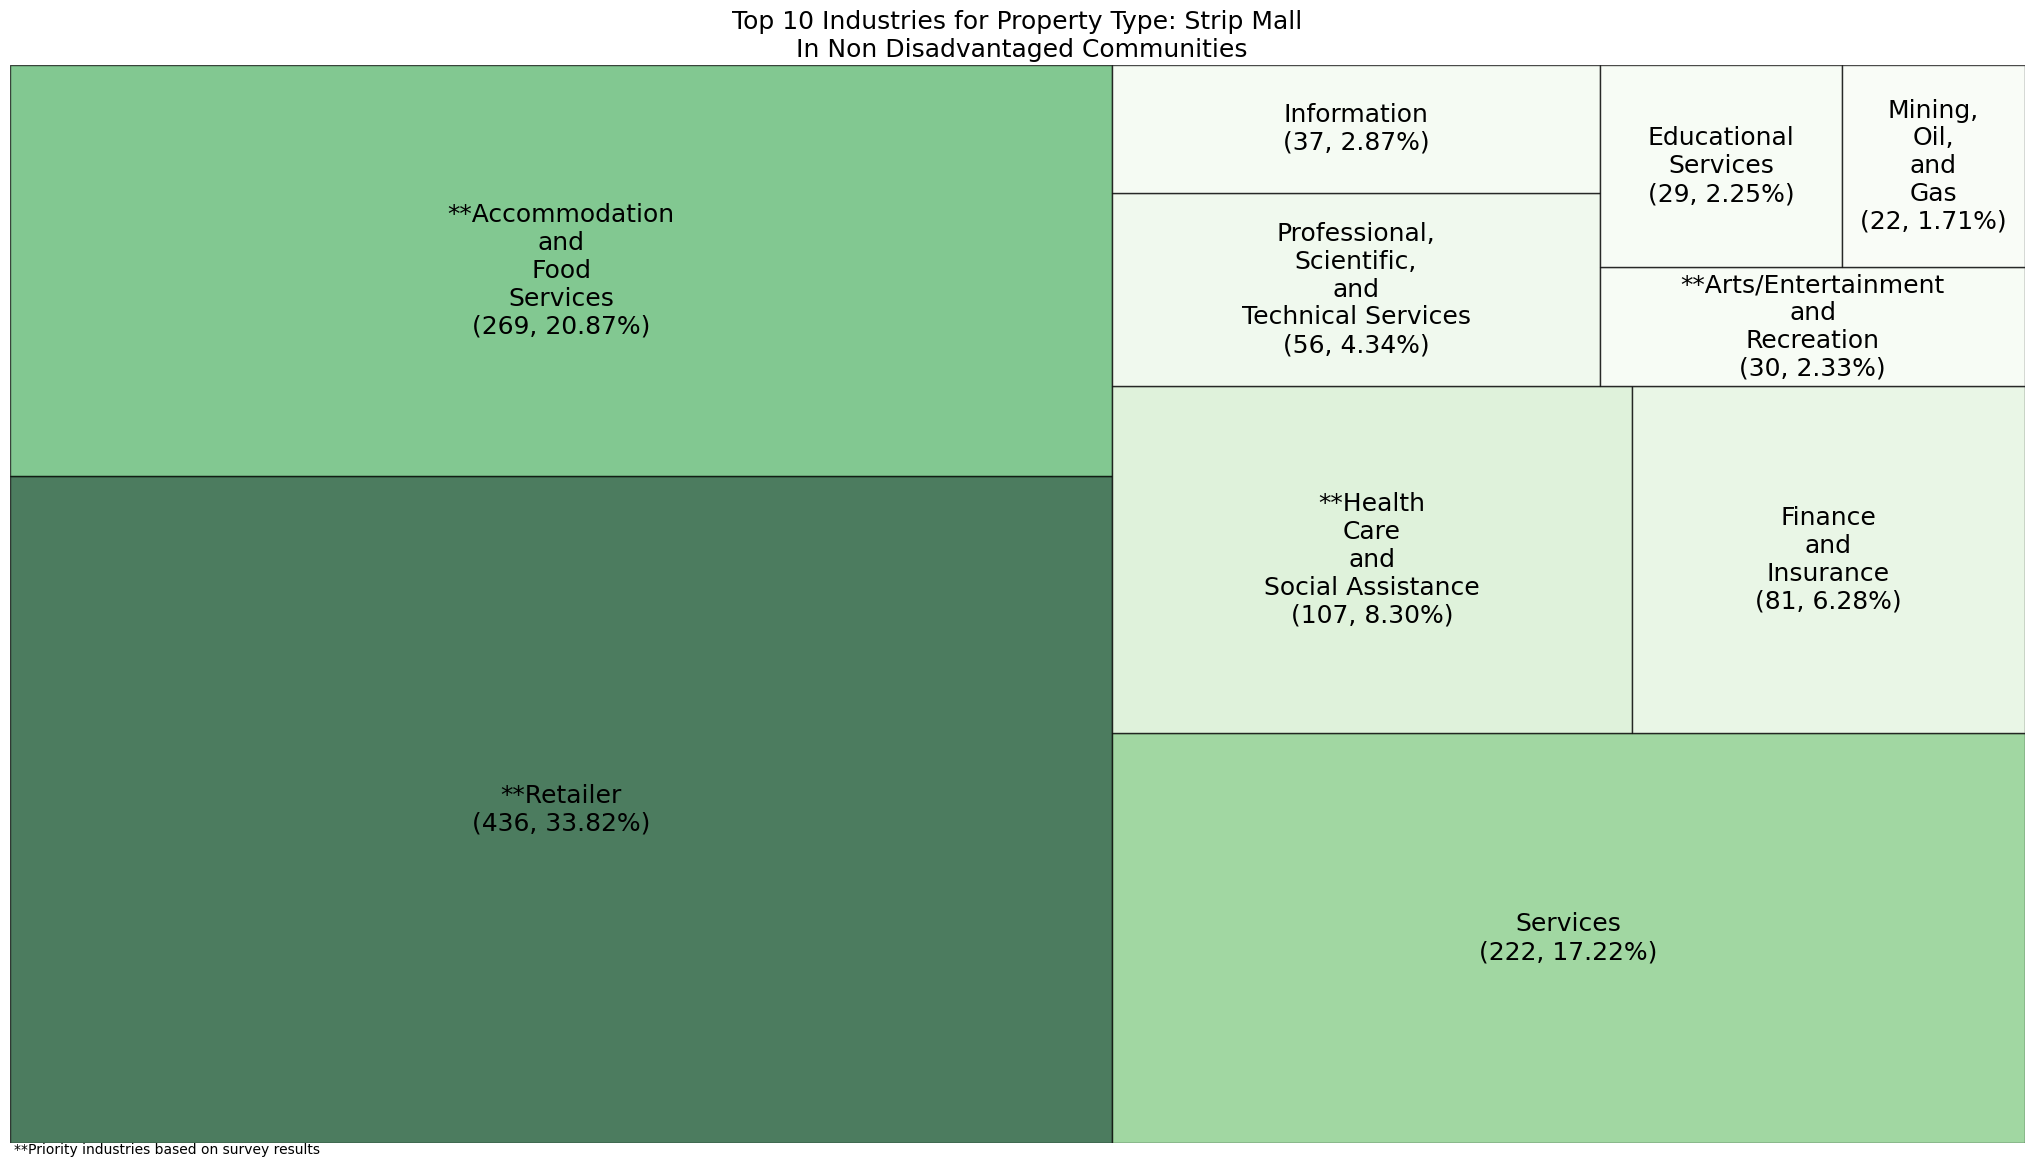

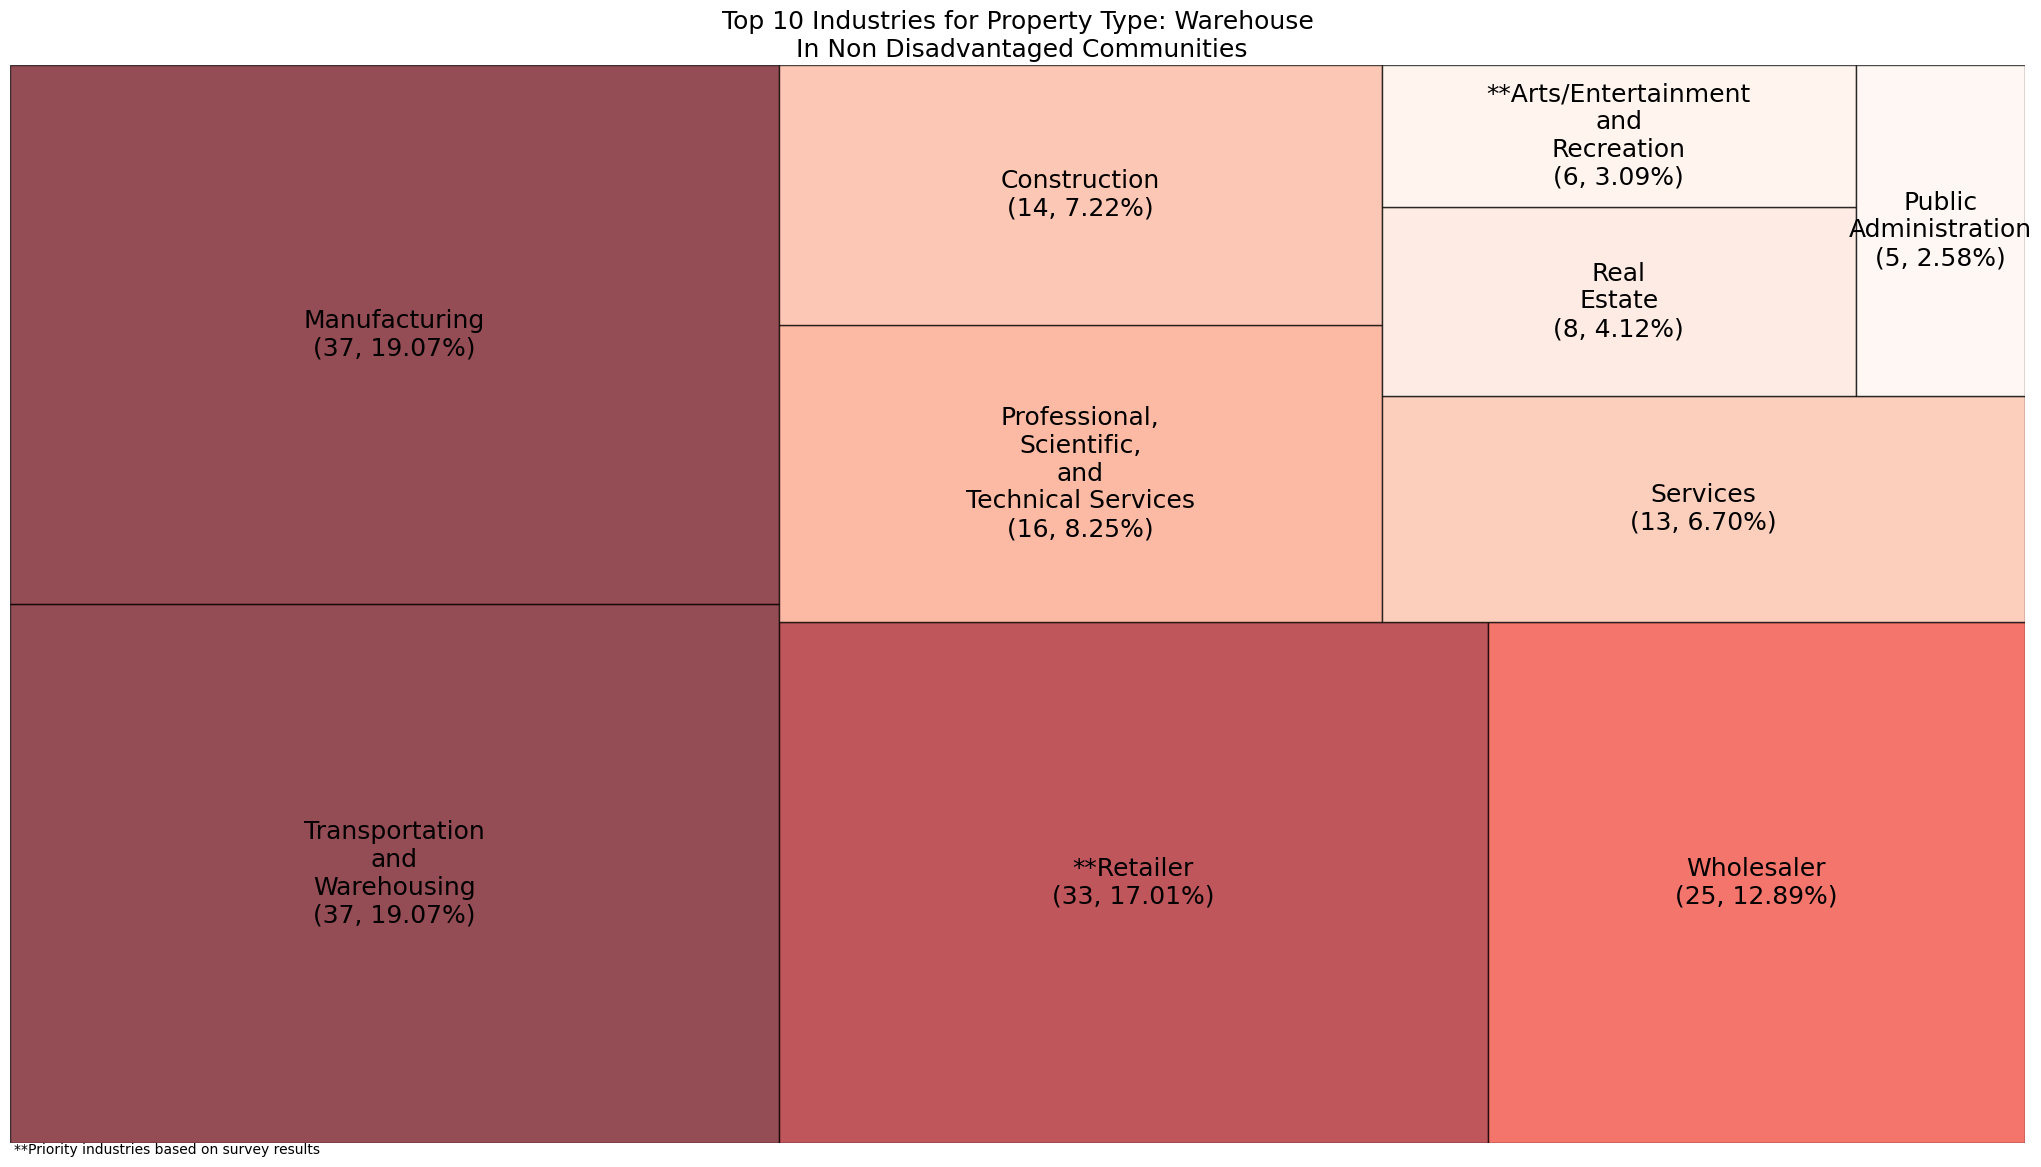

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Assuming you have 'industry_count_by_prop_type' as your DataFrame
# If not, replace it with your actual grouped data
property_types_to_remove = ['Hospital', 'Multi-Family', 'Large Hotel', 'Outpatient']
filtered_tenant_df = non_disadvantaged_tenant_df[~non_disadvantaged_tenant_df['ComStock Property Type'].isin(property_types_to_remove)]
industry_count_by_prop_type = filtered_tenant_df.groupby(['ComStock Property Type', 'Industry']).size().unstack().fillna(0)

# Define colormaps for each chart
colormap_dict = {'Blues': plt.cm.Blues, 'Greens': plt.cm.Greens, 'Reds': plt.cm.Reds}

# Iterate through property types and plot treemaps with different colormaps
for i, property_type in enumerate(industry_count_by_prop_type.index):
    # Get data for the specific property type
    industry_count_subset = industry_count_by_prop_type.loc[property_type]

    # Skip if all values are zero
    if industry_count_subset.sum() == 0:
        continue

    # Get the top 10 industries
    top_10_industries = industry_count_subset.sort_values(ascending=False).head(10)

    # Convert the data to a DataFrame
    industry_count_long = pd.DataFrame({'Industry': top_10_industries.index, 'Count': top_10_industries.values})

    # Create a mapping dictionary for industry name abbreviations
    industry_abbreviations = {
        'Mining, Quarrying, and Oil and Gas Extraction': 'Mining, Oil, and Gas',
        'Arts, Entertainment, and Recreation': 'Arts/Entertainment and Recreation',
        # Add more mappings as needed
    }
    # Specify the labels you want to bold
    bold_labels = {'Accommodation and Food Services':'**Accommodation and Food Services',
                   'Retailer':'**Retailer',
                   'Health Care and Social Assistance':'**Health Care and Social Assistance',
                    'Arts/Entertainment and Recreation':'**Arts/Entertainment and Recreation'}
    # Replace industry names with abbreviations and appropriate priortized status
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(industry_abbreviations)
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(bold_labels)

    # Insert <br> in the industry labels
    industry_count_long['Industry'] = industry_count_long['Industry'].str.replace(' ', '\n', 3)

    # Calculate percentage
    total_count = industry_count_long['Count'].sum()
    industry_count_long['Percentage'] = (industry_count_long['Count'] / total_count) * 100

    # Choose the corresponding colormap for each chart
    current_cmap = list(colormap_dict.values())[i]

    # Set up normalization
    norm = plt.Normalize(vmin=industry_count_long['Count'].min(), vmax=industry_count_long['Count'].max())

    # Set colors using the colormap with normalization
    colors = [current_cmap(norm(value)) for value in industry_count_long['Count']]

    # Plotting for each property type with different colormaps
    plt.figure(figsize=(26, 14))
    squarify.plot(sizes=industry_count_long['Count'], 
                  label=industry_count_long.apply(lambda row: f"{row['Industry']}\n({int(row['Count'])}, {row['Percentage']:.2f}%)", axis=1),
                  text_kwargs={'fontsize': 18, },  # Adjust the fontsize value as needed                  
                  alpha=0.7,
                  edgecolor="black", linewidth=1,
                  color=colors)
 
     # Add note to the plot below the chart in the center
    plt.text(.2, -0.01, '**Priority industries based on survey results', ha='left', va='top', fontsize=10, color='black')

    plt.title(f'Top 10 Industries for Property Type: {property_type}\n In Non Disadvantaged Communities', fontsize = 18)
    plt.axis('off')  # Turn off axis labels

    plt.show()


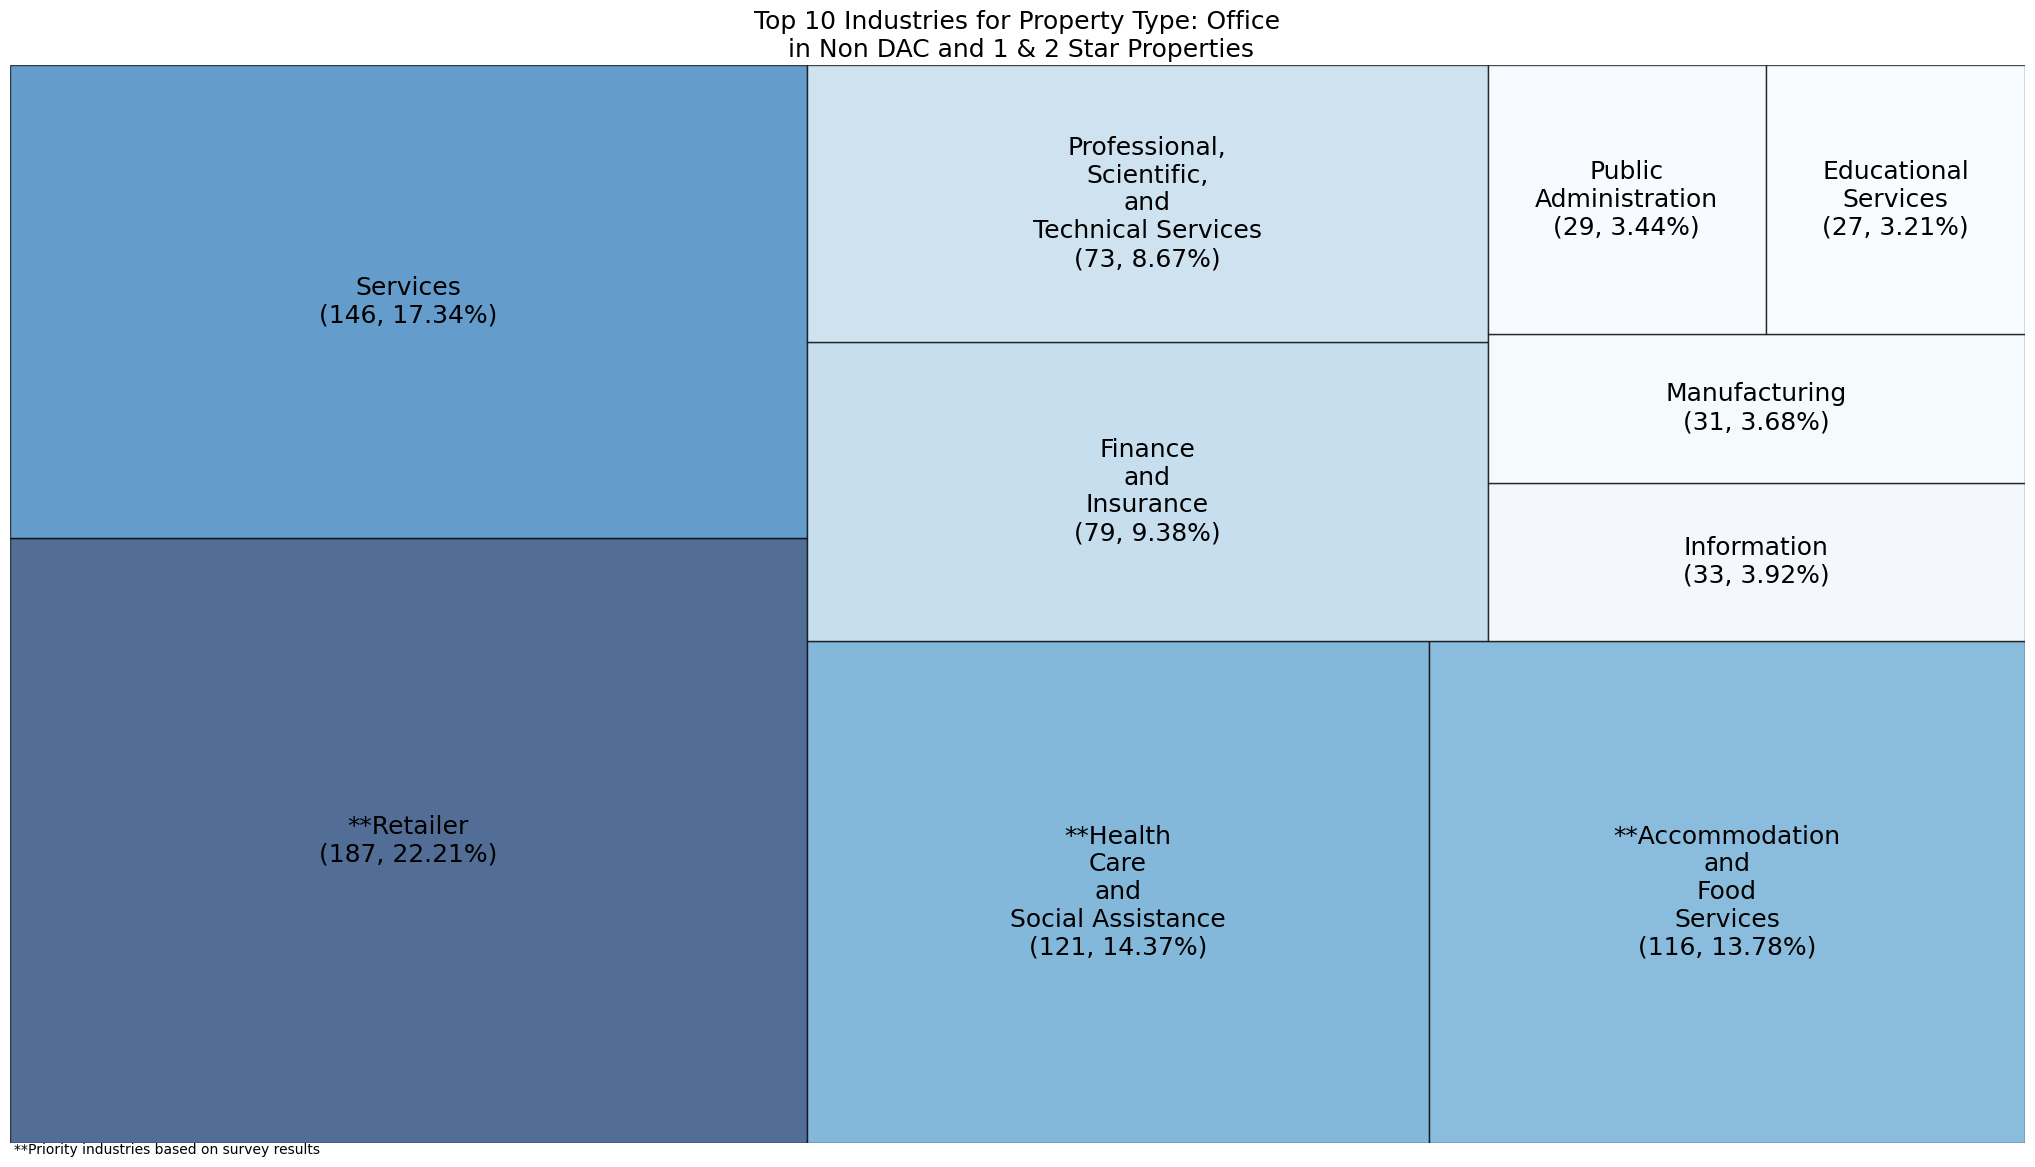

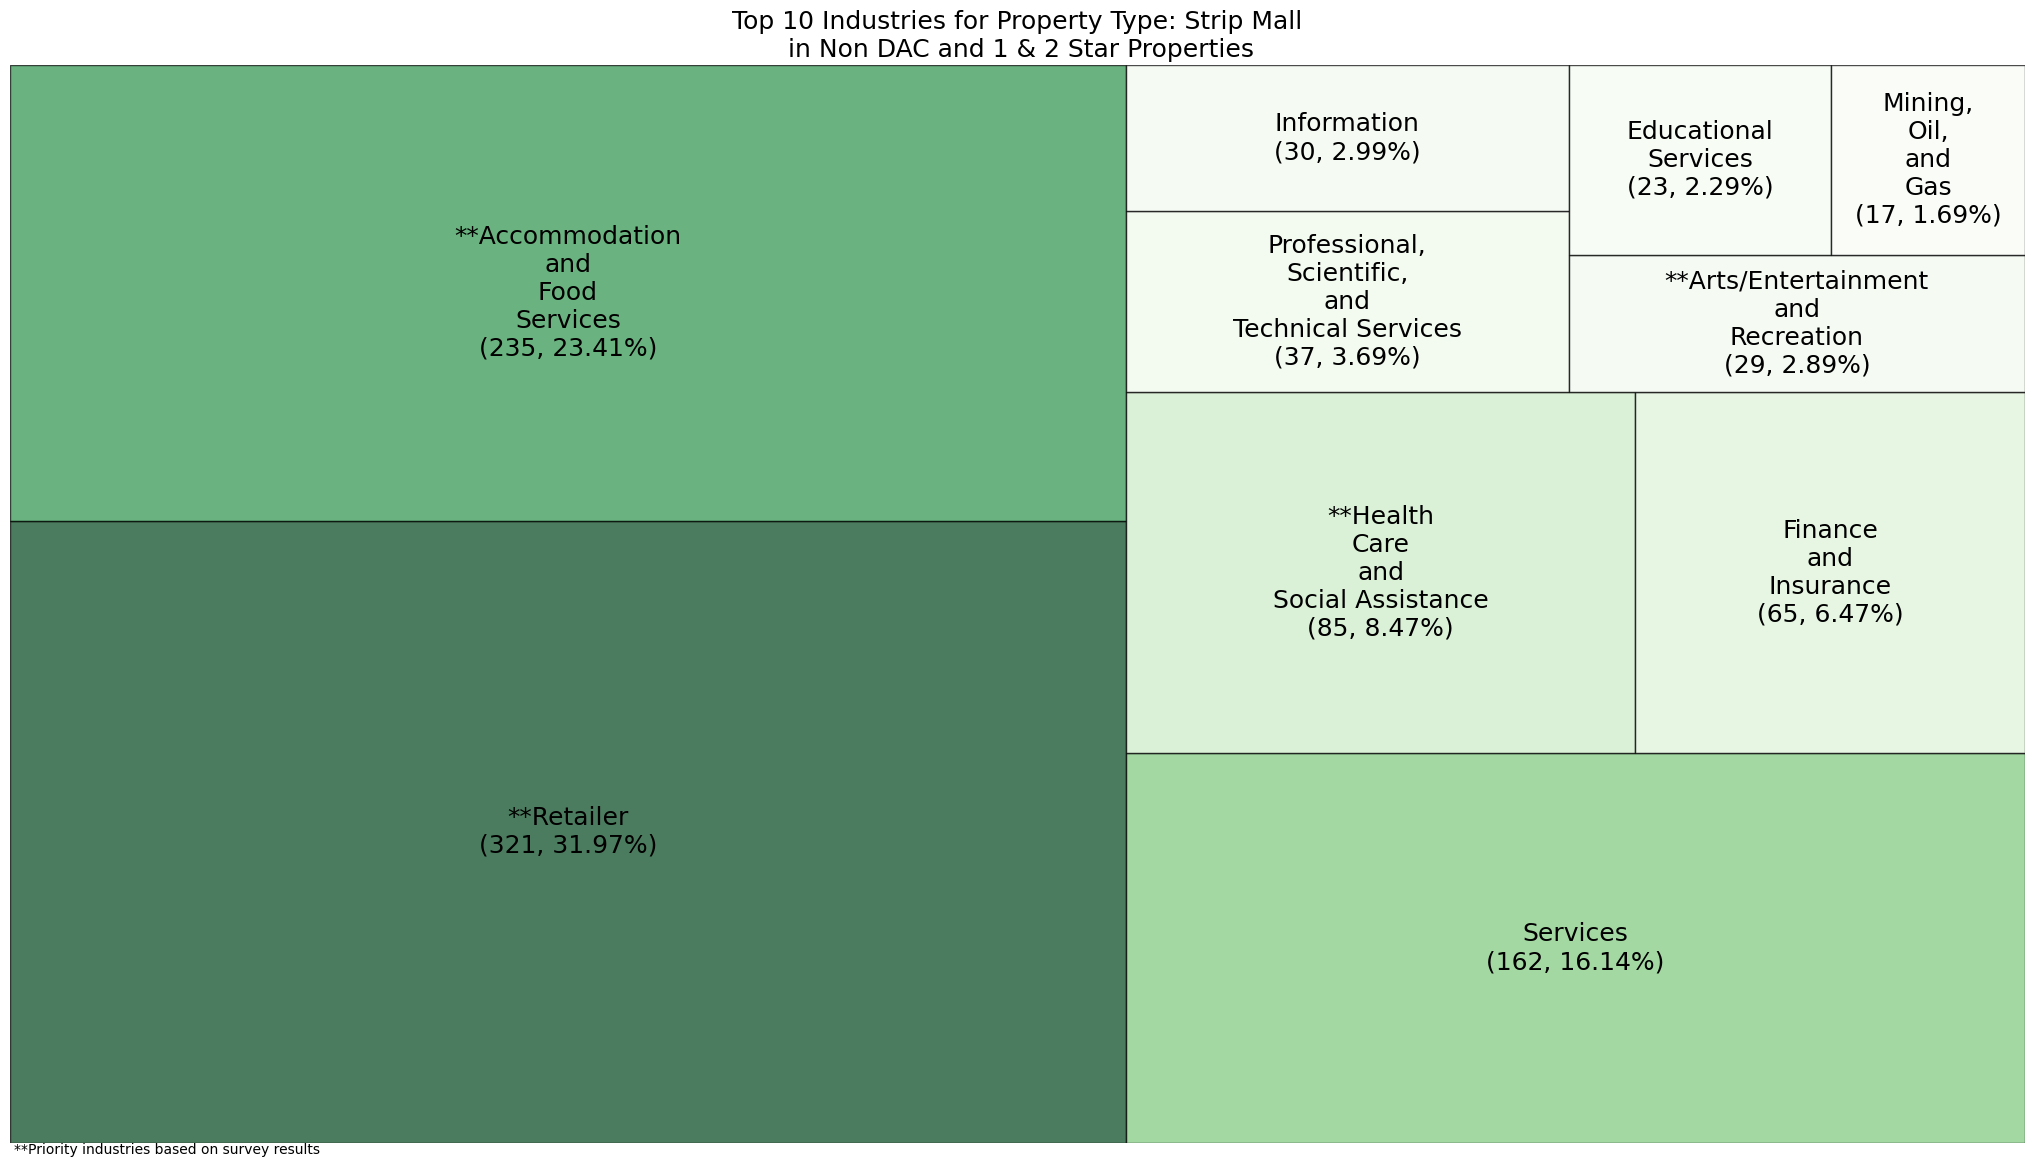

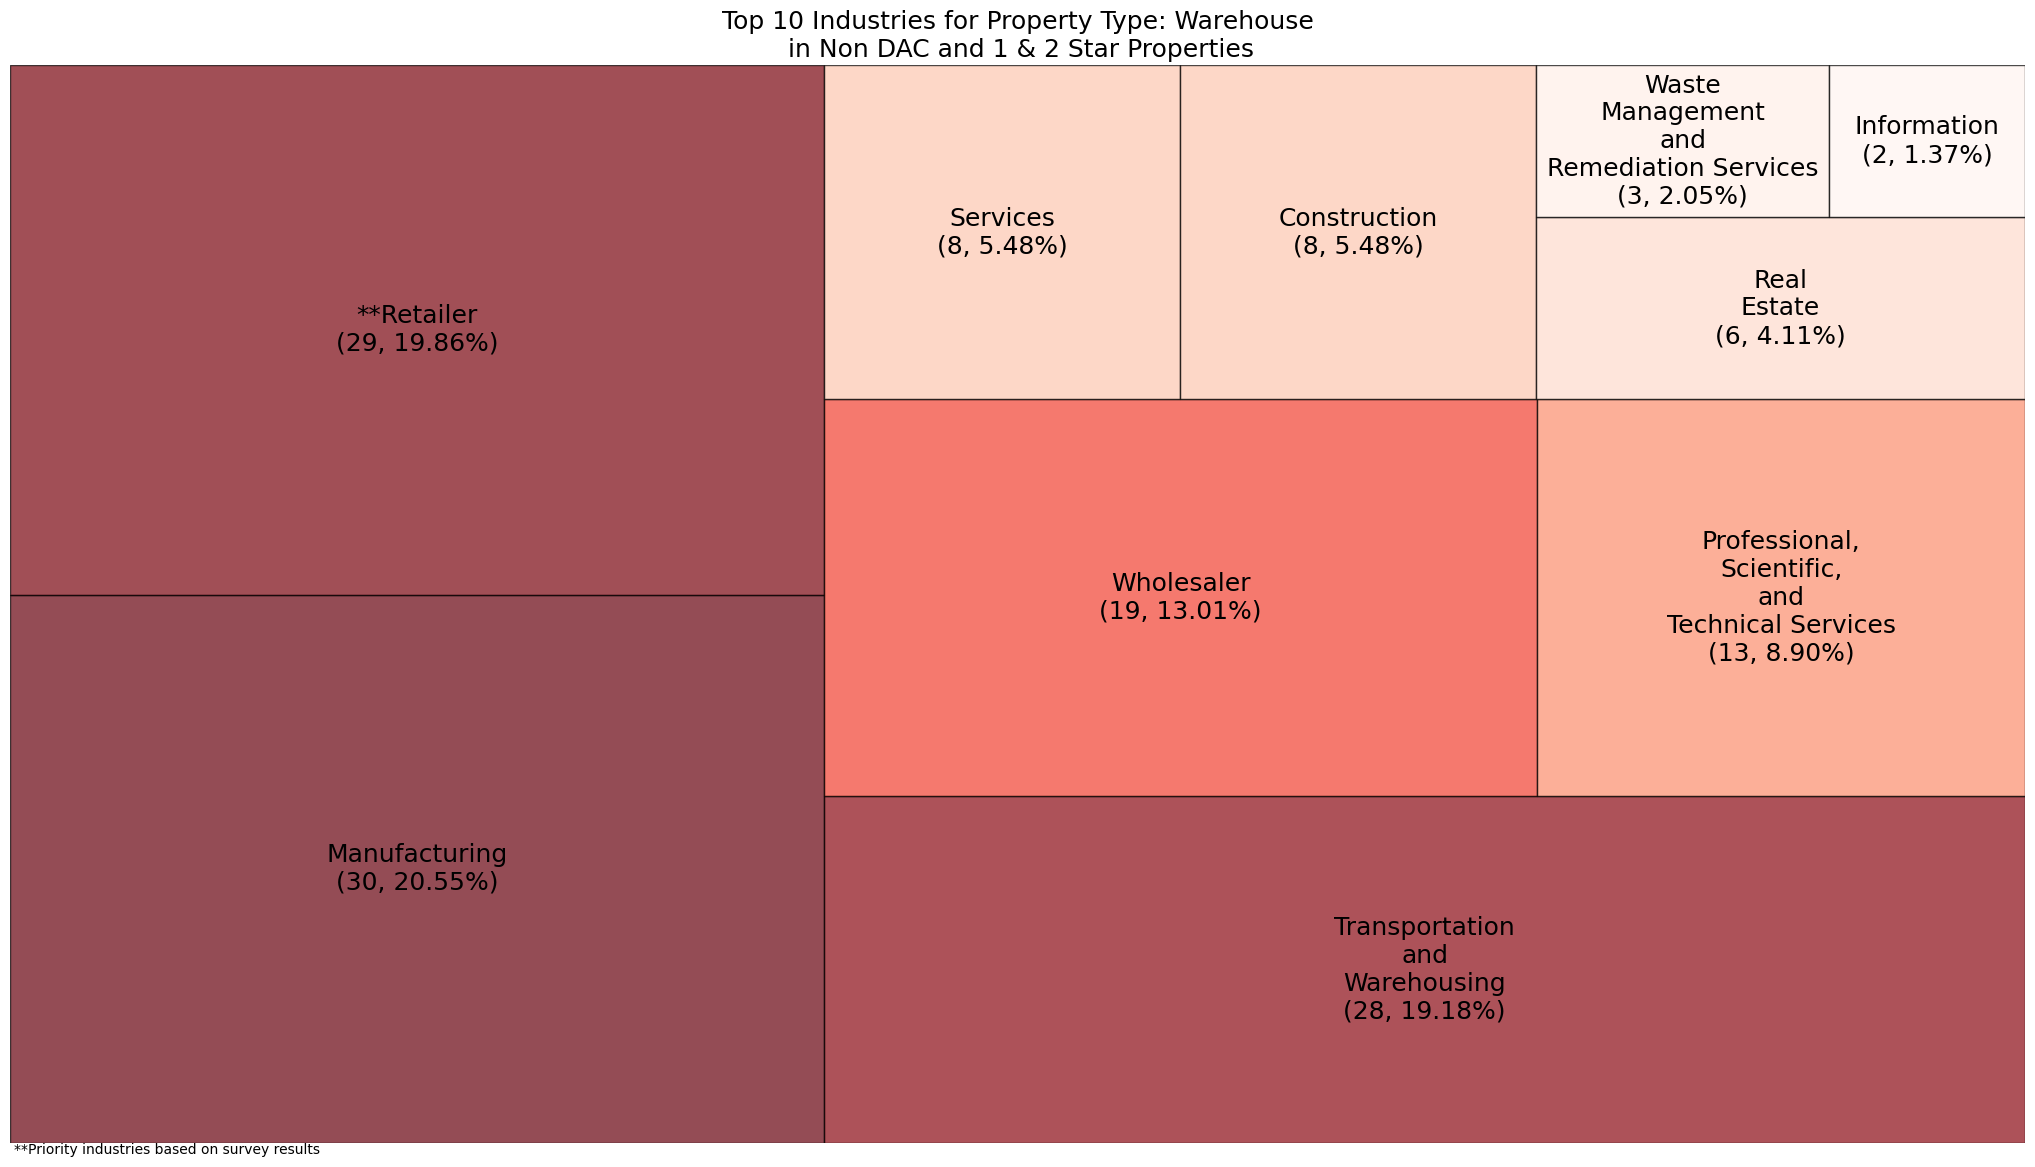

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Assuming you have 'industry_count_by_prop_type' as your DataFrame
# If not, replace it with your actual grouped data
property_types_to_remove = ['Hospital', 'Multi-Family', 'Large Hotel', 'Outpatient']
filtered_tenant_df = non_disadvantaged_tenant_df[~non_disadvantaged_tenant_df['ComStock Property Type'].isin(property_types_to_remove)]
filtered_tenant_df = filtered_tenant_df[~filtered_tenant_df['Star Rating'].isin([1,2])]
industry_count_by_prop_type = filtered_tenant_df.groupby(['ComStock Property Type', 'Industry']).size().unstack().fillna(0)

# Define colormaps for each chart
colormap_dict = {'Blues': plt.cm.Blues, 'Greens': plt.cm.Greens, 'Reds': plt.cm.Reds}

# Iterate through property types and plot treemaps with different colormaps
for i, property_type in enumerate(industry_count_by_prop_type.index):
    # Get data for the specific property type
    industry_count_subset = industry_count_by_prop_type.loc[property_type]

    # Skip if all values are zero
    if industry_count_subset.sum() == 0:
        continue

    # Get the top 10 industries
    top_10_industries = industry_count_subset.sort_values(ascending=False).head(10)

    # Convert the data to a DataFrame
    industry_count_long = pd.DataFrame({'Industry': top_10_industries.index, 'Count': top_10_industries.values})

    # Create a mapping dictionary for industry name abbreviations
    industry_abbreviations = {
        'Mining, Quarrying, and Oil and Gas Extraction': 'Mining, Oil, and Gas',
        'Arts, Entertainment, and Recreation': 'Arts/Entertainment and Recreation',
        # Add more mappings as needed
    }
    # Specify the labels you want to bold
    bold_labels = {'Accommodation and Food Services':'**Accommodation and Food Services',
                   'Retailer':'**Retailer',
                   'Health Care and Social Assistance':'**Health Care and Social Assistance',
                    'Arts/Entertainment and Recreation':'**Arts/Entertainment and Recreation'}
    # Replace industry names with abbreviations and appropriate priortized status
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(industry_abbreviations)
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(bold_labels)

    # Insert <br> in the industry labels
    industry_count_long['Industry'] = industry_count_long['Industry'].str.replace(' ', '\n', 3)

    # Calculate percentage
    total_count = industry_count_long['Count'].sum()
    industry_count_long['Percentage'] = (industry_count_long['Count'] / total_count) * 100

    # Choose the corresponding colormap for each chart
    current_cmap = list(colormap_dict.values())[i]

    # Set up normalization
    norm = plt.Normalize(vmin=industry_count_long['Count'].min(), vmax=industry_count_long['Count'].max())

    # Set colors using the colormap with normalization
    colors = [current_cmap(norm(value)) for value in industry_count_long['Count']]

    # Plotting for each property type with different colormaps
    plt.figure(figsize=(26, 14))
    squarify.plot(sizes=industry_count_long['Count'], 
                  label=industry_count_long.apply(lambda row: f"{row['Industry']}\n({int(row['Count'])}, {row['Percentage']:.2f}%)", axis=1),
                  text_kwargs={'fontsize': 18, },  # Adjust the fontsize value as needed                  
                  alpha=0.7,
                  edgecolor="black", linewidth=1,
                  color=colors)
 
     # Add note to the plot below the chart in the center
    plt.text(.2, -0.01, '**Priority industries based on survey results', ha='left', va='top', fontsize=10, color='black')

    plt.title(f'Top 10 Industries for Property Type: {property_type}\n in Non DAC and 1 & 2 Star Properties', fontsize = 18)
    plt.axis('off')  # Turn off axis labels

    plt.show()


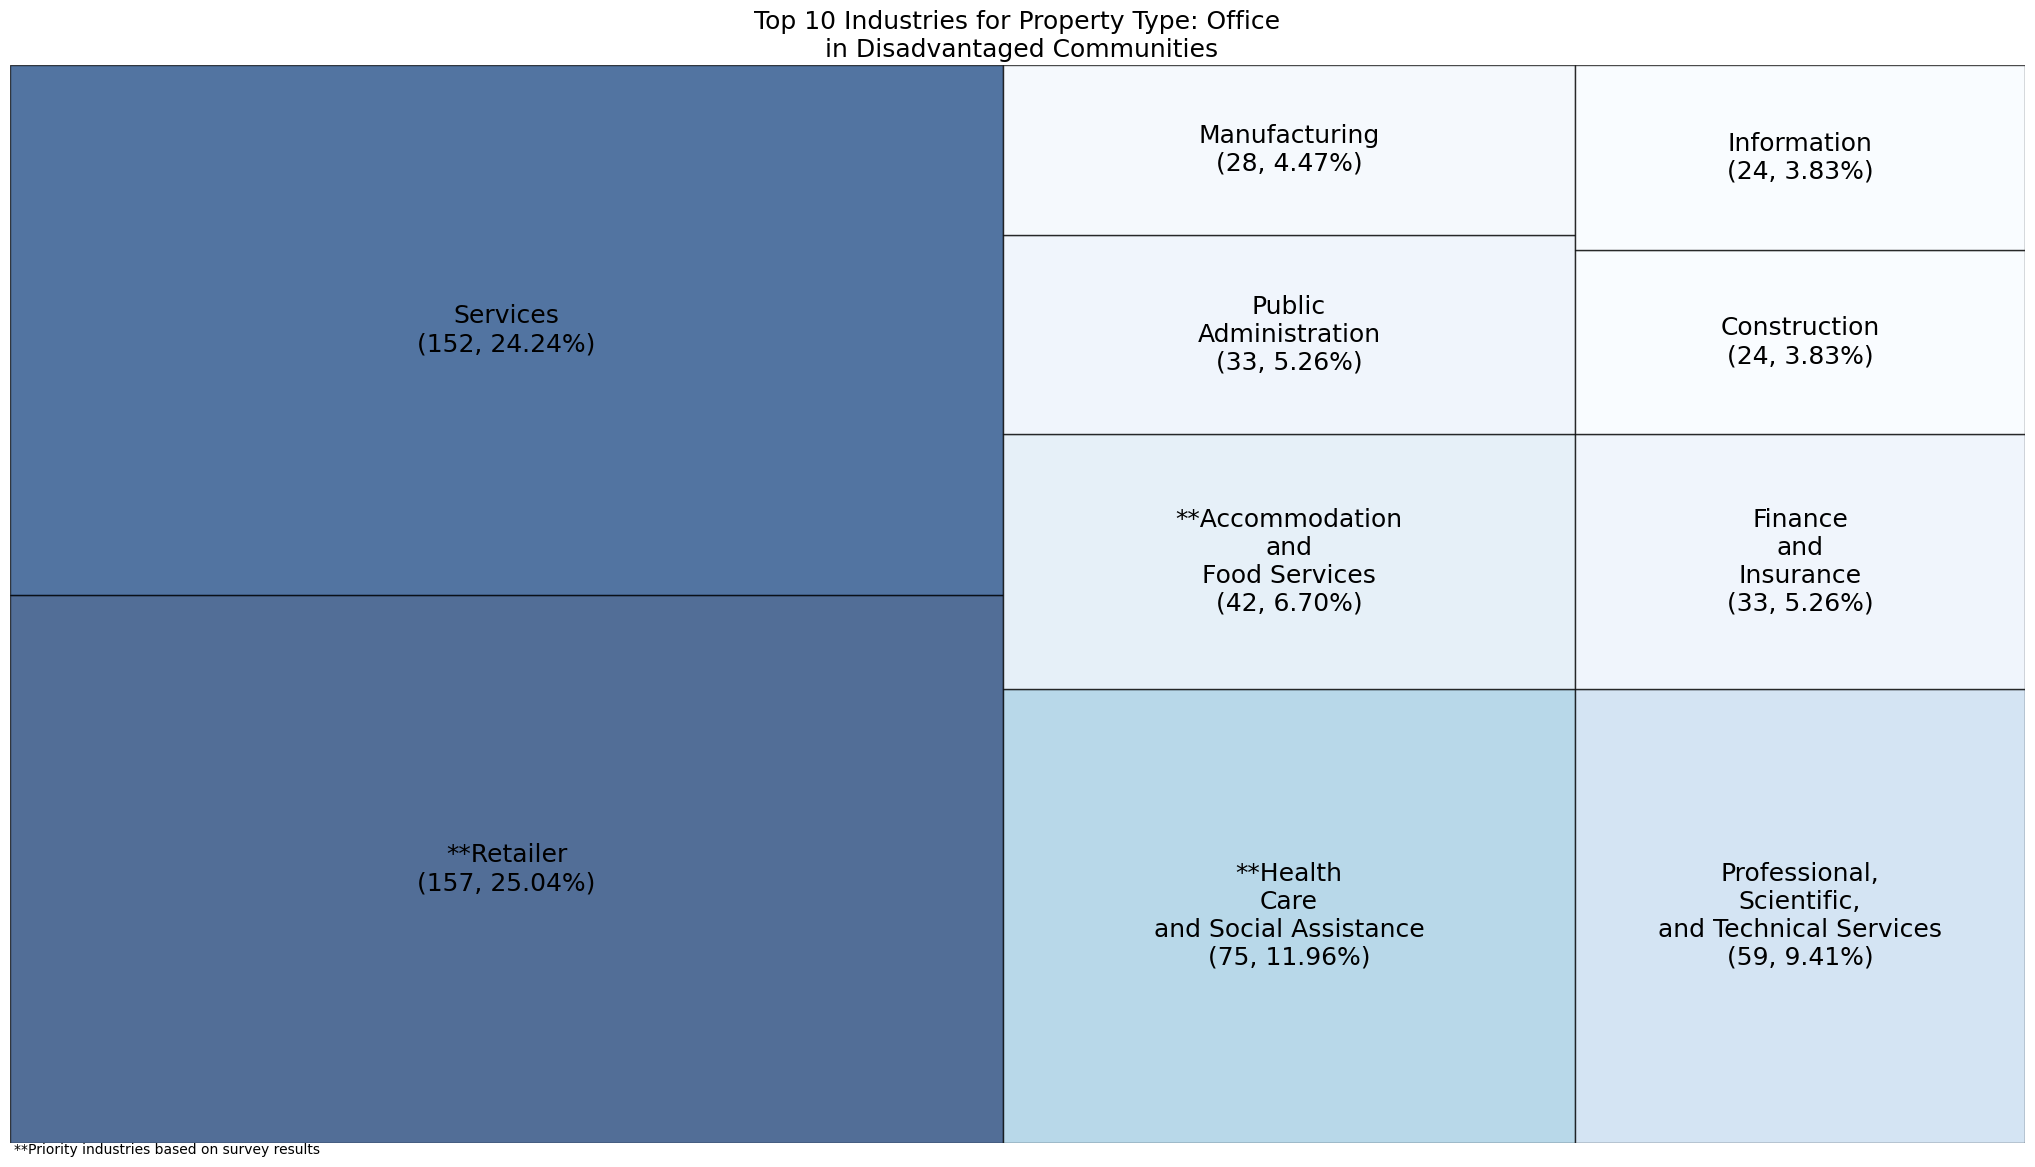

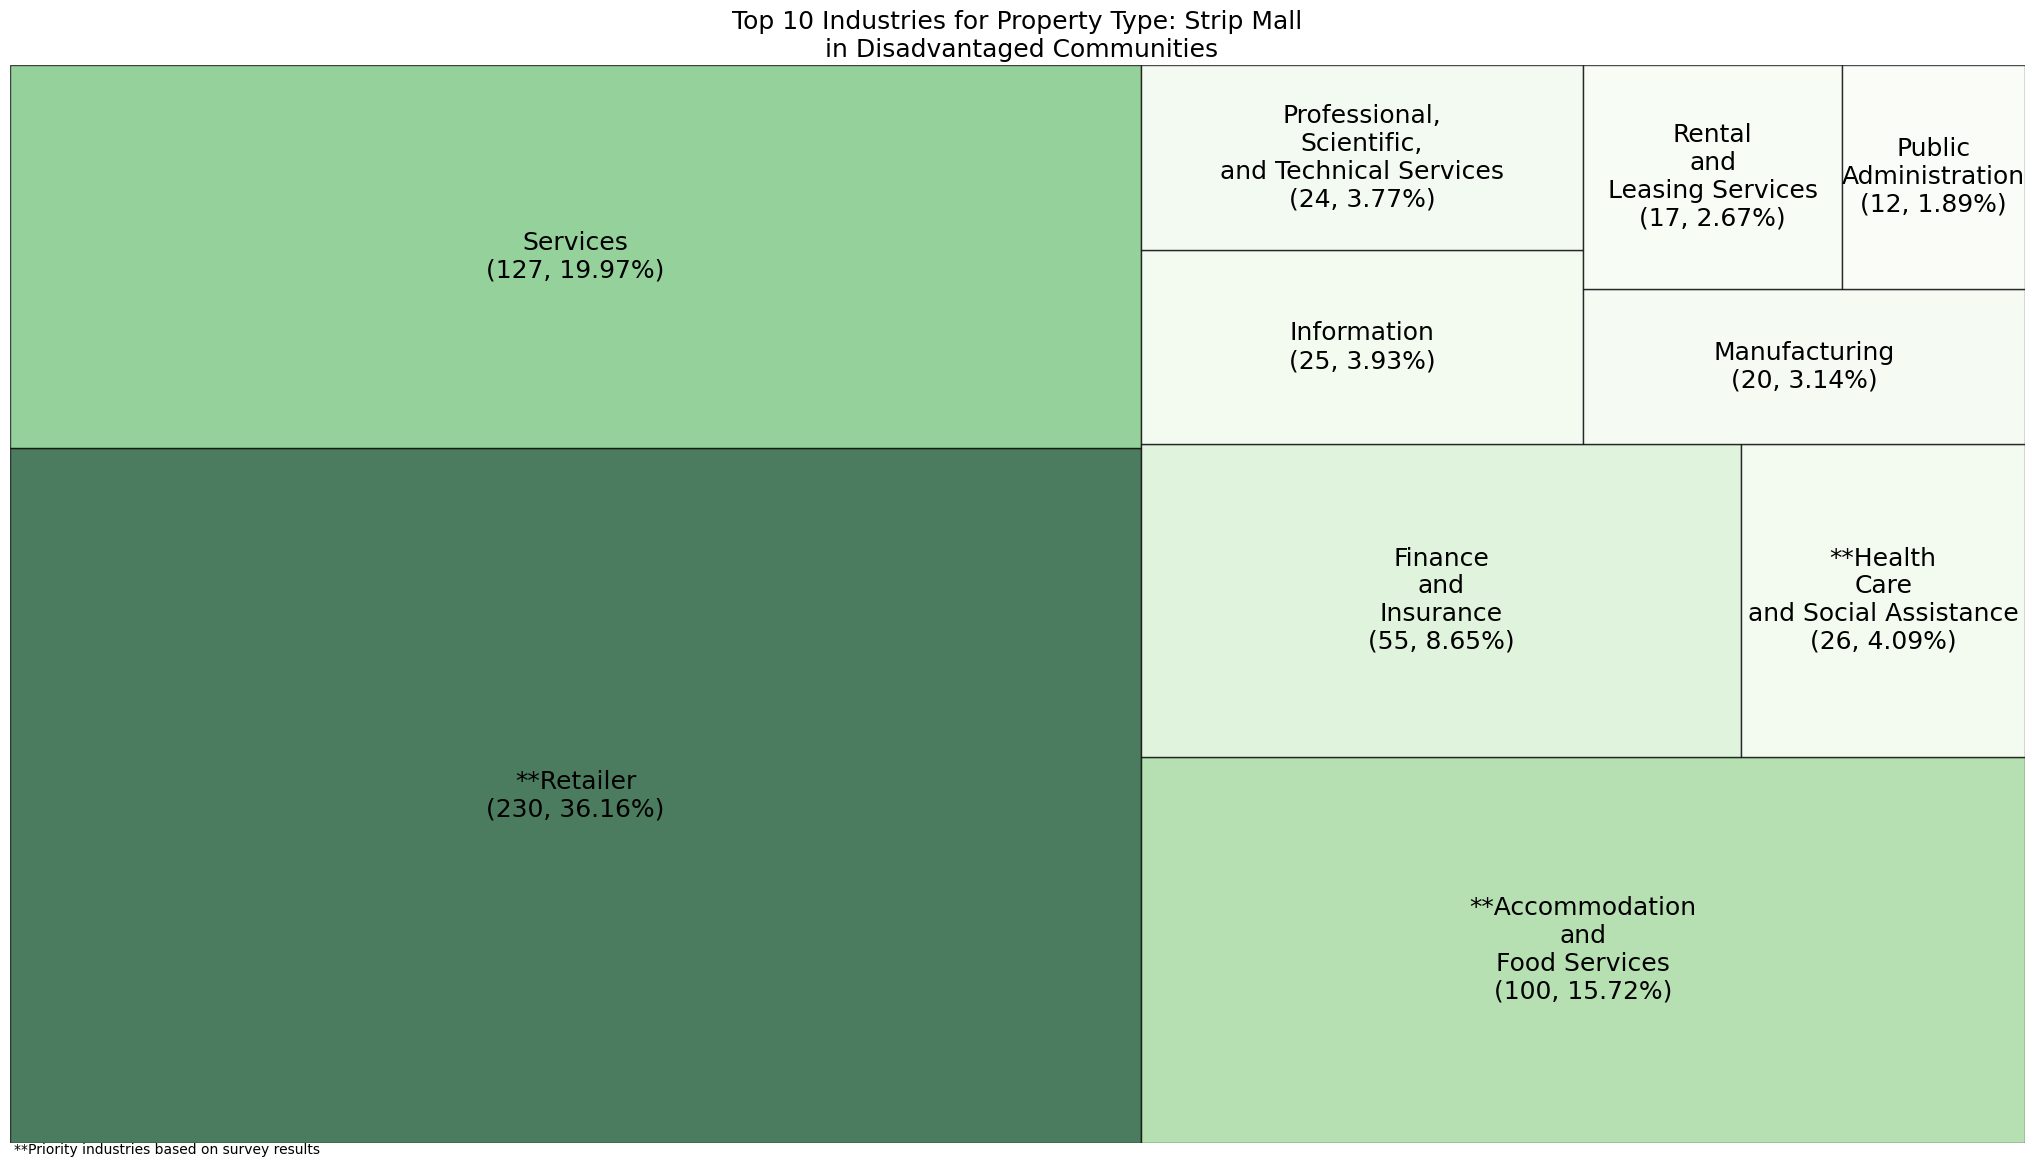

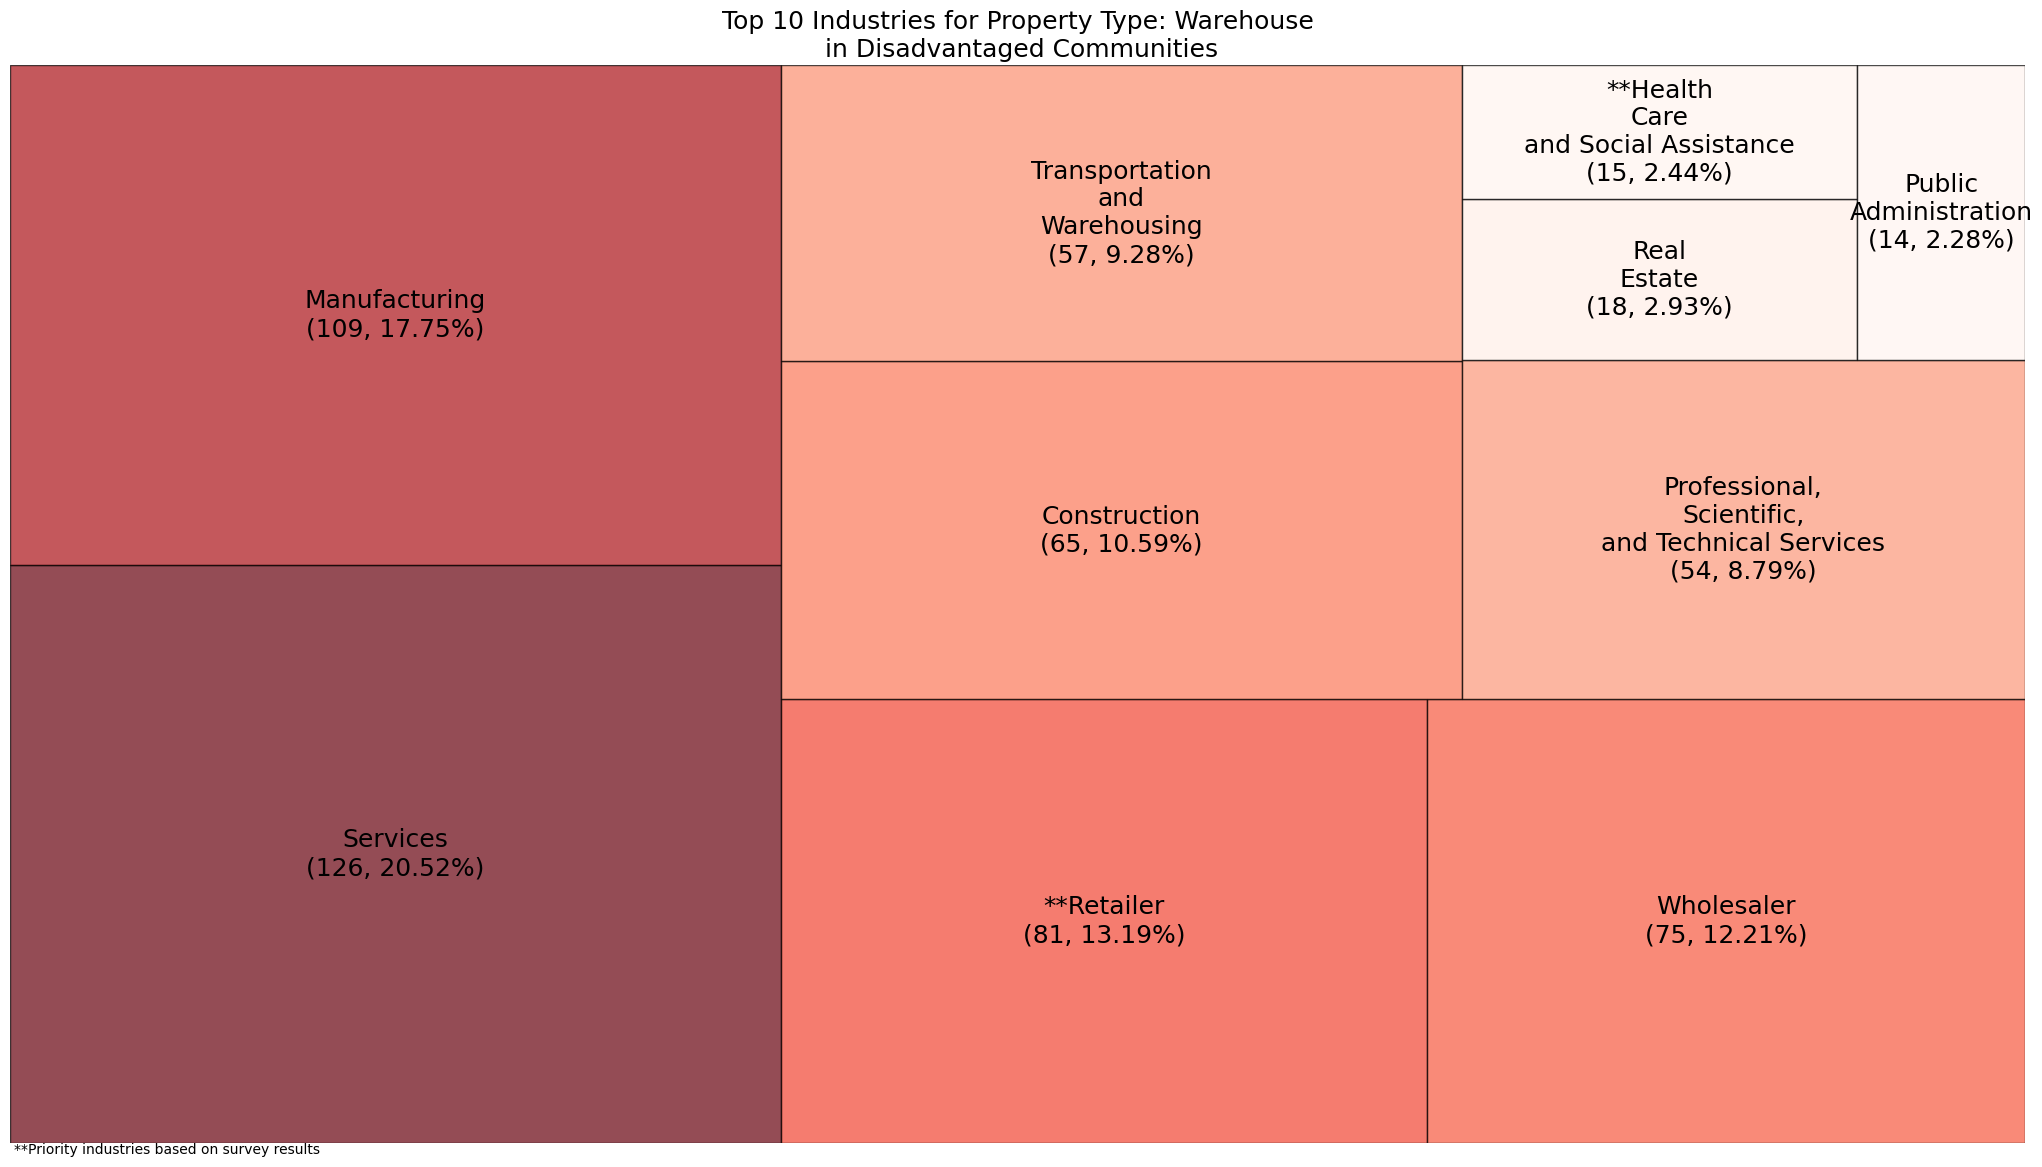

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Assuming you have 'industry_count_by_prop_type' as your DataFrame
# If not, replace it with your actual grouped data
property_types_to_remove = ['Hospital', 'Multi-Family', 'Large Hotel', 'Outpatient']
filtered_tenant_df = disadvantaged_tenant_df[~disadvantaged_tenant_df['ComStock Property Type'].isin(property_types_to_remove)]
industry_count_by_prop_type = filtered_tenant_df.groupby(['ComStock Property Type', 'Industry']).size().unstack().fillna(0)

# Define colormaps for each chart
colormap_dict = {'Blues': plt.cm.Blues, 'Greens': plt.cm.Greens, 'Reds': plt.cm.Reds}

# Iterate through property types and plot treemaps with different colormaps
for i, property_type in enumerate(industry_count_by_prop_type.index):
    # Get data for the specific property type
    industry_count_subset = industry_count_by_prop_type.loc[property_type]

    # Skip if all values are zero
    if industry_count_subset.sum() == 0:
        continue

    # Get the top 10 industries
    top_10_industries = industry_count_subset.sort_values(ascending=False).head(10)

    # Convert the data to a DataFrame
    industry_count_long = pd.DataFrame({'Industry': top_10_industries.index, 'Count': top_10_industries.values})
    
    # Create a mapping dictionary for industry name abbreviations
    industry_abbreviations = {
        'Mining, Quarrying, and Oil and Gas Extraction': 'Mining, Oil, and Gas',
        'Arts, Entertainment, and Recreation': 'Arts/Entertainment and Recreation',
        # Add more mappings as needed
    }
   # Specify the labels you want to bold
    bold_labels = {'Accommodation and Food Services':'**Accommodation and Food Services',
                   'Retailer':'**Retailer',
                   'Health Care and Social Assistance':'**Health Care and Social Assistance',
                    'Arts/Entertainment and Recreation':'**Arts/Entertainment and Recreation'}
    # Replace industry names with abbreviations and appropriate priortized status
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(industry_abbreviations)
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(bold_labels)
    
    # Insert <br> in the industry labels
    industry_count_long['Industry'] = industry_count_long['Industry'].str.replace(' ', '\n',2)

    # Calculate percentage
    total_count = industry_count_long['Count'].sum()
    industry_count_long['Percentage'] = (industry_count_long['Count'] / total_count) * 100

    # Choose the corresponding colormap for each chart
    current_cmap = list(colormap_dict.values())[i]

    # Set up normalization
    norm = plt.Normalize(vmin=industry_count_long['Count'].min(), vmax=industry_count_long['Count'].max())

    # Set colors using the colormap with normalization
    colors = [current_cmap(norm(value)) for value in industry_count_long['Count']]

    # Plotting for each property type with different colormaps
    plt.figure(figsize=(26, 14))
    squarify.plot(sizes=industry_count_long['Count'], 
                  label=industry_count_long.apply(lambda row: f"{row['Industry']}\n({int(row['Count'])}, {row['Percentage']:.2f}%)", axis=1),
                  text_kwargs={'fontsize': 18},  # Adjust the fontsize value as needed                  
                  alpha=0.7,
                  edgecolor="black", linewidth=1,
                  color=colors)
    
    # Add note to the plot below the chart in the center
    plt.text(.2, -0.01, '**Priority industries based on survey results', ha='left', va='top', fontsize=10, color='black')

    plt.title(f'Top 10 Industries for Property Type: {property_type}\n in Disadvantaged Communities', fontsize = 18)
    plt.axis('off')  # Turn off axis labels

    plt.show()


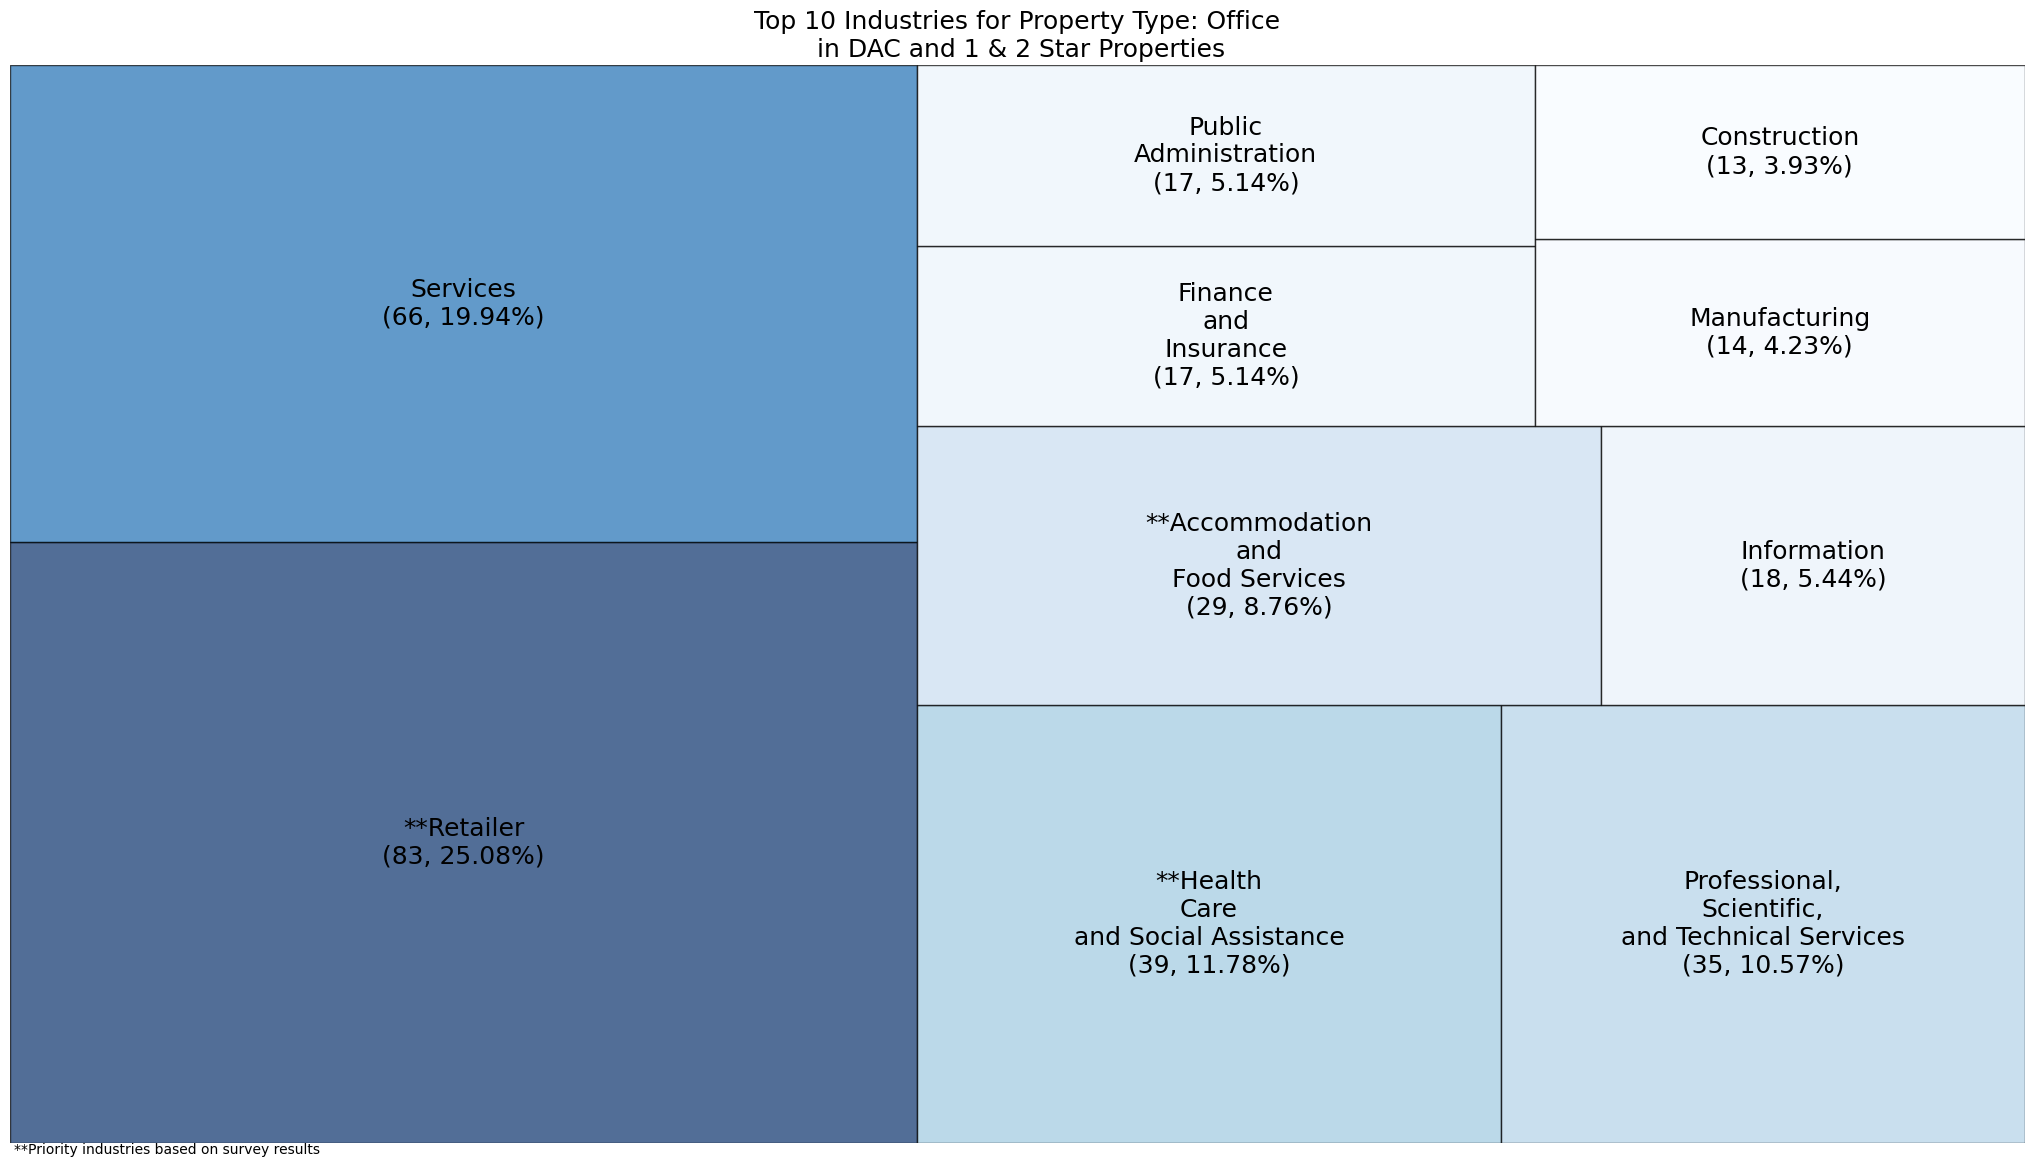

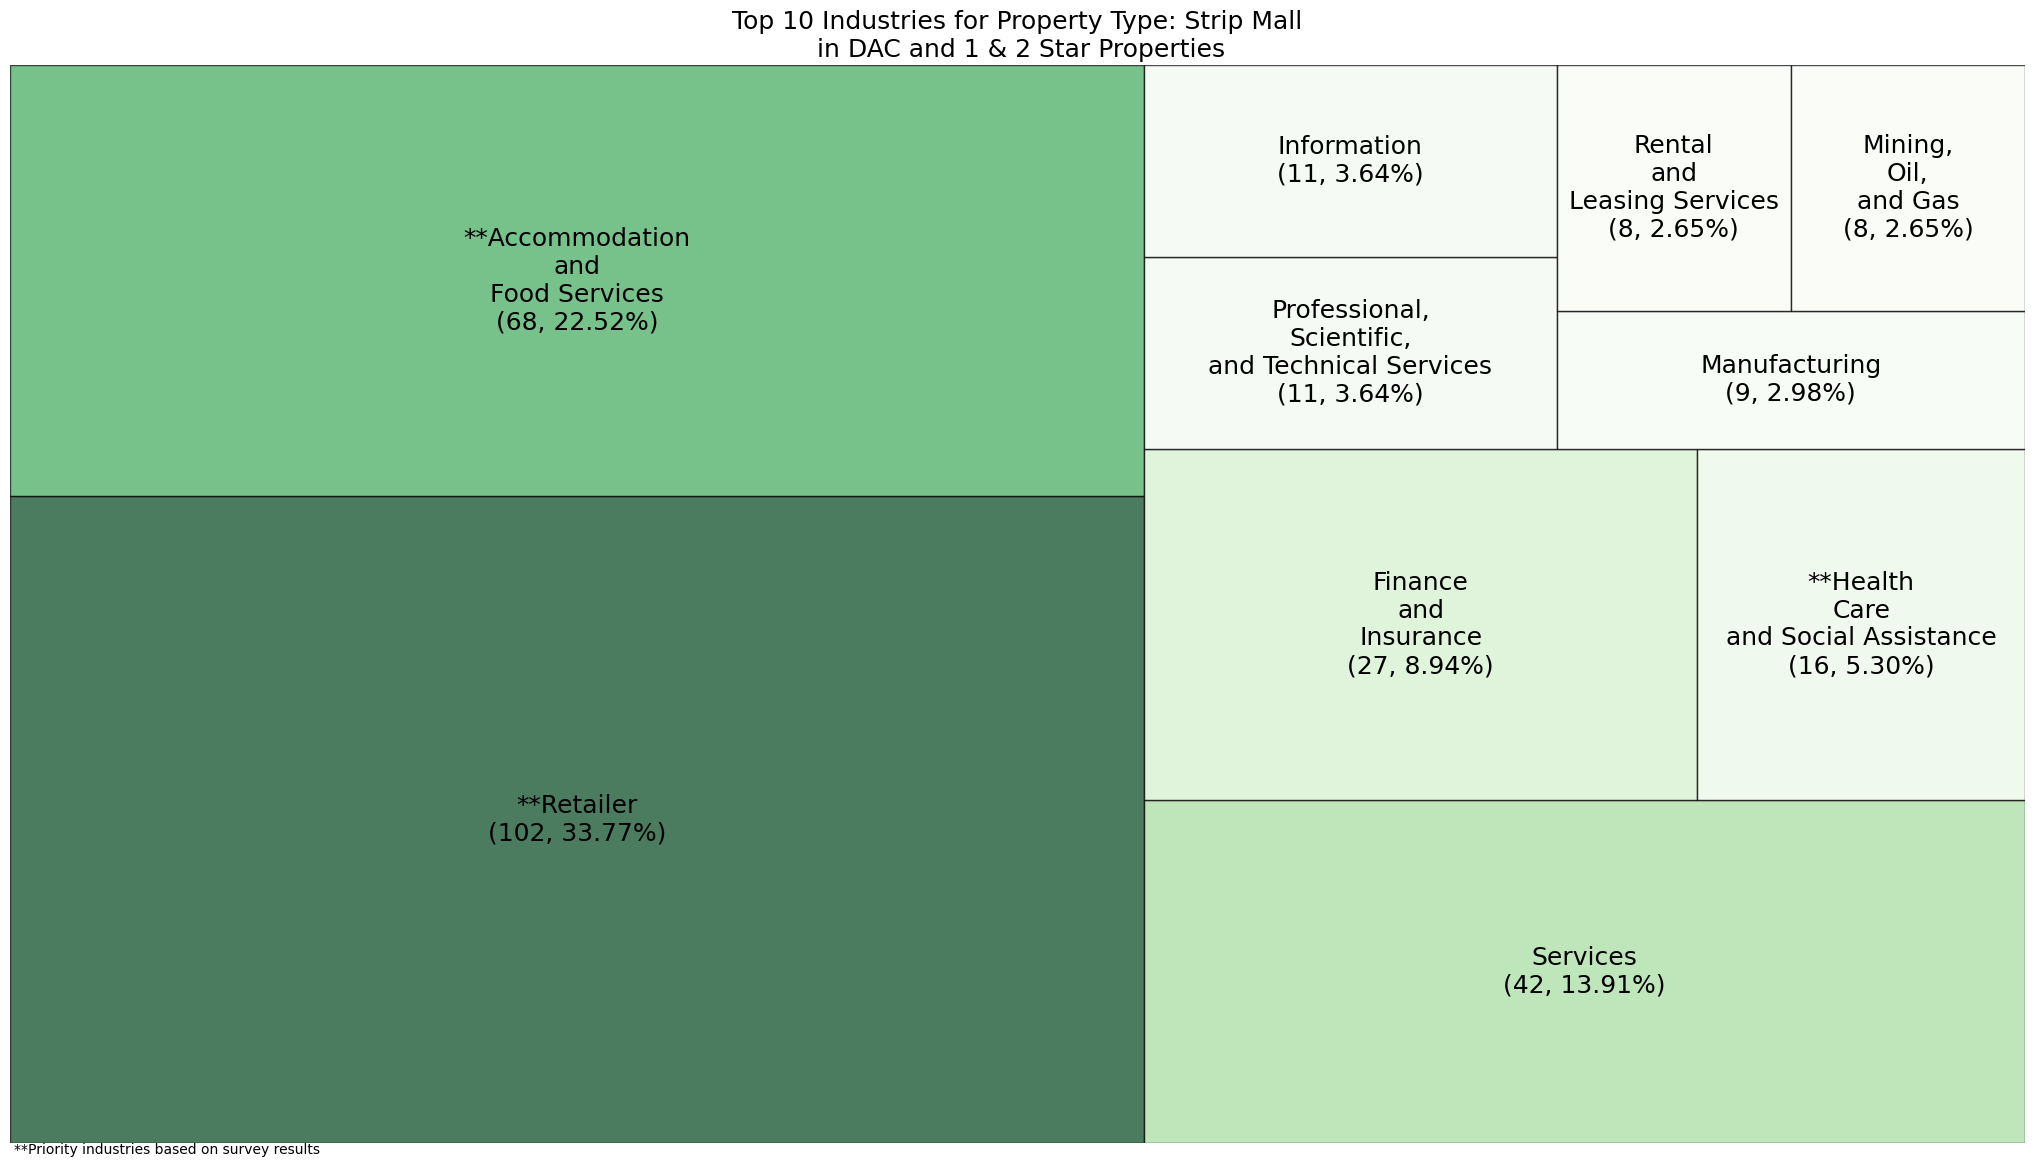

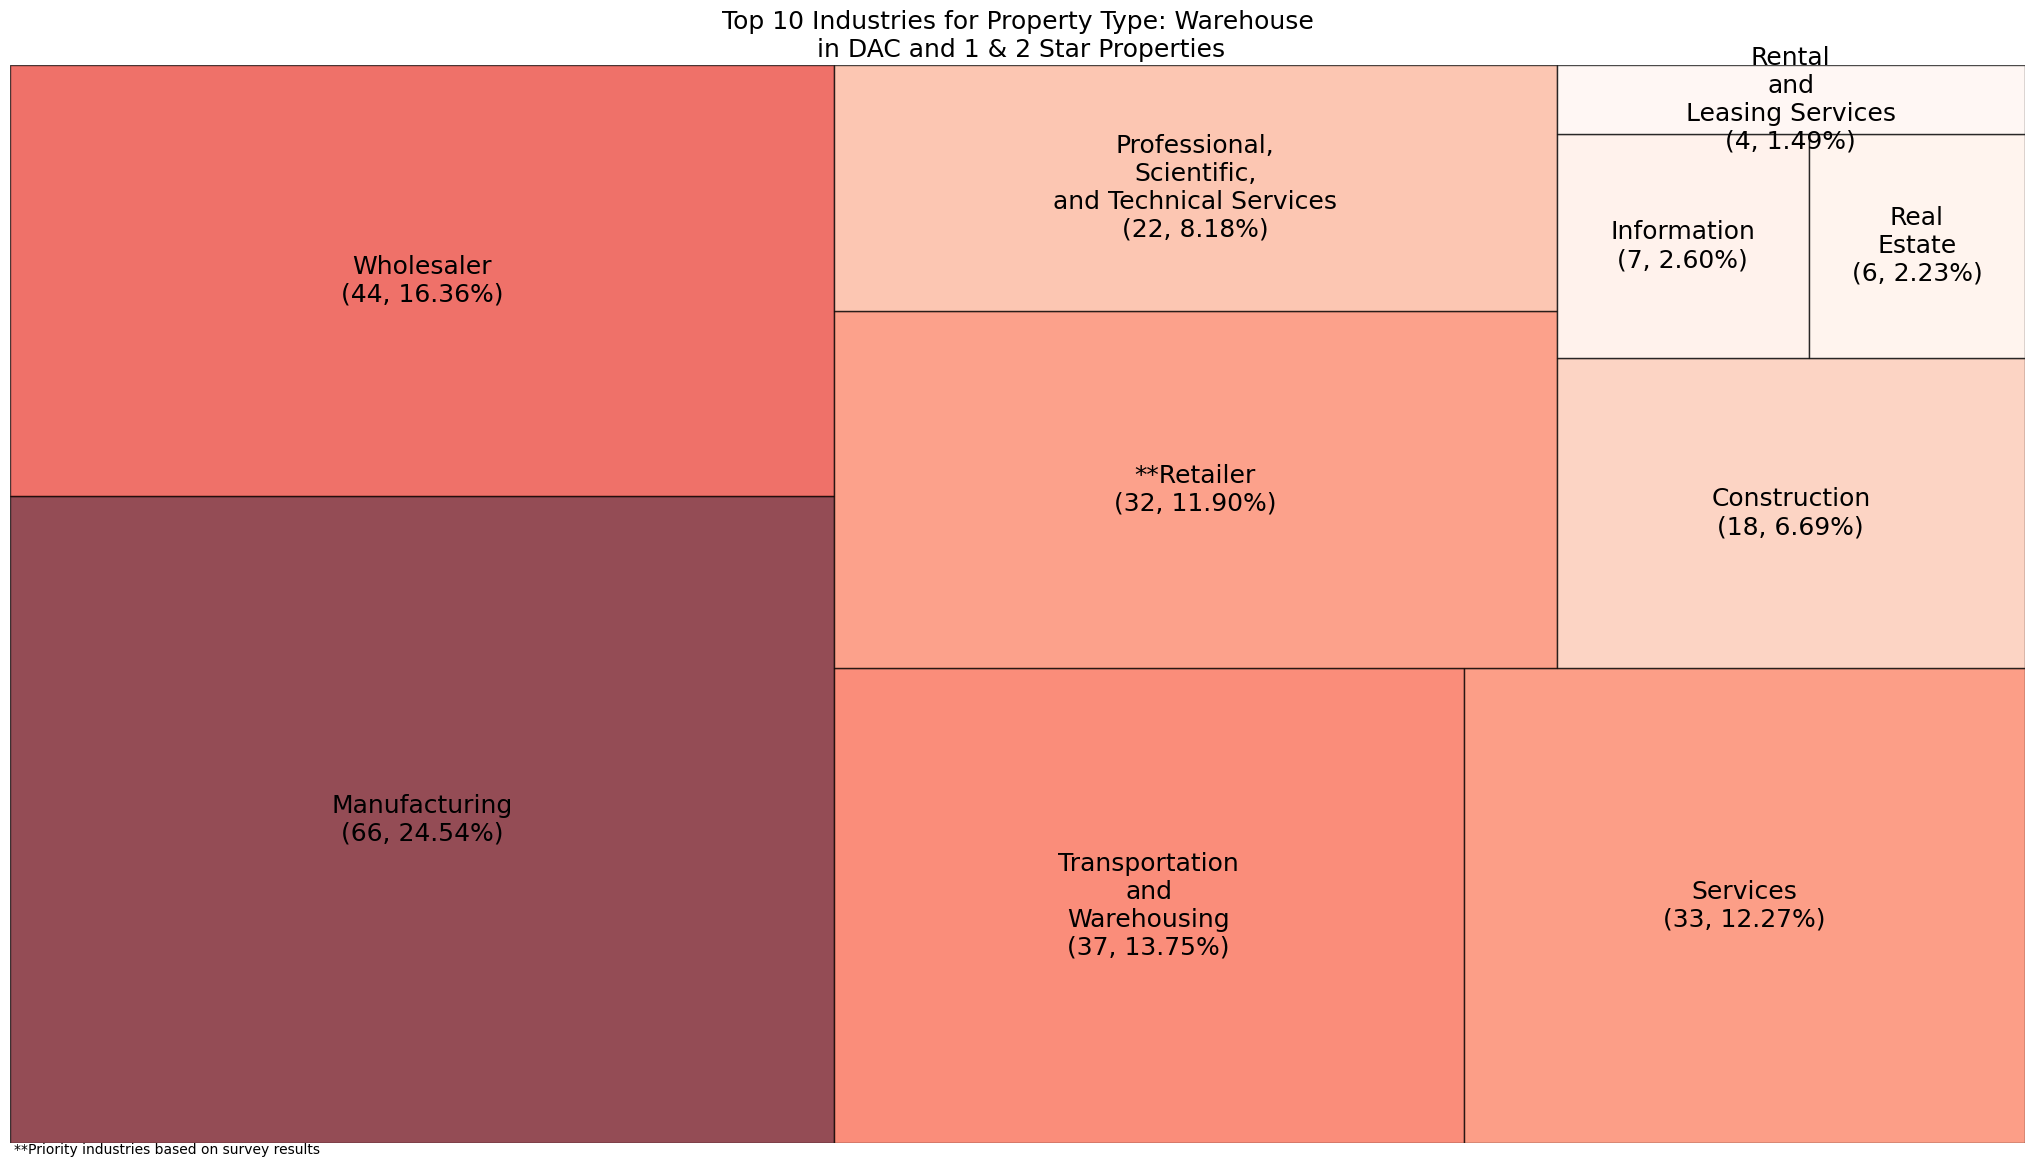

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Assuming you have 'industry_count_by_prop_type' as your DataFrame
# If not, replace it with your actual grouped data
property_types_to_remove = ['Hospital', 'Multi-Family', 'Large Hotel', 'Outpatient']
filtered_tenant_df = disadvantaged_tenant_df[~disadvantaged_tenant_df['ComStock Property Type'].isin(property_types_to_remove)]
filtered_tenant_df = filtered_tenant_df[~filtered_tenant_df['Star Rating'].isin([1,2])]
industry_count_by_prop_type = filtered_tenant_df.groupby(['ComStock Property Type', 'Industry']).size().unstack().fillna(0)

# Define colormaps for each chart
colormap_dict = {'Blues': plt.cm.Blues, 'Greens': plt.cm.Greens, 'Reds': plt.cm.Reds}

# Iterate through property types and plot treemaps with different colormaps
for i, property_type in enumerate(industry_count_by_prop_type.index):
    # Get data for the specific property type
    industry_count_subset = industry_count_by_prop_type.loc[property_type]

    # Skip if all values are zero
    if industry_count_subset.sum() == 0:
        continue

    # Get the top 10 industries
    top_10_industries = industry_count_subset.sort_values(ascending=False).head(10)

    # Convert the data to a DataFrame
    industry_count_long = pd.DataFrame({'Industry': top_10_industries.index, 'Count': top_10_industries.values})
    
    # Create a mapping dictionary for industry name abbreviations
    industry_abbreviations = {
        'Mining, Quarrying, and Oil and Gas Extraction': 'Mining, Oil, and Gas',
        'Arts, Entertainment, and Recreation': 'Arts/Entertainment and Recreation',
        # Add more mappings as needed
    }
   # Specify the labels you want to bold
    bold_labels = {'Accommodation and Food Services':'**Accommodation and Food Services',
                   'Retailer':'**Retailer',
                   'Health Care and Social Assistance':'**Health Care and Social Assistance',
                    'Arts/Entertainment and Recreation':'**Arts/Entertainment and Recreation'}
    # Replace industry names with abbreviations and appropriate priortized status
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(industry_abbreviations)
    industry_count_long['Industry'] = industry_count_long['Industry'].replace(bold_labels)
    
    # Insert <br> in the industry labels
    industry_count_long['Industry'] = industry_count_long['Industry'].str.replace(' ', '\n',2)

    # Calculate percentage
    total_count = industry_count_long['Count'].sum()
    industry_count_long['Percentage'] = (industry_count_long['Count'] / total_count) * 100

    # Choose the corresponding colormap for each chart
    current_cmap = list(colormap_dict.values())[i]

    # Set up normalization
    norm = plt.Normalize(vmin=industry_count_long['Count'].min(), vmax=industry_count_long['Count'].max())

    # Set colors using the colormap with normalization
    colors = [current_cmap(norm(value)) for value in industry_count_long['Count']]

    # Plotting for each property type with different colormaps
    plt.figure(figsize=(26, 14))
    squarify.plot(sizes=industry_count_long['Count'], 
                  label=industry_count_long.apply(lambda row: f"{row['Industry']}\n({int(row['Count'])}, {row['Percentage']:.2f}%)", axis=1),
                  text_kwargs={'fontsize': 18},  # Adjust the fontsize value as needed                  
                  alpha=0.7,
                  edgecolor="black", linewidth=1,
                  color=colors)
    
    # Add note to the plot below the chart in the center
    plt.text(.2, -0.01, '**Priority industries based on survey results', ha='left', va='top', fontsize=10, color='black')

    plt.title(f'Top 10 Industries for Property Type: {property_type}\n in DAC and 1 & 2 Star Properties', fontsize = 18)
    plt.axis('off')  # Turn off axis labels

    plt.show()


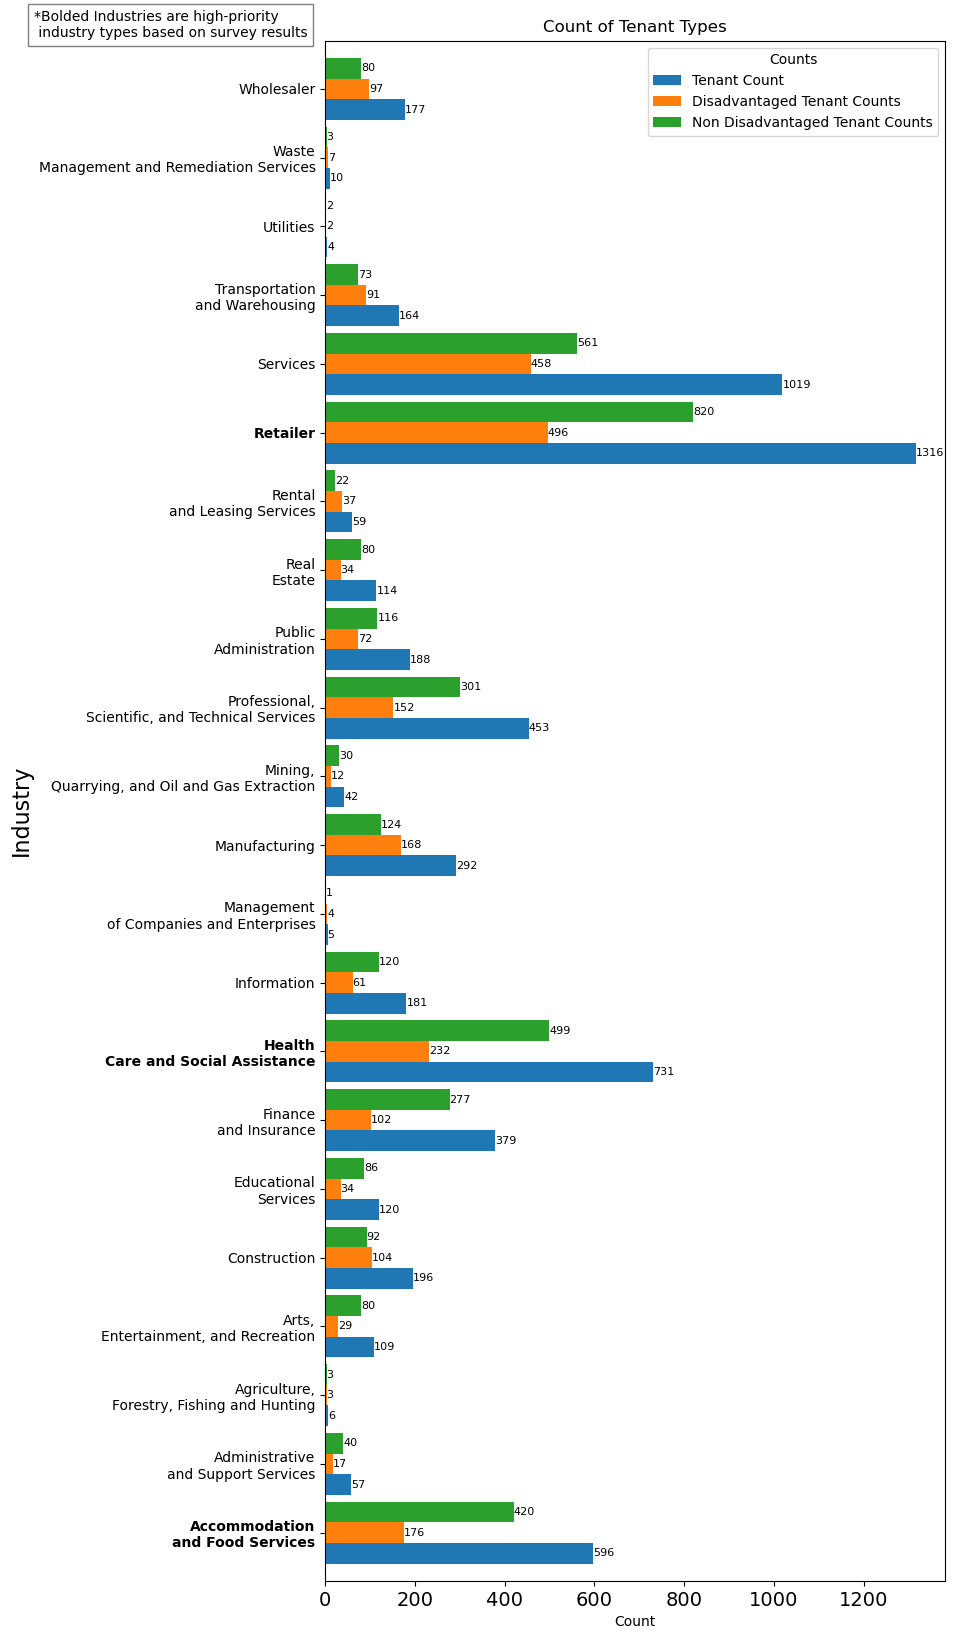

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have another series named other_counts
disadvantaged_industry_counts = disadvantaged_tenant_df['Industry'].value_counts()
non_disadvantaged_industry_counts = non_disadvantaged_tenant_df['Industry'].value_counts()
# You can replace this with your actual data
industry_counts = tenant_df['Industry'].value_counts()

# Combine the two series into a single DataFrame
combined_df = pd.DataFrame({'Tenant Counts': industry_counts, 'Disadvantaged Tenant Counts': disadvantaged_industry_counts,'Non Disadvantaged Tenant Counts': non_disadvantaged_industry_counts }).fillna(0)

# Specify the labels to be bolded
bold_labels = ["Accommodation and Food Services", "Retailer", "Health Care and Social Assistance", "Arts/Entertainment and Recreation"]  # Replace with your actual labels

# Plotting the grouped bar chart with flipped axes
fig, ax = plt.subplots(figsize=(8, 20))  # Flipping the dimensions

# Plot the bars
bars = combined_df.plot(kind='barh', ax=ax, width=0.9, position=0.5)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Industry', {'size': 16})
plt.title('Count of Tenant Types')
# Adding legend
plt.legend(title='Counts', labels=['Tenant Count', 'Disadvantaged Tenant Counts', 'Non Disadvantaged Tenant Counts'])

# Stacking y-axis labels
stacked_labels = [label[:label.find(' ')] + '\n' + label[label.find(' ')+1:] if ' ' in label else label for label in combined_df.index]
ax.set_yticks(range(len(combined_df)))
ax.set_yticklabels(stacked_labels, fontsize=10)

# Adding counts to the right of each bar for 'Tenant Counts'
for i, (bar, count, label) in enumerate(zip(bars.patches[:len(combined_df)], combined_df['Tenant Counts'], combined_df.index)):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)
    
    # Bold y-axis label if it's in the list of labels to be bolded
    if label in bold_labels:
        ax.get_yticklabels()[i].set_weight('bold')

# Adding counts to the right of each bar for 'Disadvantaged Tenant Counts'
for bar, count in zip(bars.patches[len(combined_df):2*len(combined_df)], combined_df['Disadvantaged Tenant Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Adding counts to the right of each bar for 'Non Disadvantaged Tenant Counts'
for bar, count in zip(bars.patches[2*len(combined_df):], combined_df['Non Disadvantaged Tenant Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Add a note
note_text = "*Bolded Industries are high-priority\n industry types based on survey results"
plt.text(-.47, 1.02, note_text, ha='left', va='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


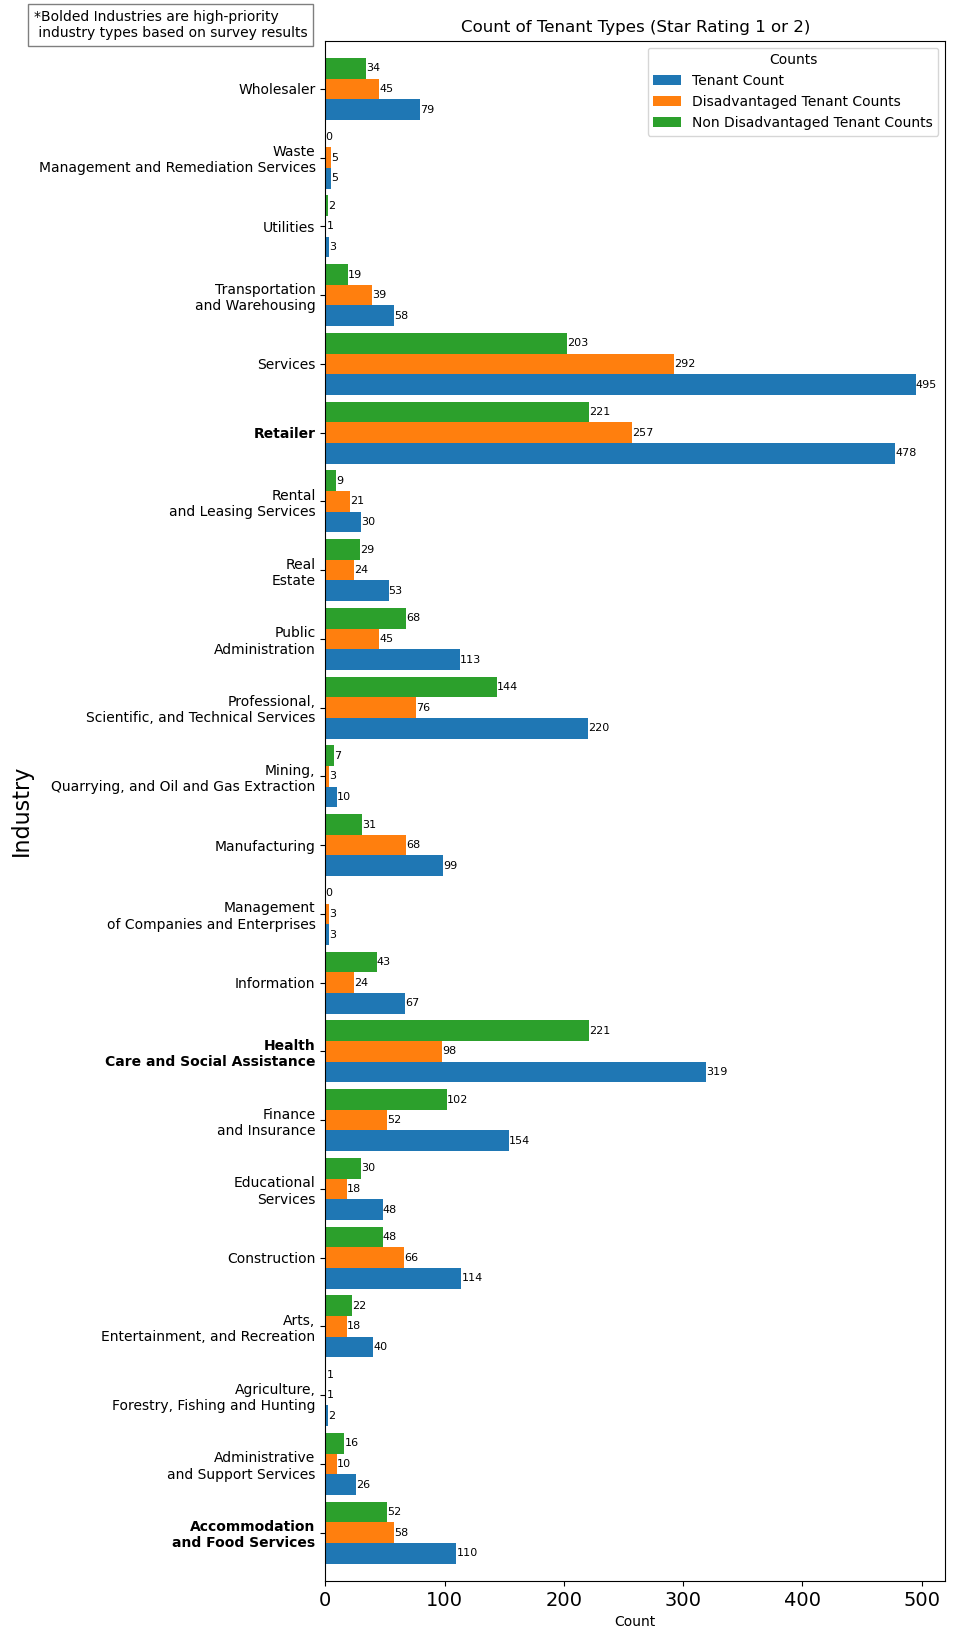

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have another series named other_counts
disadvantaged_industry_counts = disadvantaged_tenant_df[disadvantaged_tenant_df['Star Rating'].isin([1, 2])]['Industry'].value_counts()
non_disadvantaged_industry_counts = non_disadvantaged_tenant_df[non_disadvantaged_tenant_df['Star Rating'].isin([1, 2])]['Industry'].value_counts()
# You can replace this with your actual data
industry_counts = tenant_df[tenant_df['Star Rating'].isin([1, 2])]['Industry'].value_counts()

# Combine the two series into a single DataFrame
combined_df = pd.DataFrame({'Tenant Counts': industry_counts, 'Disadvantaged Tenant Counts': disadvantaged_industry_counts, 'Non Disadvantaged Tenant Counts': non_disadvantaged_industry_counts }).fillna(0)

# Specify the labels to be bolded
bold_labels = ["Accommodation and Food Services", "Retailer", "Health Care and Social Assistance", "Arts/Entertainment and Recreation"]  # Replace with your actual labels

# Plotting the grouped bar chart with flipped axes
fig, ax = plt.subplots(figsize=(8, 20))  # Flipping the dimensions

# Plot the bars
bars = combined_df.plot(kind='barh', ax=ax, width=0.9, position=0.5)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Industry', {'size': 16})
plt.title('Count of Tenant Types (Star Rating 1 or 2)')
# Adding legend
plt.legend(title='Counts', labels=['Tenant Count', 'Disadvantaged Tenant Counts', 'Non Disadvantaged Tenant Counts'])

# Stacking y-axis labels
stacked_labels = [label[:label.find(' ')] + '\n' + label[label.find(' ')+1:] if ' ' in label else label for label in combined_df.index]
ax.set_yticks(range(len(combined_df)))
ax.set_yticklabels(stacked_labels, fontsize=10)

# Adding counts to the right of each bar for 'Tenant Counts'
for i, (bar, count, label) in enumerate(zip(bars.patches[:len(combined_df)], combined_df['Tenant Counts'], combined_df.index)):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)
    
    # Bold y-axis label if it's in the list of labels to be bolded
    if label in bold_labels:
        ax.get_yticklabels()[i].set_weight('bold')

# Adding counts to the right of each bar for 'Disadvantaged Tenant Counts'
for bar, count in zip(bars.patches[len(combined_df):2*len(combined_df)], combined_df['Disadvantaged Tenant Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Adding counts to the right of each bar for 'Non Disadvantaged Tenant Counts'
for bar, count in zip(bars.patches[2*len(combined_df):], combined_df['Non Disadvantaged Tenant Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Add a note
note_text = "*Bolded Industries are high-priority\n industry types based on survey results"
plt.text(-.47, 1.02, note_text, ha='left', va='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


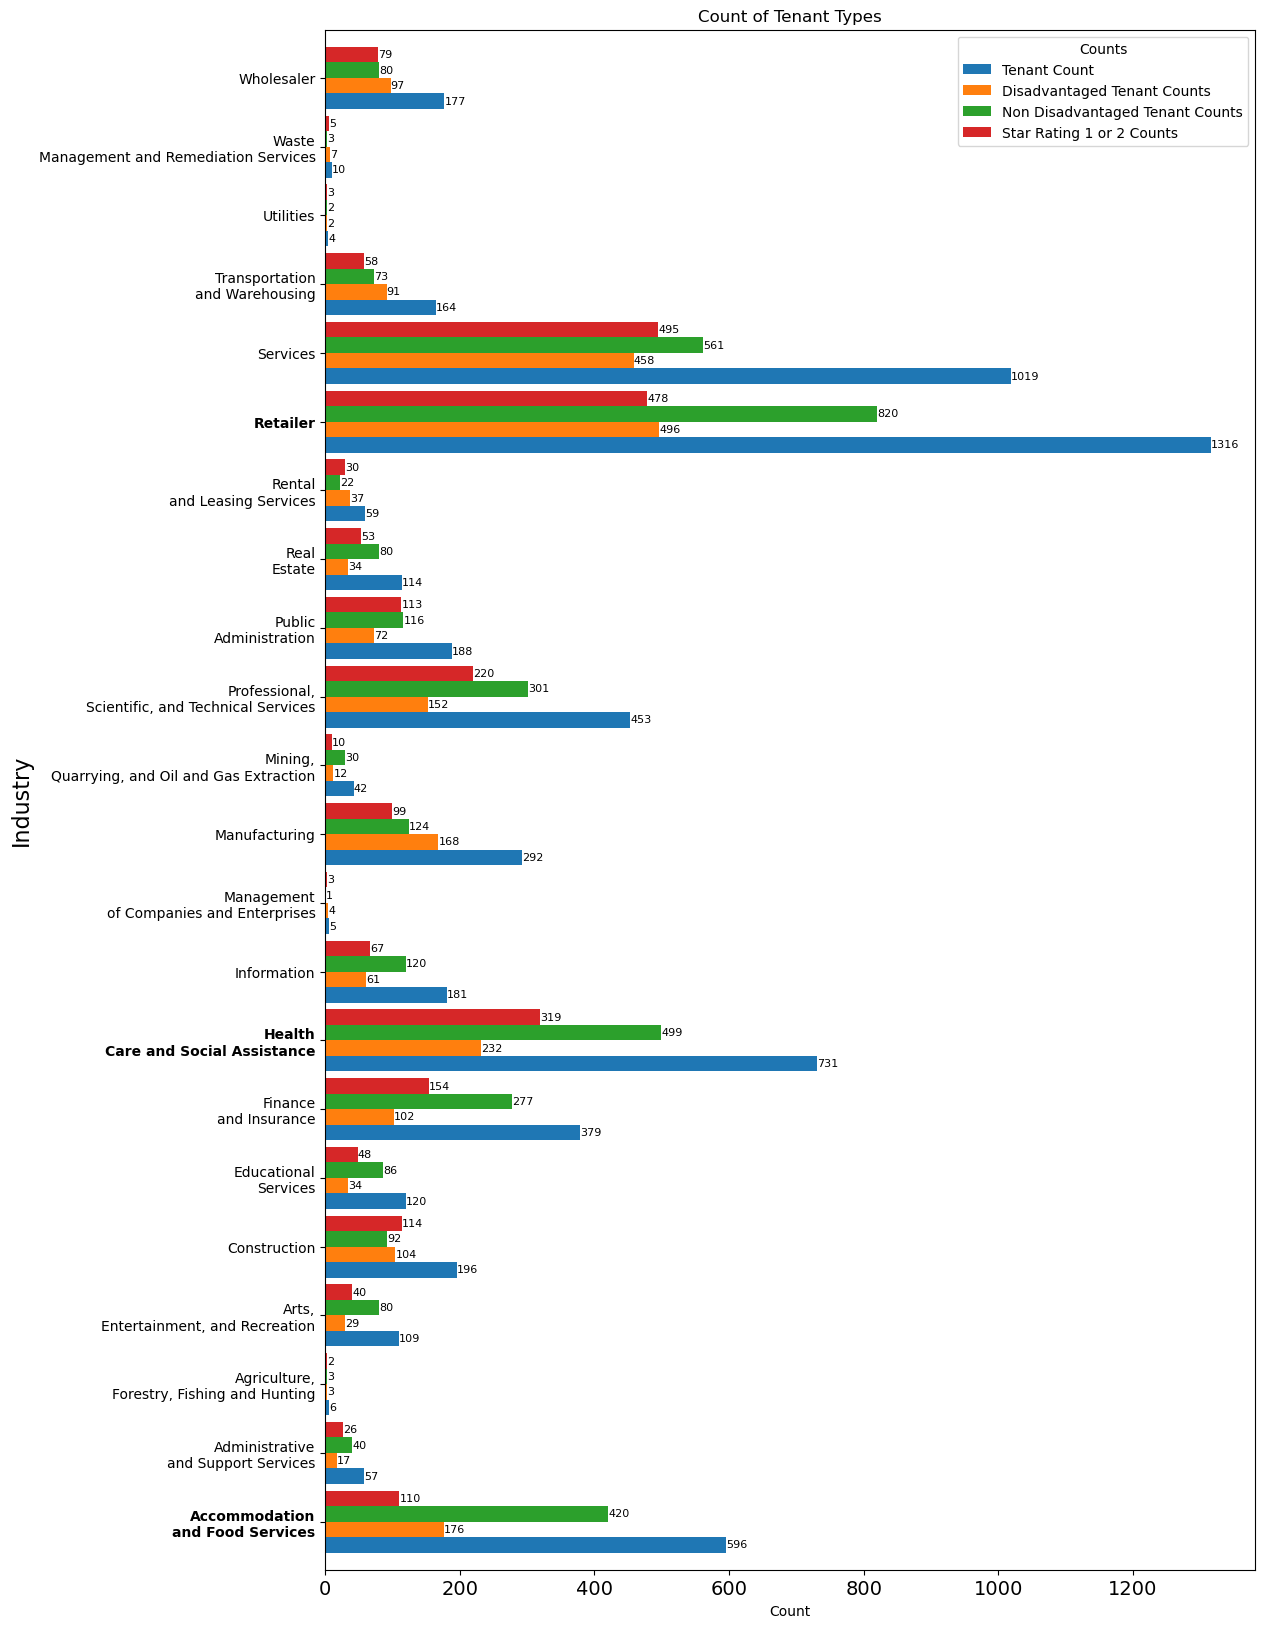

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have another series named other_counts
disadvantaged_industry_counts = disadvantaged_tenant_df['Industry'].value_counts()
non_disadvantaged_industry_counts = non_disadvantaged_tenant_df['Industry'].value_counts()

# Filter data for properties with "Star Rating" of 1 or 2
star_rating_1_2_counts = tenant_df[tenant_df['Star Rating'].isin([1, 2])]['Industry'].value_counts()

# Combine the series into a single DataFrame
combined_df = pd.DataFrame({'Tenant Counts': tenant_df['Industry'].value_counts(),
                            'Disadvantaged Tenant Counts': disadvantaged_industry_counts,
                            'Non Disadvantaged Tenant Counts': non_disadvantaged_industry_counts,
                            'Star Rating 1 or 2 Counts': star_rating_1_2_counts}).fillna(0)

# Specify the labels to be bolded
bold_labels = ["Accommodation and Food Services", "Retailer", "Health Care and Social Assistance", "Arts/Entertainment and Recreation"]  # Replace with your actual labels

# Plotting the grouped bar chart with flipped axes
fig, ax = plt.subplots(figsize=(12, 20))  # Flipping the dimensions

# Plot the bars
bars = combined_df.plot(kind='barh', ax=ax, width=0.9, position=0.5)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Industry', {'size': 16})
plt.title('Count of Tenant Types')
# Adding legend
plt.legend(title='Counts', labels=['Tenant Count', 'Disadvantaged Tenant Counts', 'Non Disadvantaged Tenant Counts', 'Star Rating 1 or 2 Counts'])

# Stacking y-axis labels
stacked_labels = [label[:label.find(' ')] + '\n' + label[label.find(' ')+1:] if ' ' in label else label for label in combined_df.index]
ax.set_yticks(range(len(combined_df)))
ax.set_yticklabels(stacked_labels, fontsize=10)

# Adding counts to the right of each bar for 'Tenant Counts'
for i, (bar, count, label) in enumerate(zip(bars.patches[:len(combined_df)], combined_df['Tenant Counts'], combined_df.index)):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)
    
    # Bold y-axis label if it's in the list of labels to be bolded
    if label in bold_labels:
        ax.get_yticklabels()[i].set_weight('bold')

# Adding counts to the right of each bar for 'Disadvantaged Tenant Counts'
for bar, count in zip(bars.patches[len(combined_df):2*len(combined_df)], combined_df['Disadvantaged Tenant Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Adding counts to the right of each bar for 'Non Disadvantaged Tenant Counts'
for bar, count in zip(bars.patches[2*len(combined_df):3*len(combined_df)], combined_df['Non Disadvantaged Tenant Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Adding counts to the right of each bar for 'Star Rating 1 or 2 Counts'
for bar, count in zip(bars.patches[3*len(combined_df):], combined_df['Star Rating 1 or 2 Counts']):
    xval = bar.get_width()
    ax.text(xval + 0.1, bar.get_y() + bar.get_height() / 2, int(count), ha='left', va='center', fontsize=8)

# Add a note


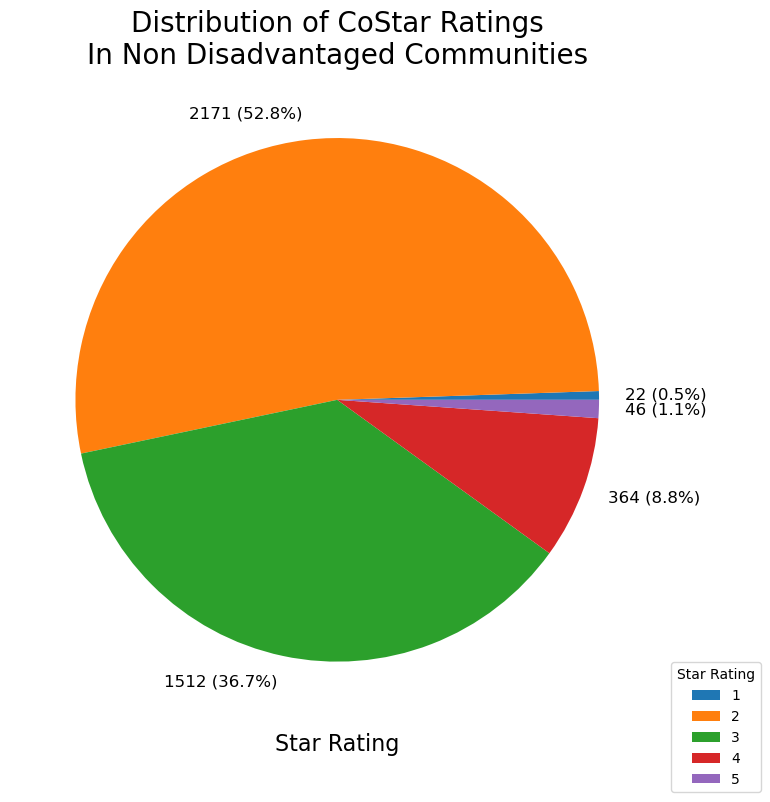

In [ ]:
# Calculate the count of each star rating
star_rating_count_non_dac = non_disadvantaged_building_df['Star Rating'].value_counts().sort_index()

# Calculate the percentage for each wedge
percentages = star_rating_count_non_dac / star_rating_count_non_dac.sum() * 100

# Create a pie chart
plt.figure(figsize=(11, 8.5))
plt.rc('xtick', labelsize=12)

# Creating a pie chart and getting the wedge patches
wedges, texts, autotexts = plt.pie(percentages, labels=None, autopct='', startangle=0)

# Adding labels with the count and percentage next to each wedge
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    count = star_rating_count_non_dac.iloc[i]
    percentage = percentages.iloc[i]
    text.set_text(f'{count} ({percentage:.1f}%)')
    autotext.set_text('')  # Clear the default percentage labels

# Add a legend with star rating labels
plt.legend(star_rating_count_non_dac.index, title='Star Rating', loc='center left', bbox_to_anchor=(1, 0))

plt.xlabel('Star Rating', {'size': 16})
plt.title('Distribution of CoStar Ratings\nIn Non Disadvantaged Communities', {'size': 20})

plt.show()


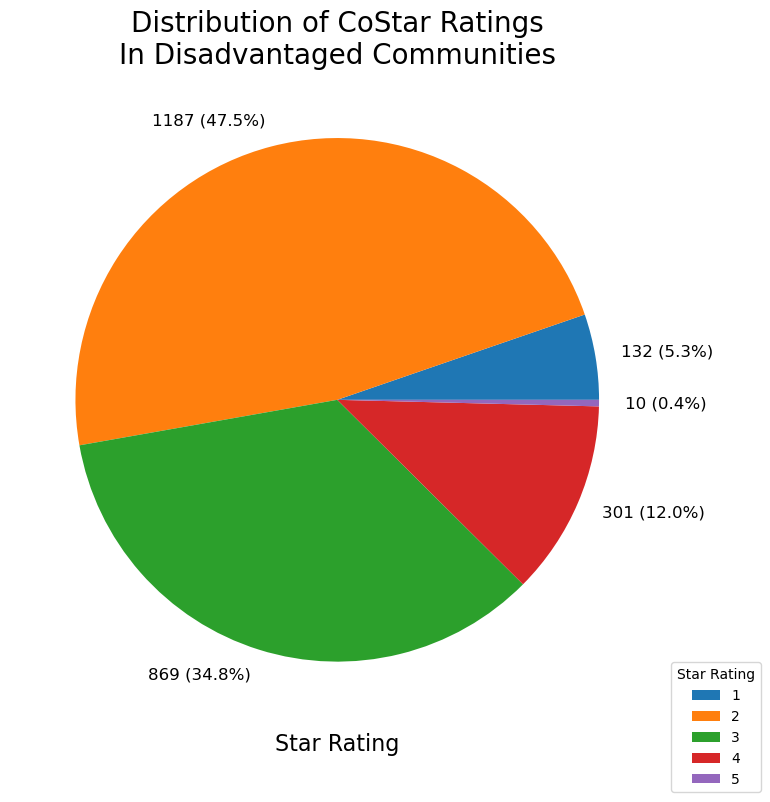

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each star rating in disadvantaged buildings
star_rating_count_dac = disadvantaged_building_df['Star Rating'].value_counts().sort_index()

# Calculate the percentage for each wedge
percentages = star_rating_count_dac / star_rating_count_dac.sum() * 100

# Create a pie chart
plt.figure(figsize=(11, 8.5))
plt.rc('xtick', labelsize=12)

# Creating a pie chart and getting the wedge patches
wedges, texts, autotexts = plt.pie(percentages, labels=None, autopct='', startangle=0)

# Adding labels with the count and percentage next to each wedge
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    count = star_rating_count_dac.iloc[i]
    percentage = percentages.iloc[i]
    text.set_text(f'{count} ({percentage:.1f}%)')
    autotext.set_text('')  # Clear the default percentage labels

# Add a legend with star rating labels
plt.legend(star_rating_count_dac.index, title='Star Rating', loc='center left', bbox_to_anchor=(1, 0))

plt.xlabel('Star Rating', {'size': 16})
plt.title('Distribution of CoStar Ratings\nIn Disadvantaged Communities', {'size': 20})

plt.show()


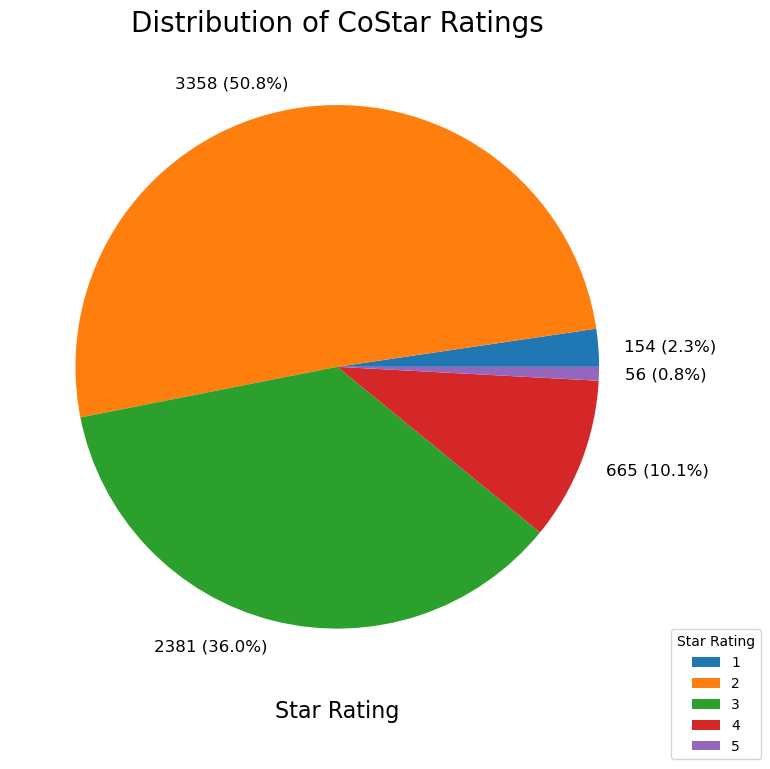

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each star rating in disadvantaged buildings
star_rating_count = building_df['Star Rating'].value_counts().sort_index()

# Calculate the percentage for each wedge
percentages = star_rating_count / star_rating_count.sum() * 100

# Create a pie chart
plt.figure(figsize=(11, 8.5))
plt.rc('xtick', labelsize=12)

# Creating a pie chart and getting the wedge patches
wedges, texts, autotexts = plt.pie(percentages, labels=None, autopct='', startangle=0)

# Adding labels with the count and percentage next to each wedge
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    count = star_rating_count.iloc[i]
    percentage = percentages.iloc[i]
    text.set_text(f'{count} ({percentage:.1f}%)')
    autotext.set_text('')  # Clear the default percentage labels

# Add a legend with star rating labels
plt.legend(star_rating_count.index, title='Star Rating', loc='center left', bbox_to_anchor=(1, 0))

plt.xlabel('Star Rating', {'size': 16})
plt.title('Distribution of CoStar Ratings', {'size': 20})

plt.show()

In [ ]:
# Step 1: Combine the series into a DataFrame
combined_df = pd.DataFrame({
    'Star Ratings in Aurora': star_rating_count,
    'Star Ratings in DAC': star_rating_count_dac,
    'Star Ratings in Non-DAC': star_rating_count_non_dac,
    }).fillna(0)

# Step 2: Create a bar chart using Plotly
fig = go.Figure()

for column in combined_df.columns:
    fig.add_trace(go.Bar(
        x=combined_df.index,
        y=combined_df[column],
        text=combined_df[column],  # Add the values to the bars
        textposition='outside',
        name=column
    ))

# Update layout
fig.update_layout(
    barmode='group',
    title_x=0.5,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Count'),
    legend=dict(
        font=dict(size=14),
        x=1.0,
        y=1.0,
        xanchor='right',
        yanchor='top'
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()

1.0004537891393133


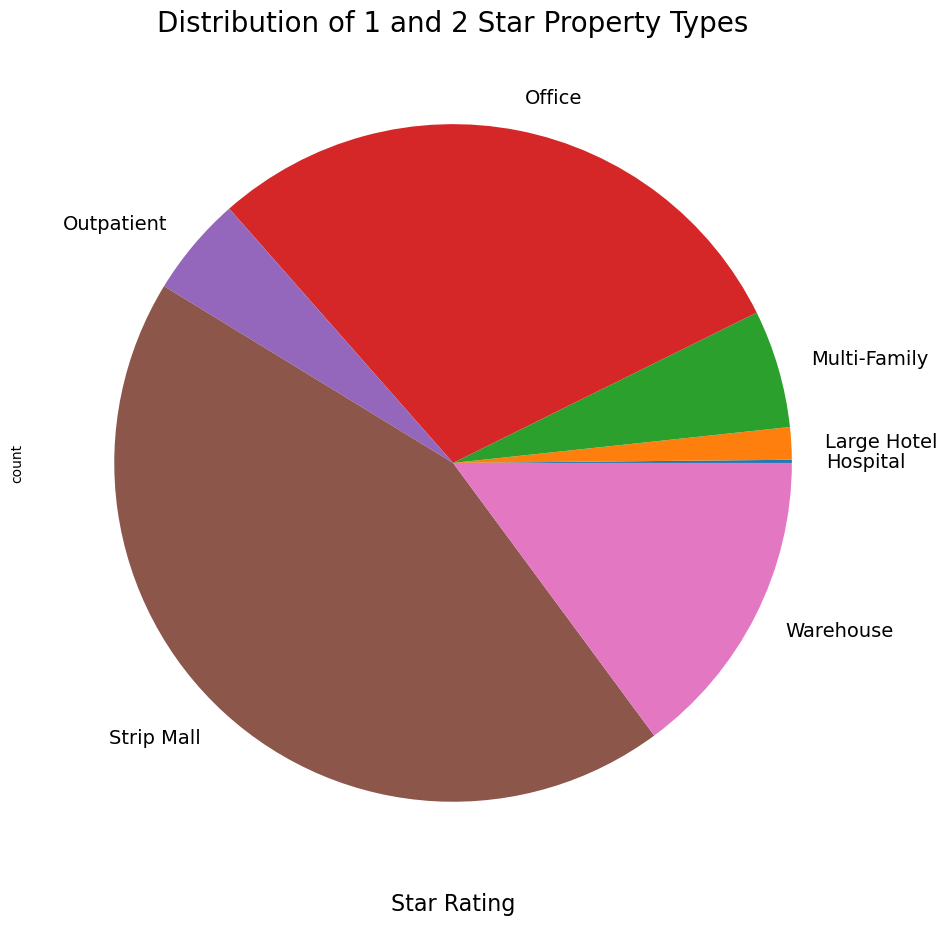

In [ ]:
property_type_1_2_star_count = building_1_2_star_df['ComStock Property Type'].value_counts().sort_index()
print(star_rating_count.sum()/building_df['Address'].value_counts().sum())


# Step 4: Create a bar chart
plt.figure(figsize=(17, 11))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 14) 
property_type_1_2_star_count.plot(kind='pie', rot=0,)  # Create a bar chart with no rotation of labels

plt.xlabel('Star Rating',
           {'size':16})
plt.title('Distribution of 1 and 2 Star Property Types',
          {'size':20})

plt.show()

1.0004537891393133


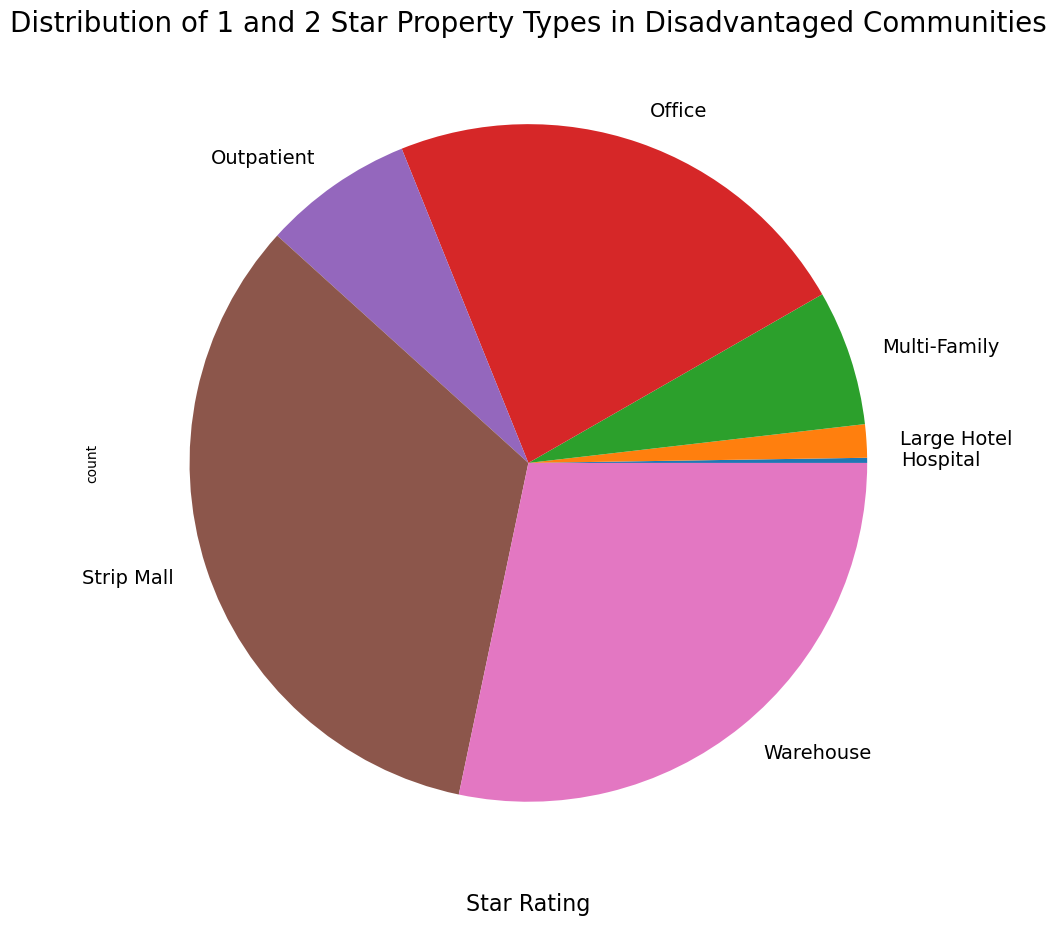

In [ ]:
property_type_1_2_star_count = disadvantaged_1_2_star_building_df['ComStock Property Type'].value_counts().sort_index()
print(star_rating_count.sum()/building_df['Address'].value_counts().sum())


# Step 4: Create a bar chart
plt.figure(figsize=(17, 11))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 14) 
property_type_1_2_star_count.plot(kind='pie', rot=0,)  # Create a bar chart with no rotation of labels

plt.xlabel('Star Rating',
           {'size':16})
plt.title('Distribution of 1 and 2 Star Property Types in Disadvantaged Communities',
          {'size':20})

plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming building_df is your DataFrame containing the data

# Step 1: Group by 'ComStock Vintage' and 'Star Rating' and count the occurrences
vintage_star_count = building_df.groupby(['ComStock Vintage', 'Star Rating']).size().unstack().fillna(0)

# Reorder the index to have "Before 1946" first
vintage_star_count = vintage_star_count.reindex(['Before 1946'] + list(vintage_star_count.index.difference(['Before 1946'])))

# Step 2: Create a bar chart using Plotly
fig = go.Figure()

for star_rating in sorted(building_df['Star Rating'].unique()):
    fig.add_trace(go.Bar(
        x=vintage_star_count.index,
        y=vintage_star_count[star_rating],
        name=f'{star_rating} Stars'
    ))

# Update layout
fig.update_layout(
    barmode='group',
    title='Count of Star Ratings by Vintage',
    title_x=0.5,
    xaxis=dict(title='Vintage'),
    yaxis=dict(title='Count'),
    legend=dict(
        title='Star Rating',
        font=dict(size=14),
        x=1.0,
        y=1.0,
        xanchor='right',
        yanchor='top'
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()


In [ ]:

import pandas as pd
import plotly.graph_objects as go

# Assuming building_df is your DataFrame containing the data
# Function to reindex and fill missing values with zeros
def fill_missing_values(df):
    index_levels = df.index.levels
    full_index = pd.MultiIndex.from_product(index_levels, names=df.index.names)
    return df.reindex(full_index, fill_value=0)

# Define the order of 'ComStock Vintage' values
vintage_order = ['Before 1946','1946 to 1959', '1960 to 1969', '1970 to 1979', '1980 to 1989','1990 to 1999', '2000 to 2012', '2013 to 2018']  # Adjust this list according to your vintage types

# Convert 'ComStock Vintage' to a categorical data type with the specified order
non_disadvantaged_building_dropped_df['ComStock Vintage'] = pd.Categorical(non_disadvantaged_building_dropped_df['ComStock Vintage'], categories=vintage_order, ordered=True)
disadvantaged_building_dropped_df['ComStock Vintage'] = pd.Categorical(disadvantaged_building_dropped_df['ComStock Vintage'], categories=vintage_order, ordered=True)

# Step 1: Group by 'ComStock Vintage' and 'Star Rating' and count the occurrences
vintage_star_count_non_dac = fill_missing_values(non_disadvantaged_building_dropped_df.groupby(['ComStock Vintage', 'Star Rating']).size())
vintage_star_count_dac = fill_missing_values(disadvantaged_building_dropped_df.groupby(['ComStock Vintage', 'Star Rating']).size())


fig = go.Figure()


fig.add_bar(y = [vintage_star_count_dac.index.droplevel(level = 1),vintage_star_count_dac.index.droplevel(level = 0)] , 
            x = vintage_star_count_dac,
            name = 'Buildings in DAC',
            orientation = 'h',
            text = vintage_star_count_dac,
            textposition = 'outside',
            )

fig.add_bar(y = [vintage_star_count_non_dac.index.droplevel(level = 1),vintage_star_count_non_dac.index.droplevel(level = 0)] , 
            x = vintage_star_count_non_dac,
            text = vintage_star_count_non_dac,
            textposition = 'outside',
            name = 'Buildings in Non-DAC',
            orientation = 'h')

fig.update_layout(barmode = 'group',
                  xaxis = dict(title = 'Count'),
                  yaxis = dict(title = 'Vintage and Star Rating'),
                  title = 'Count of Building By Vintage And Star Rating In Aurora',
                  title_x = 0.5,
                      legend=dict(
                        x=1.0,
                        y=1.0,
                        xanchor='right',
                        yanchor='top'
                    ),
                    height = 1600,
                    width = 800)


C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_6684\2738344205.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_6684\2738344205.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



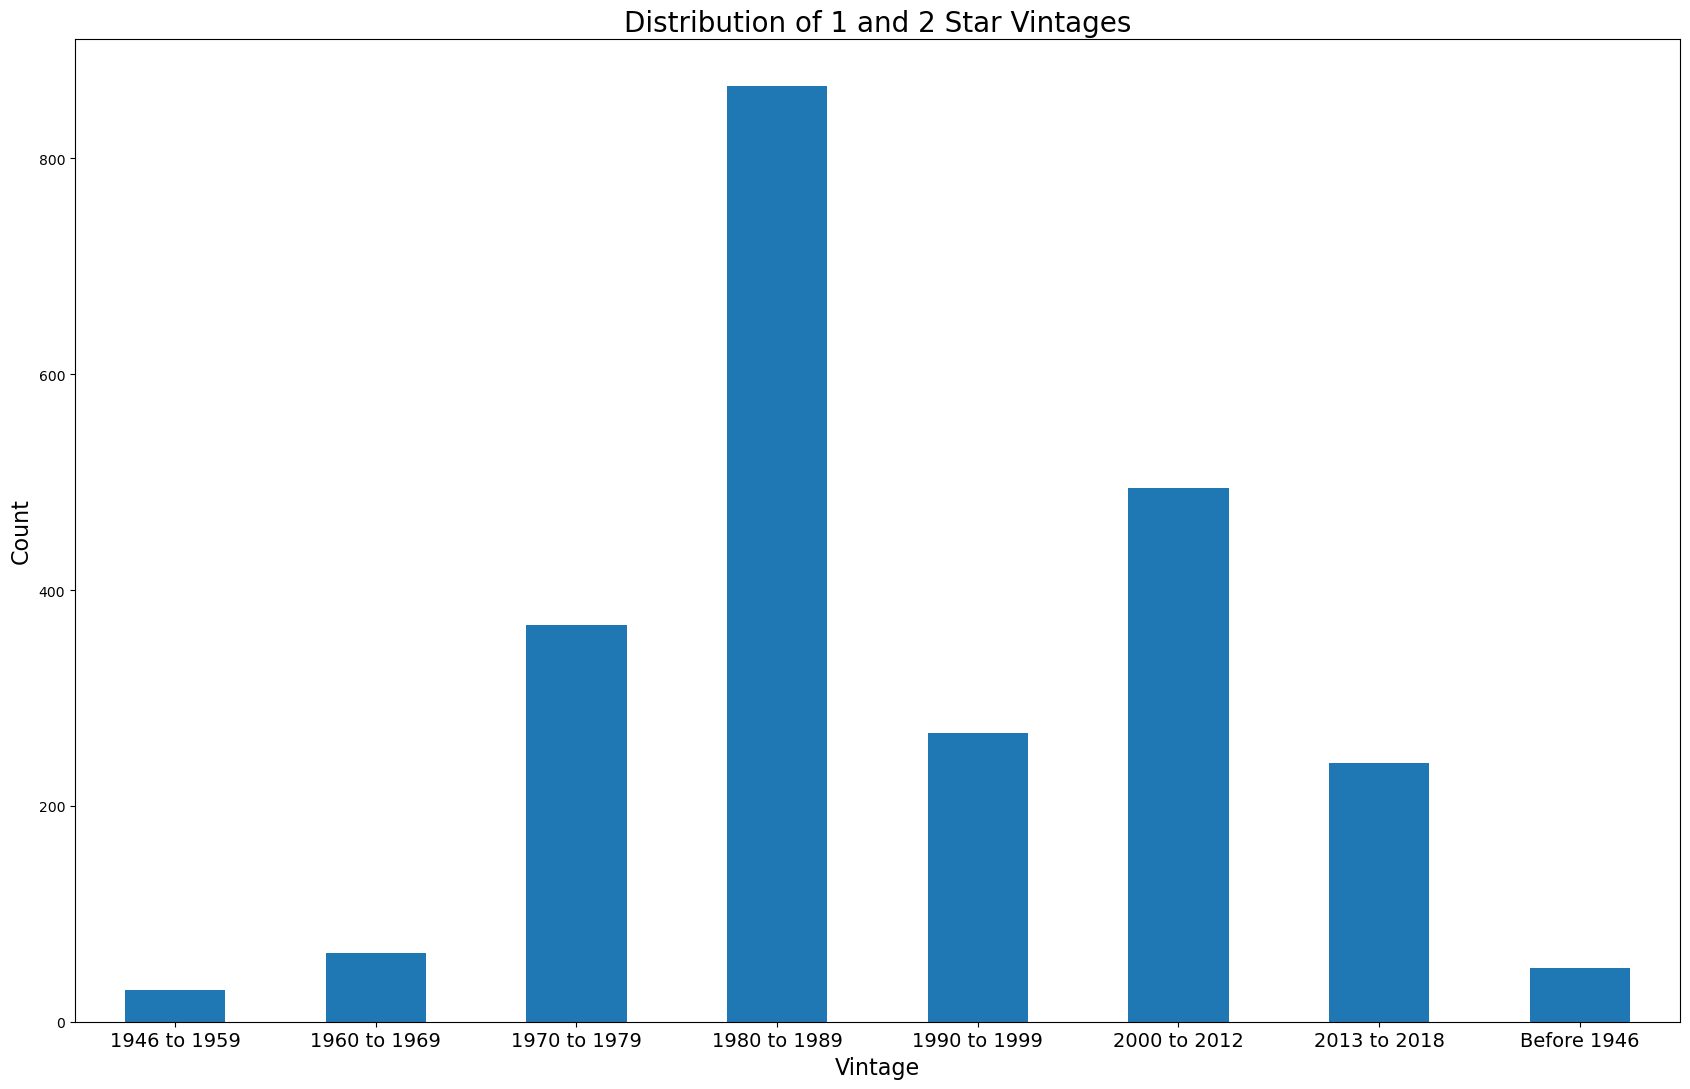

In [ ]:
vintage_1_2_star_count = building_1_2_star_df['ComStock Vintage'].value_counts().sort_index()


# Step 4: Create a bar chart
plt.figure(figsize=(17, 11))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 14) 
vintage_1_2_star_count.plot(kind='bar', rot=0,)  # Create a bar chart with no rotation of labels

plt.xlabel('Vintage',
           {'size':16})
plt.ylabel('Count',
           {'size':16})
plt.title('Distribution of 1 and 2 Star Vintages',
          {'size':20})

plt.tight_layout()
plt.show()

<Figure size 100x100 with 0 Axes>

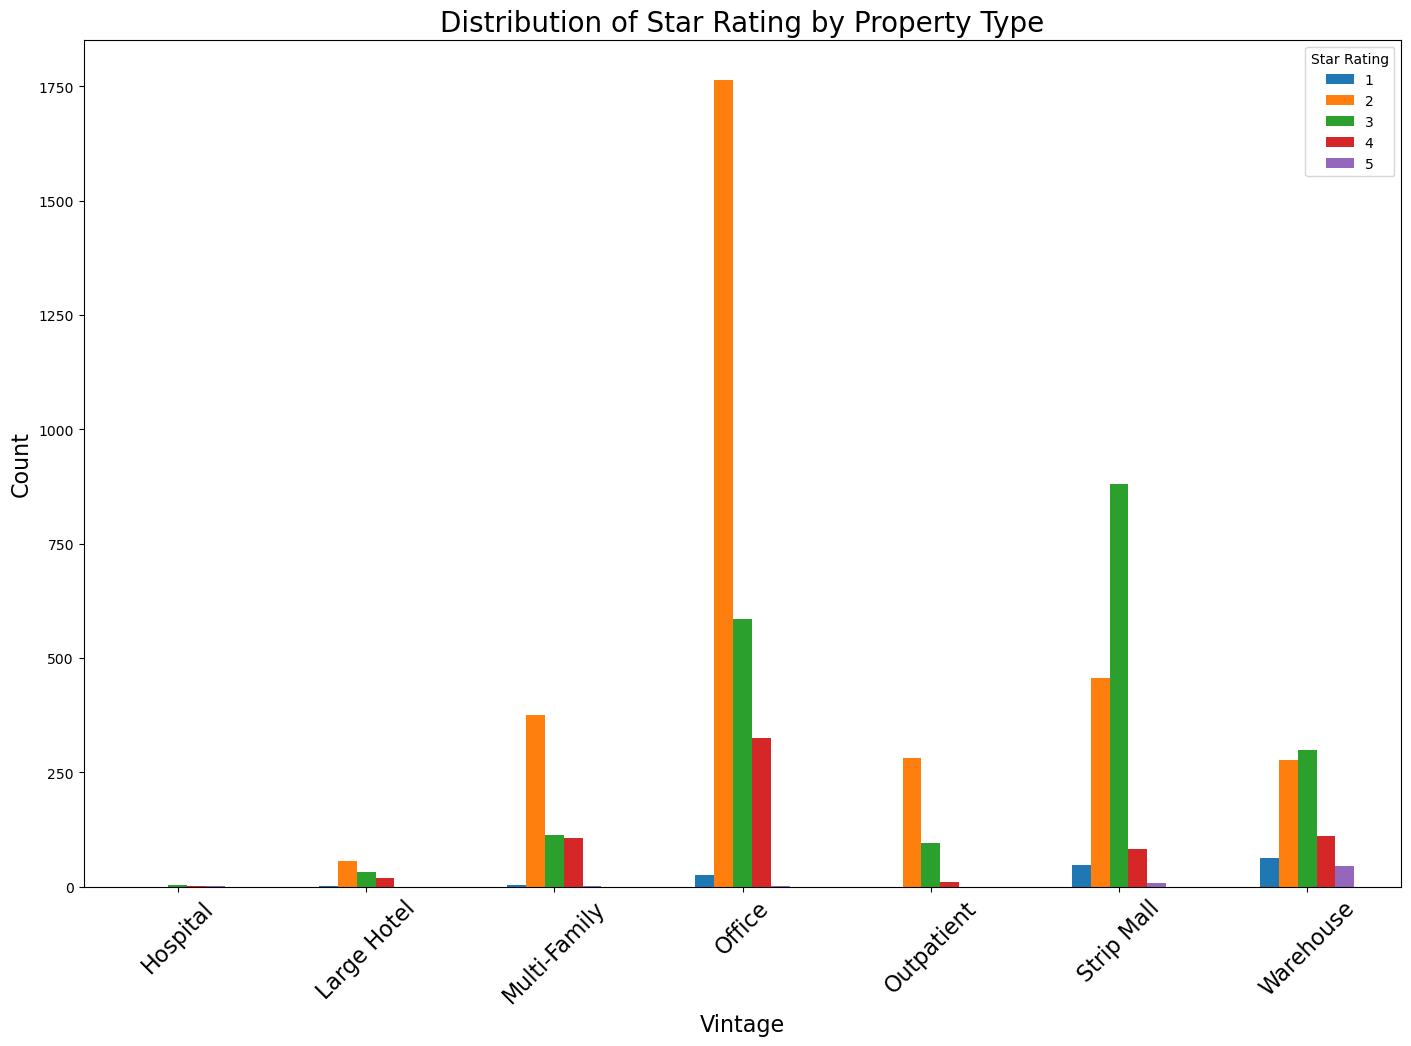

In [ ]:
vintage_star_count = building_df.groupby(['ComStock Property Type', 'Star Rating']).size().unstack()

# Step 4: Create a bar chart
plt.figure(figsize=(1, 1))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 16) 
vintage_star_count.plot(kind='bar', rot=45, figsize=(17,11))  # Create a bar chart with no rotation of labels

plt.xlabel('Vintage',
           {'size':16})
plt.ylabel('Count',
           {'size':16})
plt.title('Distribution of Star Rating by Property Type',
          {'size':20})
plt.show()

0.1314475873544093


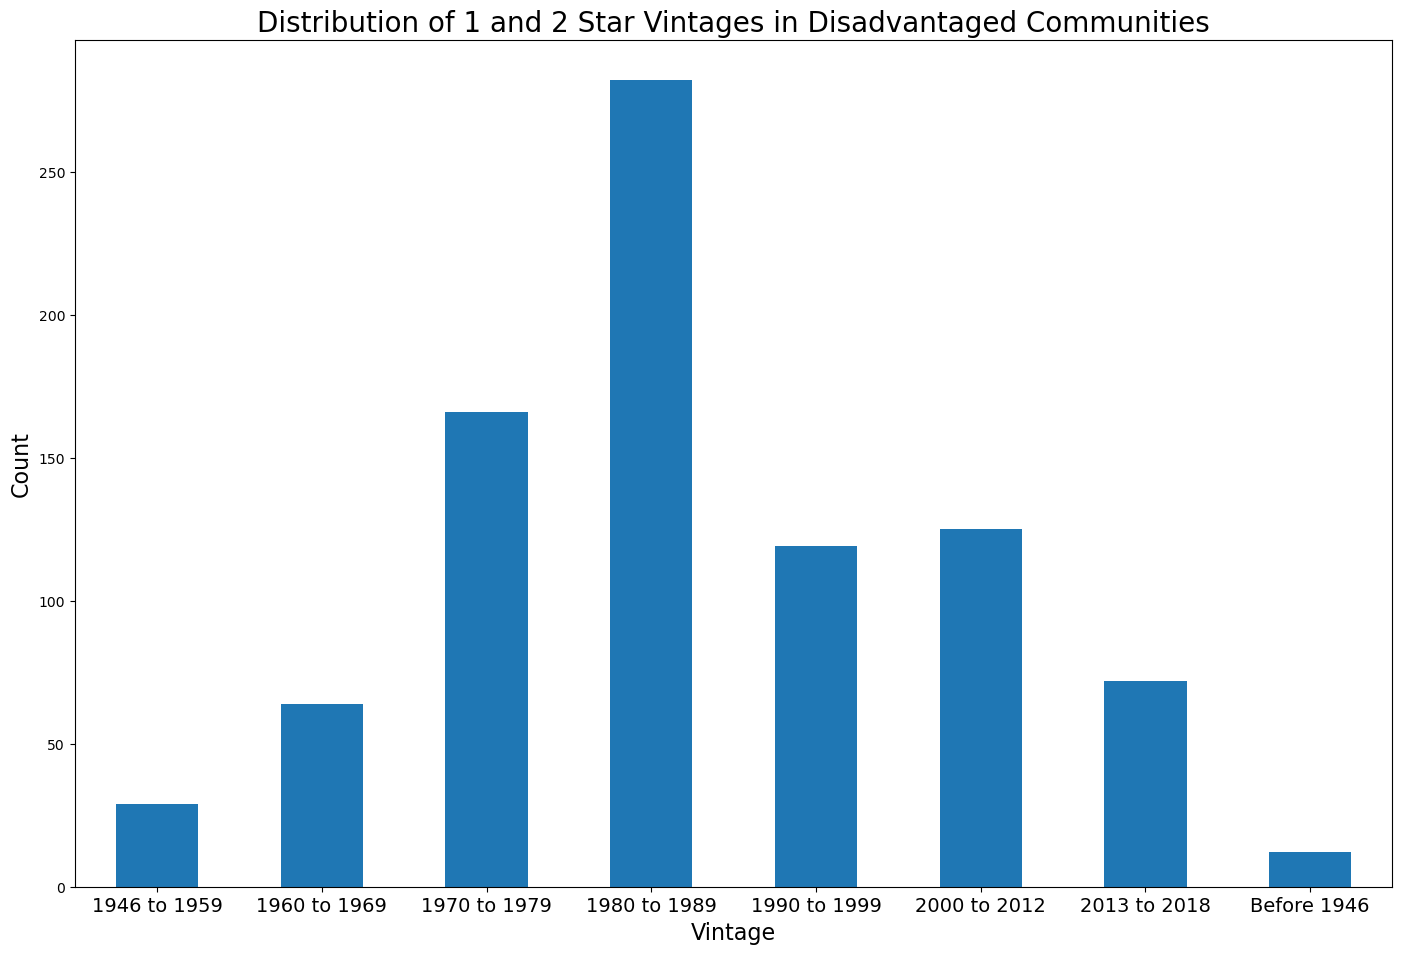

In [ ]:
vintage_count = disadvantaged_1_2_star_building_df['ComStock Vintage'].value_counts().sort_index()
print(vintage_count.sum()/building_df['Address'].value_counts().sum())


# Step 4: Create a bar chart
plt.figure(figsize=(17, 11))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 14) 
vintage_count.plot(kind='bar', rot=0,)  # Create a bar chart with no rotation of labels

plt.xlabel('Vintage',
           {'size':16})
plt.ylabel('Count',
           {'size':16})
plt.title('Distribution of 1 and 2 Star Vintages in Disadvantaged Communities',
          {'size':20})

plt.show()

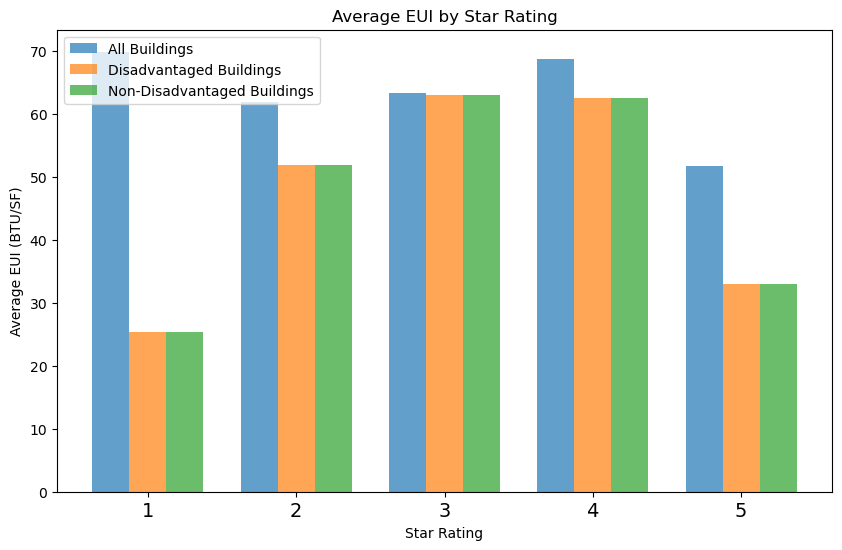

In [ ]:
# Calculate the average EUI for each star rating
building_non_warehouse_df = building_df[~building_df['ComStock Property Type'].isin(['Warehouse','Muli-Family'])]
building_disad_non_warehouse_df = disadvantaged_building_df[~disadvantaged_building_df['ComStock Property Type'].isin(['Warehouse','Muli-Family'])]
building_non_disad_non_warehouse_df = non_disadvantaged_building_df[~non_disadvantaged_building_df['ComStock Property Type'].isin(['Warehouse','Muli-Family'])]
average_eui_by_rating = building_non_warehouse_df.groupby('Star Rating')['EUI for Analysis (BTU/SF)'].mean().reset_index()
average_eui_by_rating_disad = building_disad_non_warehouse_df.groupby('Star Rating')['EUI for Analysis (BTU/SF)'].mean().reset_index()
average_eui_by_rating_disad = building_non_disad_non_warehouse_df.groupby('Star Rating')['EUI for Analysis (BTU/SF)'].mean().reset_index()


# Plotting the multi-bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25

# Set positions for each bar
ratings = average_eui_by_rating['Star Rating']
positions = np.arange(len(ratings))

# Plot bars for each dataset
ax.bar(positions - bar_width, average_eui_by_rating['EUI for Analysis (BTU/SF)'], bar_width, label='All Buildings', alpha=0.7)
ax.bar(positions, average_eui_by_rating_disad['EUI for Analysis (BTU/SF)'], bar_width, label='Disadvantaged Buildings', alpha=0.7)
ax.bar(positions + bar_width, average_eui_by_rating_disad['EUI for Analysis (BTU/SF)'], bar_width, label='Non-Disadvantaged Buildings', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Star Rating')
ax.set_ylabel('Average EUI (BTU/SF)')
ax.set_title('Average EUI by Star Rating')

# Set x-axis ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(ratings)

# Adding legend
ax.legend()

# Show the plot
plt.show()



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the dataframes and necessary data loaded

# Group by Star Rating and calculate the mean of Total Operating Expenses
average_opex_by_rating = building_non_warehouse_df.groupby('Star Rating')['Total Operating Expenses'].mean().reset_index()
average_opex_by_rating_disad = building_disad_non_warehouse_df.groupby('Star Rating')['Total Operating Expenses'].mean().reset_index()
average_opex_by_rating_non_disad = building_non_disad_non_warehouse_df.groupby('Star Rating')['Total Operating Expenses'].mean().reset_index()

# Create a grouped bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=average_opex_by_rating['Star Rating'],
    y=average_opex_by_rating['Total Operating Expenses'],
    text=average_opex_by_rating['Total Operating Expenses'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='All Buildings'
))

fig.add_trace(go.Bar(
    x=average_opex_by_rating_disad['Star Rating'],
    y=average_opex_by_rating_disad['Total Operating Expenses'],
    text=average_opex_by_rating_disad['Total Operating Expenses'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in DAC'
))

fig.add_trace(go.Bar(
    x=average_opex_by_rating_non_disad['Star Rating'],
    y=average_opex_by_rating_non_disad['Total Operating Expenses'],
    text=average_opex_by_rating_non_disad['Total Operating Expenses'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in Non-DAC'
))
# Add note text
note_text = "*Operating Expenses that are equal to zero were not available in the CoStar Data"
fig.add_annotation(
    go.layout.Annotation(
        text=note_text,
        align='left',
        showarrow=False,
        xref='paper', yref='paper',
        x=0, y=1, xanchor='left', yanchor='bottom',
        font=dict(size=10, color='gray')
    )
)
# Update layout
fig.update_layout(
    barmode='group',
    title='Average Total Operating Expenses by Star Rating',
    title_x = 0.5,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Operating Expenses ($/ft²)'),
    legend=dict(
        title='Building Type',
        x=1.0,  # Adjust the x-coordinate (0 to 1)
        y=1.0,  # Adjust the y-coordinate (0 to 1)
        xanchor='right',
        yanchor='top'
    ),
    width=1200,
    height=600
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the dataframes and necessary data loaded

# Group by Star Rating and calculate the mean of Taxes Per SF
average_tax_by_rating = building_non_warehouse_df.groupby('Star Rating')['Taxes Per SF'].mean().reset_index()
average_tax_by_rating_disad = building_disad_non_warehouse_df.groupby('Star Rating')['Taxes Per SF'].mean().reset_index()
average_tax_by_rating_non_disad = building_non_disad_non_warehouse_df.groupby('Star Rating')['Taxes Per SF'].mean().reset_index()

# Create a grouped bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=average_tax_by_rating['Star Rating'],
    y=average_tax_by_rating['Taxes Per SF'],
    text=average_tax_by_rating['Taxes Per SF'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='All Buildings'
))

fig.add_trace(go.Bar(
    x=average_tax_by_rating_disad['Star Rating'],
    y=average_tax_by_rating_disad['Taxes Per SF'],
    text=average_tax_by_rating_disad['Taxes Per SF'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in DAC'
))

fig.add_trace(go.Bar(
    x=average_tax_by_rating_non_disad['Star Rating'],
    y=average_tax_by_rating_non_disad['Taxes Per SF'],
    text=average_tax_by_rating_non_disad['Taxes Per SF'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in Non-DAC'
))

# Update layout
fig.update_layout(
    barmode='group',
    title='Average Tax Burden by Star Rating',
    title_x = 0.5,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Tax Burden ($/ft²)'),
    legend=dict(
        title='Building Type',
        x=1.0,  # Adjust the x-coordinate (0 to 1)
        y=1.0,  # Adjust the y-coordinate (0 to 1)
        xanchor='right',
        yanchor='top'
    ),
    width=1200,
    height=600
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the dataframes and necessary data loaded

# Group by Star Rating and calculate the mean of Utilities
average_utility_by_rating = building_non_warehouse_df.groupby('Star Rating')['Utilities'].mean().reset_index()
average_utility_by_rating_disad = building_disad_non_warehouse_df.groupby('Star Rating')['Utilities'].mean().reset_index()
average_utility_by_rating_non_disad = building_non_disad_non_warehouse_df.groupby('Star Rating')['Utilities'].mean().reset_index()

# Create a grouped bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=average_utility_by_rating['Star Rating'],
    y=average_utility_by_rating['Utilities'],
    text=average_utility_by_rating['Utilities'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='All Buildings'
))

fig.add_trace(go.Bar(
    x=average_utility_by_rating_disad['Star Rating'],
    y=average_utility_by_rating_disad['Utilities'],
    text=average_utility_by_rating_disad['Utilities'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in DAC'
))

fig.add_trace(go.Bar(
    x=average_utility_by_rating_non_disad['Star Rating'],
    y=average_utility_by_rating_non_disad['Utilities'],
    text=average_utility_by_rating_non_disad['Utilities'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in Non-DAC'
))
# Add note text
note_text = "*Utility Costs that are equal to zero were not available in the CoStar Data"
fig.add_annotation(
    go.layout.Annotation(
        text=note_text,
        align='left',
        showarrow=False,
        xref='paper', yref='paper',
        x=0, y=1, xanchor='left', yanchor='bottom',
        font=dict(size=10, color='gray')
    )
)
# Update layout
fig.update_layout(
    barmode='group',
    title='Average Utility Cost by Star Rating',
    title_x = 0.5,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Utility Cost ($/ft²)'),
    legend=dict(
        title='Building Type',
        x=1.0,  # Adjust the x-coordinate (0 to 1)
        y=1.0,  # Adjust the y-coordinate (0 to 1)
        xanchor='right',
        yanchor='top'
    ),
    width=1200,
    height=600
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the dataframes and necessary data loaded

# Group by Star Rating and calculate the mean of Rent/SF/Yr
average_rent_by_rating = building_non_warehouse_df.groupby('Star Rating')['Rent/SF/Yr'].mean().reset_index()
average_rent_by_rating_disad = building_disad_non_warehouse_df.groupby('Star Rating')['Rent/SF/Yr'].mean().reset_index()
average_rent_by_rating_non_disad = building_non_disad_non_warehouse_df.groupby('Star Rating')['Rent/SF/Yr'].mean().reset_index()

# Create a grouped bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=average_rent_by_rating['Star Rating'],
    y=average_rent_by_rating['Rent/SF/Yr'],
    text=average_rent_by_rating['Rent/SF/Yr'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='All Buildings'
))

fig.add_trace(go.Bar(
    x=average_rent_by_rating_disad['Star Rating'],
    y=average_rent_by_rating_disad['Rent/SF/Yr'],
    text=average_rent_by_rating_disad['Rent/SF/Yr'].round(2),  # Add the values to the bars, rounded to 2 decimal places
    name='Buildings in DAC'
))

fig.add_trace(go.Bar(
    x=average_rent_by_rating_non_disad['Star Rating'],
    y=average_rent_by_rating_non_disad['Rent/SF/Yr'],
    text=average_rent_by_rating_non_disad['Rent/SF/Yr'].round(2),
    name='Buildings in Non-DAC'
))

# Add note text
note_text = "*Rents that are equal to zero were not available in the CoStar Data"
fig.add_annotation(
    go.layout.Annotation(
        text=note_text,
        align='left',
        showarrow=False,
        xref='paper', yref='paper',
        x=0, y=1, xanchor='left', yanchor='bottom',
        font=dict(size=10, color='gray')
    )
)

# Update layout
fig.update_layout(
    barmode='group',
    title_x = 0.5,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Rent ($/ft²)'),
    legend=dict(
        x=0.0,  # Adjust the x-coordinate (0 to 1)
        y=1.0,  # Adjust the y-coordinate (0 to 1)
        xanchor='left',
        yanchor='top'
    ),
    width=1200,
    height=800
)


# Show the plot
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Group by Direct Services and calculate the mean of Rent/SF/Yr
average_rent_by_lease = building_non_warehouse_df.groupby('Direct Services')['Rent/SF/Yr'].mean().reset_index()
average_rent_by_lease_disad = building_disad_non_warehouse_df.groupby('Direct Services')['Rent/SF/Yr'].mean().reset_index()
average_rent_by_lease_non_disad = building_non_disad_non_warehouse_df.groupby('Direct Services')['Rent/SF/Yr'].mean().reset_index()

# Concatenate the dataframes
combined_df = pd.concat([average_rent_by_lease, average_rent_by_lease_disad, average_rent_by_lease_non_disad],
                        keys=['All Buildings', 'Buildings in DAC', 'Buildings in Non-DAC'])

# Sort the Direct Services to maintain consistent order
combined_df.sort_values('Direct Services', inplace=True)

# Plotly Express grouped bar chart
fig = px.bar(
    combined_df,
    x='Direct Services',
    y='Rent/SF/Yr',
    color=combined_df.index.get_level_values(0),
    barmode='group',  # Set the bar mode to 'group' for grouped bars
    labels={'Rent/SF/Yr': 'Average Rent ($/ft²/yr)', 'Direct Services': 'Lease Type'},
    category_orders={'Direct Services': sorted(combined_df['Direct Services'].unique())},
    width=1200,
    height=800,
    text=combined_df['Rent/SF/Yr'].round(2),  # Add the values to the bars, rounded to 2 decimal places

)
# Add note text
note_text = "*Rents that are equal to zero were not available in the CoStar Data"
fig.add_annotation(
    go.layout.Annotation(
        text=note_text,
        align='left',
        showarrow=False,
        xref='paper', yref='paper',
        x=0, y=1, xanchor='left', yanchor='bottom',
        font=dict(size=10, color='gray')
    )
)
# Update layout
fig.update_layout(
    legend=dict(
        x=1.0,  # Adjust the x-coordinate (0 to 1)
        y=1.0,  # Adjust the y-coordinate (0 to 1)
        xanchor='right',
        yanchor='top',
        title_text=''
    ),
)

# Show the plot
fig.show()


      Direct Services  Rent/SF/Yr
0               +UTIL   28.000000
1  Full Service Gross   18.964167
2      Modified Gross   16.256818
3          Triple Net   16.334843


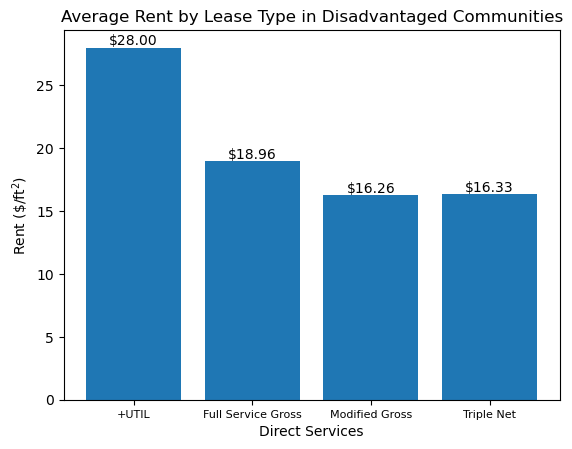

In [ ]:
# Assuming you already have building_non_warehouse_df defined
building_non_warehouse_df = disadvantaged_building_df[disadvantaged_building_df['ComStock Property Type'] != 'Warehouse']

average_rent_by_lease_df = building_non_warehouse_df.groupby('Direct Services')['Rent/SF/Yr'].mean().reset_index()
# Plotting the bar 
plt.bar(average_rent_by_lease_df['Direct Services'], average_rent_by_lease_df['Rent/SF/Yr'])

# Adding labels above each bar for the average values
for i, value in enumerate(average_rent_by_lease_df['Rent/SF/Yr']):
    plt.text(average_rent_by_lease_df['Direct Services'][i], value, f'${value:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.xticks(fontsize = 8)
plt.xlabel('Direct Services')
plt.ylabel('Rent (\$/ft$^2$)')
plt.title('Average Rent by Lease Type in Disadvantaged Communities')
print(average_rent_by_lease_df)

# Display the plot
plt.show()



In [ ]:
import pandas as pd
import plotly.graph_objects as go
# List of average cost data frames
cost_dfs = [average_opex_by_rating, average_rent_by_rating, average_tax_by_rating, average_utility_by_rating]
disad_cost_dfs = [average_opex_by_rating_disad, average_rent_by_rating_disad, average_tax_by_rating_disad, average_utility_by_rating_disad]
non_disad_cost_dfs = [average_opex_by_rating_non_disad, average_rent_by_rating_non_disad, average_tax_by_rating_non_disad, average_utility_by_rating_non_disad]

# Combine DataFrames into a single DataFrame using Rating as the common column
total_cost_df = pd.merge(cost_dfs[0],cost_dfs[1], on = 'Star Rating')
total_cost_df = pd.merge(total_cost_df, cost_dfs[2], on = 'Star Rating')
total_cost_df = pd.merge(total_cost_df, cost_dfs[3], on = 'Star Rating').fillna(0)
total_cost_disad_df = pd.merge(disad_cost_dfs[0],disad_cost_dfs[1], on = 'Star Rating')
total_cost_disad_df = pd.merge(total_cost_disad_df,disad_cost_dfs[2], on = 'Star Rating')
total_cost_disad_df = pd.merge(total_cost_disad_df, disad_cost_dfs[3], on = 'Star Rating').fillna(0)
total_cost_non_disad_df = pd.merge(non_disad_cost_dfs[0],non_disad_cost_dfs[1], on = 'Star Rating')
total_cost_non_disad_df = pd.merge(total_cost_non_disad_df,non_disad_cost_dfs[2], on = 'Star Rating')
total_cost_non_disad_df = pd.merge(total_cost_non_disad_df, non_disad_cost_dfs[3], on = 'Star Rating').fillna(0)

# Sum the corresponding columns across all DataFrames
total_cost_df['Total Cost'] = total_cost_df['Total Operating Expenses'] + total_cost_df['Rent/SF/Yr'] + total_cost_df['Taxes Per SF'] + total_cost_df['Utilities']
total_cost_disad_df['Total Cost Disadvantaged'] = total_cost_disad_df['Total Operating Expenses'] + total_cost_disad_df['Rent/SF/Yr'] + total_cost_disad_df['Taxes Per SF'] + total_cost_disad_df['Utilities']
total_cost_non_disad_df['Total Cost Non Disadvantaged'] = total_cost_non_disad_df['Total Operating Expenses'] + total_cost_non_disad_df['Rent/SF/Yr'] + total_cost_non_disad_df['Taxes Per SF'] + total_cost_non_disad_df['Utilities']
# print(total_cost_df)
print(total_cost_disad_df)
print(total_cost_non_disad_df)
total_cost_by_rating_df = pd.merge(total_cost_df[['Star Rating', 'Total Cost']], total_cost_disad_df[['Star Rating', 'Total Cost Disadvantaged']], on = 'Star Rating')
total_cost_by_rating_df = pd.merge(total_cost_by_rating_df, total_cost_non_disad_df[['Star Rating', 'Total Cost Non Disadvantaged']], on = 'Star Rating')
# print(total_cost_by_rating_df)
# Create a grouped bar chart using Plotly
fig = go.Figure()

legend_labels = {
    'Total Cost': 'All Buildings',
    'Total Cost Disadvantaged': 'Buildings in DAC',
    'Total Cost Non Disadvantaged': 'Buildings in Non-DAC'
}

for cost_type in legend_labels:
    fig.add_trace(go.Bar(
        x=total_cost_by_rating_df['Star Rating'],
        y=total_cost_by_rating_df[cost_type],
        text=total_cost_by_rating_df[cost_type].round(1),  # Add actual values as text on top of each bar
        textposition='inside',  # 'auto' places text inside the bars; you can customize this
        insidetextanchor='end',  # Force all bar labels to have the same font size
        name=legend_labels[cost_type]
    ))

fig.update_layout(
    title='Average Total Cost by Star Rating',
    title_x = 0.5,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Total Cost ($/ft²)'),
    barmode='group',
    legend=dict(
        title='Building Type',
        x=0.0,  # Adjust the x-coordinate (0 to 1)
        y=1.0,  # Adjust the y-coordinate (0 to 1)
        xanchor='left',
        yanchor='top'
    ),
    width=1200,
    height=600
)

fig.show()

   Star Rating  Total Operating Expenses  Rent/SF/Yr  Taxes Per SF  Utilities  \
0            1                 12.264115   22.019470      4.420667   1.131686   
1            2                  7.744720   22.781051      6.160360   1.015919   
2            3                 13.742654   22.999971      6.821143   1.409210   
3            4                 13.896120   27.021255      4.445918   1.553341   
4            5                  0.000000   27.633333      0.000000   0.000000   

   Total Cost Disadvantaged  
0                 39.835938  
1                 37.702049  
2                 44.972979  
3                 46.916635  
4                 27.633333  
   Star Rating  Total Operating Expenses  Rent/SF/Yr  Taxes Per SF  Utilities  \
0            1                  9.269416   23.337500      6.470667   0.822320   
1            2                 21.705538   16.689143      8.529316   3.544559   
2            3                 16.780560   23.038874      8.349063   1.462514   
3        

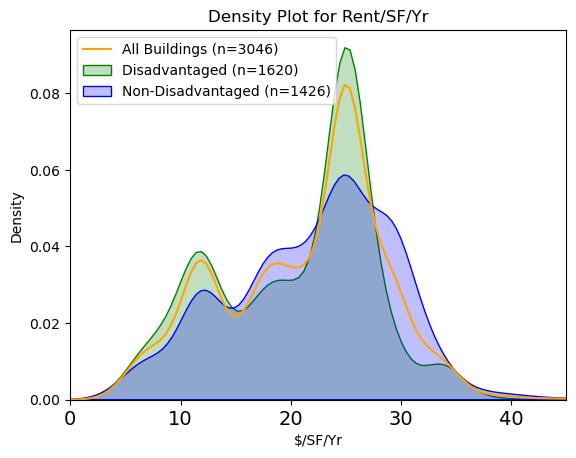

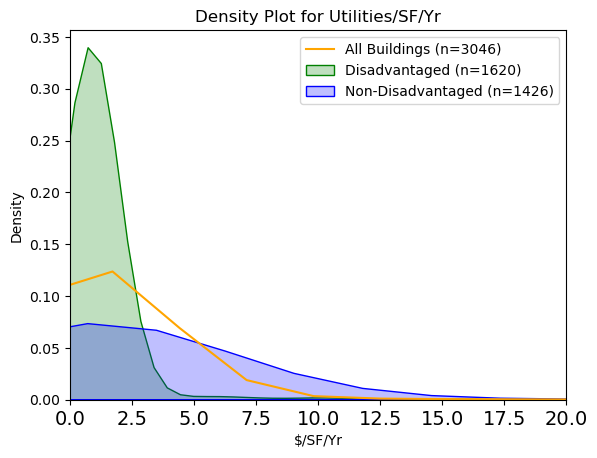

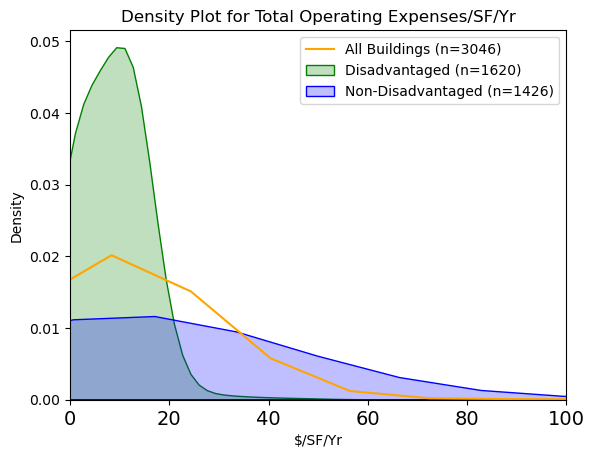

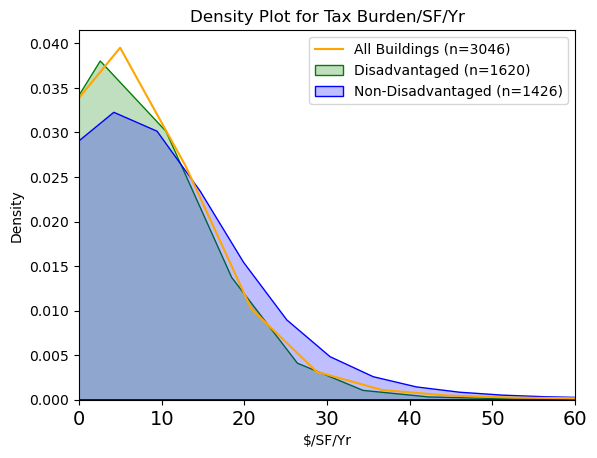

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'building_df' is your DataFrame
# If needed, you can replace 'Rent/SF/Yr' and 'Identified as disadvantaged' 
# with the actual column names in your DataFrame
expenses_to_plot = ['Rent/SF/Yr', 'Utilities', 'Total Operating Expenses', 'Taxes Per SF']

expense_labels = {
    'Rent/SF/Yr': 'Rent/SF/Yr',
    'Utilities': 'Utilities/SF/Yr',
    'Total Operating Expenses': 'Total Operating Expenses/SF/Yr',
    'Taxes Per SF': 'Tax Burden/SF/Yr'
}

expense_xlim = {
    'Rent/SF/Yr': 45,
    'Utilities': 20,
    'Total Operating Expenses': 100,
    'Taxes Per SF': 60
}

for expenses in expenses_to_plot:
    # Create a kernel density estimate using seaborn for overall data
    sns_kde_all = sns.kdeplot(building_dropped_df[expenses].dropna().abs(), fill=False, label=f'All Buildings (n={len(building_dropped_df)})', color='orange')

    # Create a kernel density estimate for entries where 'Identified as disadvantaged' is True
    disadvantaged_subset = building_dropped_df[building_dropped_df['Identified as disadvantaged'] == True]
    sns_kde_disadv = sns.kdeplot(disadvantaged_subset[expenses].dropna().abs(), fill=True, label=f'Disadvantaged (n={len(disadvantaged_subset)})', color='green')

    # Create a kernel density estimate for entries where 'Identified as disadvantaged' is False or NaN
    non_disadvantaged_subset = building_dropped_df[building_dropped_df['Identified as disadvantaged'].fillna(False) == False]
    sns_kde_non_disadv = sns.kdeplot(non_disadvantaged_subset[expenses].dropna().abs(), fill=True, label=f'Non-Disadvantaged (n={len(non_disadvantaged_subset)})', color='blue')

    # Change the Upper Limit
    plt.xlim(right=expense_xlim.get(expenses, expenses))
    plt.xlim(left=0)

    # Add title to graph
    plt.title(f'Density Plot for {expense_labels.get(expenses, expenses)}')

    # Set x-axis label
    plt.xlabel('$/SF/Yr')

    # Add legend
    plt.legend()

    # Show only the Seaborn plot
    plt.show()


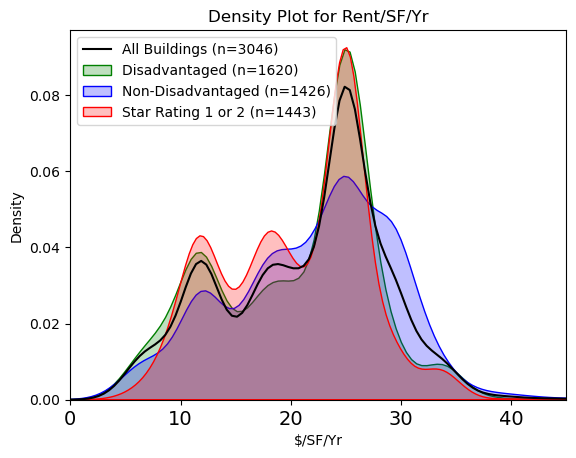

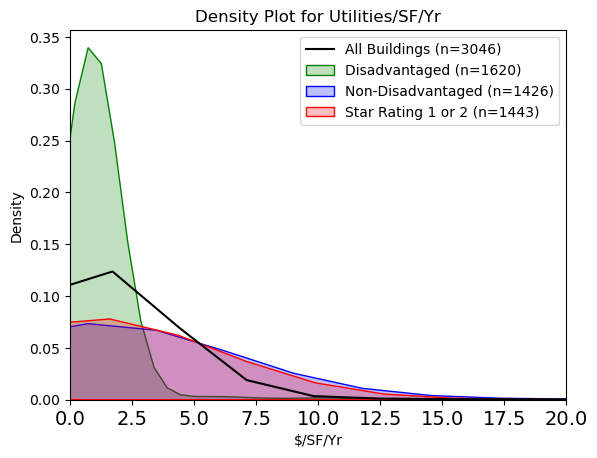

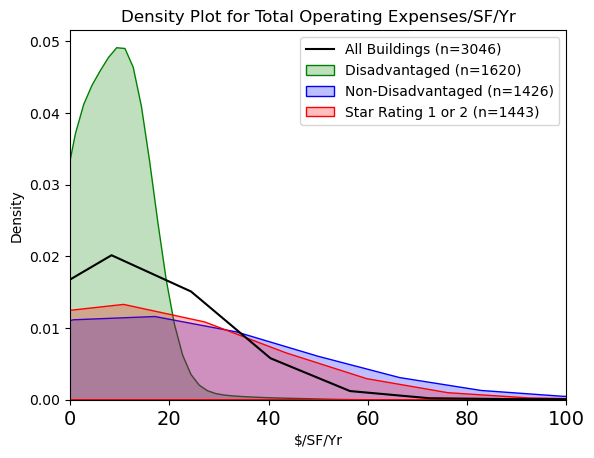

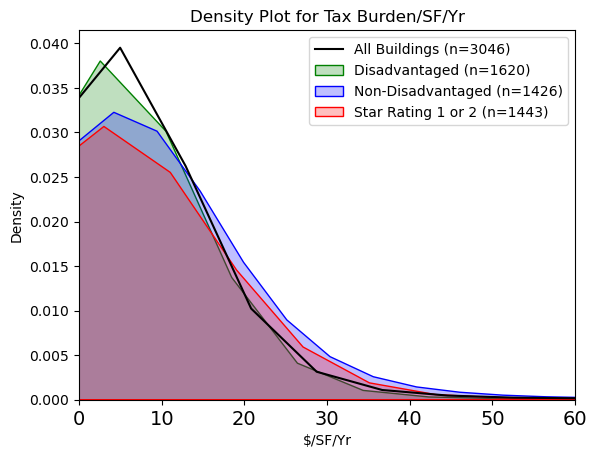

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'building_df' is your DataFrame
# If needed, you can replace 'Rent/SF/Yr' and 'Identified as disadvantaged' 
# with the actual column names in your DataFrame
expenses_to_plot = ['Rent/SF/Yr', 'Utilities', 'Total Operating Expenses', 'Taxes Per SF']

expense_labels = {
    'Rent/SF/Yr': 'Rent/SF/Yr',
    'Utilities': 'Utilities/SF/Yr',
    'Total Operating Expenses': 'Total Operating Expenses/SF/Yr',
    'Taxes Per SF': 'Tax Burden/SF/Yr'
}

expense_xlim = {
    'Rent/SF/Yr': 45,
    'Utilities': 20,
    'Total Operating Expenses': 100,
    'Taxes Per SF': 60
}

for expenses in expenses_to_plot:
    # Create a kernel density estimate using seaborn for overall data
    sns_kde_all = sns.kdeplot(building_dropped_df[expenses].dropna().abs(), fill=False, label=f'All Buildings (n={len(building_dropped_df)})', color='black')

    # Create a kernel density estimate for entries where 'Identified as disadvantaged' is True
    disadvantaged_subset = building_dropped_df[building_dropped_df['Identified as disadvantaged'] == True]
    sns_kde_disadv = sns.kdeplot(disadvantaged_subset[expenses].dropna().abs(), fill=True, label=f'Disadvantaged (n={len(disadvantaged_subset)})', color='green')

    # Create a kernel density estimate for entries where 'Identified as disadvantaged' is False or NaN
    non_disadvantaged_subset = building_dropped_df[building_dropped_df['Identified as disadvantaged'].fillna(False) == False]
    sns_kde_non_disadv = sns.kdeplot(non_disadvantaged_subset[expenses].dropna().abs(), fill=True, label=f'Non-Disadvantaged (n={len(non_disadvantaged_subset)})', color='blue')

    # Create a kernel density estimate for entries where 'Star Rating' is 1 or 2
    star_1_2_subset = building_dropped_df[building_dropped_df['Star Rating'].isin([1, 2])]
    sns_kde_star_1_2 = sns.kdeplot(star_1_2_subset[expenses].dropna().abs(), fill=True, label=f'Star Rating 1 or 2 (n={len(star_1_2_subset)})', color='red')

    # Change the Upper Limit
    plt.xlim(right=expense_xlim.get(expenses, expenses))
    plt.xlim(left=0)

    # Add title to graph
    plt.title(f'Density Plot for {expense_labels.get(expenses, expenses)}')

    # Set x-axis label
    plt.xlabel('$/SF/Yr')

    # Add legend
    plt.legend()

    # Show only the Seaborn plot
    plt.show()


In [ ]:
# Count the number of instances of Multi-Family property type
multi_family_count = building_df[building_df['ComStock Property Type'] == 'Multi-Family'].shape[0]

# Count the number of Multi-Family property types with Sq-Ft over 50000
multi_family_over_50000_count = building_df[(building_df['ComStock Property Type'] == 'Multi-Family') & (building_df['Total Area SF'] > 50000)].shape[0]

print(f'Number of Multi-Family instances: {multi_family_count}')
print(f'Number of Multi-Family instances over 50000 sq-ft: {multi_family_over_50000_count}')

Number of Multi-Family instances: 601
Number of Multi-Family instances over 50000 sq-ft: 200
